<a href="https://colab.research.google.com/github/sauravkokane/Data-Science-Training/blob/master/Overfitting_Experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Libraries

In [1]:
# import cupy as cp
import numpy as cp

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

## Creation of functions

In [3]:
memo = {}

def legendre_polynomial(x, n):
    if (x.tobytes(), n) in memo:  # Check if the result is already computed
        return memo[(x.tobytes(), n)]

    if n == 0:
        result = cp.ones_like(x)  # P_0(x) = 1 for all x
    elif n == 1:
        result = x  # P_1(x) = x
    else:
        # Recursively compute P_{n-1}(x) and P_{n-2}(x)
        result_n1 = legendre_polynomial(x, n - 1)
        result_n2 = legendre_polynomial(x, n - 2)

        # Compute P_n(x) using the recurrence relation
        result = ((2 * n - 1) * x * result_n1 - (n - 1) * result_n2) / n

    # Store the result in the memo dictionary
    memo[(x.tobytes(), n)] = result
    return result


In [4]:
def generate_target(complexity):
    """

    """
    x = cp.arange(-1, 1, 0.0002)
    return (x, legendre_polynomial(x, complexity))

In [5]:
def noise_function(x, noise_level):
  """
  Give Gaussian noise as per the input array

  Args:
    x: A CuPy 1D array.

  Returns:
    A CuPy 1D array with added Gaussian noise.
  """

  gaussian_noise = cp.random.normal(0, noise_level, size=x.shape)
  return gaussian_noise * ((2 - x)/abs(x - 2)) * 0.08

In [6]:
def generate_noisy_samples(x, y, sample_size, noise_level=0):
    sample_indexes = cp.random.choice(x.size, size=sample_size, replace=False)
    sample_x = x[sample_indexes]
    sample_y = y[sample_indexes]
    sample_y += noise_function(sample_x, noise_level)
    return sample_x, sample_y

In [7]:
def e_out(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

In [8]:
def fill_nos_vs_nl(target_complexities, sample_sizes=cp.array([1]), noise_levels=cp.array([0])):
    nos_vs_nls = [cp.zeros((len(sample_sizes), len(noise_levels))) for i in range(len(target_complexities))]
    print(nos_vs_nls[0].shape)
    for i, complexity in enumerate(target_complexities.get()):
        for j, sample_size in enumerate(sample_sizes.get()):
            for k, noise_level in enumerate(noise_levels.get()):
                print(f"Complexity: {complexity}, Sample Size: {sample_size}, Noise Level: {noise_level}")
                x, y = generate_target(complexity)
                sample_x, sample_y = generate_noisy_samples(x, y, sample_size, noise_level=noise_level)
                h2 = cp.polyfit(sample_x, sample_y, 4)
                y2 = cp.polyval(h2, x)
                h10 = cp.polyfit(sample_x, sample_y, 25)
                y10 = cp.polyval(h10, x)
                eout2 = e_out(y.get(), y2.get())
                eout10 = e_out(y.get(), y10.get())
                # print(abs(eout10-eout2))
                nos_vs_nls[i][j, k] = abs(eout10-eout2)
                print((i+1) * (j+1) * (k+1))
    return nos_vs_nls

In [9]:
def fill_nos_vs_nl(target_complexities, sample_sizes=cp.array([1]), noise_levels=cp.array([0])):
    nos_vs_nls = [cp.zeros((len(sample_sizes), len(noise_levels))) for i in range(len(target_complexities))]
    print(nos_vs_nls[0].shape)
    for i, complexity in enumerate(target_complexities):
        x, y = generate_target(complexity)

        for j, sample_size in enumerate(sample_sizes):
            for k, noise_level in enumerate(noise_levels):
                print(f"Complexity: {complexity}, Sample Size: {sample_size}, Noise Level: {noise_level}")

                sample_x, sample_y = generate_noisy_samples(x, y, sample_size, noise_level=noise_level)
                h2 = cp.polyfit(sample_x, sample_y, 2)
                y2 = cp.polyval(h2, x)
                h10 = cp.polyfit(sample_x, sample_y, 10)
                y10 = cp.polyval(h10, x)
                eout2 = e_out(y, y2)
                eout10 = e_out(y, y10)
                # print(abs(eout10-eout2))
                nos_vs_nls[i][j, k] = abs(eout10-eout2)
                print((i+1) * (j+1) * (k+1))
    return nos_vs_nls

In [10]:
noise_levels1 = cp.arange(0, 4, 4/400).round(2)
sample_sizes1 = cp.arange(1, 241, 1)
target_complexity1 = cp.arange(1, 121, 1)

In [11]:
cp.random.seed(88)
target_complexities = target_complexity1[cp.random.choice(target_complexity1.size, size=2, replace=False)]
target_complexities.sort()
target_complexities

array([59, 73])

In [13]:
noise_levels1

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [14]:
nos_vs_nls_outputs = fill_nos_vs_nl(cp.array([25, 60]), sample_sizes=sample_sizes1, noise_levels=noise_levels1)

(240, 400)
Complexity: 25, Sample Size: 1, Noise Level: 0.0
1
Complexity: 25, Sample Size: 1, Noise Level: 0.01
2
Complexity: 25, Sample Size: 1, Noise Level: 0.02
3
Complexity: 25, Sample Size: 1, Noise Level: 0.03
4
Complexity: 25, Sample Size: 1, Noise Level: 0.04
5
Complexity: 25, Sample Size: 1, Noise Level: 0.05
6
Complexity: 25, Sample Size: 1, Noise Level: 0.06
7
Complexity: 25, Sample Size: 1, Noise Level: 0.07
8
Complexity: 25, Sample Size: 1, Noise Level: 0.08
9
Complexity: 25, Sample Size: 1, Noise Level: 0.09
10
Complexity: 25, Sample Size: 1, Noise Level: 0.1
11
Complexity: 25, Sample Size: 1, Noise Level: 0.11
12
Complexity: 25, Sample Size: 1, Noise Level: 0.12
13
Complexity: 25, Sample Size: 1, Noise Level: 0.13
14
Complexity: 25, Sample Size: 1, Noise Level: 0.14
15
Complexity: 25, Sample Size: 1, Noise Level: 0.15
16
Complexity: 25, Sample Size: 1, Noise Level: 0.16
17
Complexity: 25, Sample Size: 1, Noise Level: 0.17
18
Complexity: 25, Sample Size: 1, Noise Level: 0

<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython

70
Complexity: 25, Sample Size: 1, Noise Level: 0.7
71
Complexity: 25, Sample Size: 1, Noise Level: 0.71
72
Complexity: 25, Sample Size: 1, Noise Level: 0.72
73
Complexity: 25, Sample Size: 1, Noise Level: 0.73
74
Complexity: 25, Sample Size: 1, Noise Level: 0.74
75
Complexity: 25, Sample Size: 1, Noise Level: 0.75
76
Complexity: 25, Sample Size: 1, Noise Level: 0.76
77
Complexity: 25, Sample Size: 1, Noise Level: 0.77
78
Complexity: 25, Sample Size: 1, Noise Level: 0.78
79
Complexity: 25, Sample Size: 1, Noise Level: 0.79
80
Complexity: 25, Sample Size: 1, Noise Level: 0.8
81
Complexity: 25, Sample Size: 1, Noise Level: 0.81
82
Complexity: 25, Sample Size: 1, Noise Level: 0.82
83
Complexity: 25, Sample Size: 1, Noise Level: 0.83
84
Complexity: 25, Sample Size: 1, Noise Level: 0.84
85
Complexity: 25, Sample Size: 1, Noise Level: 0.85
86
Complexity: 25, Sample Size: 1, Noise Level: 0.86
87
Complexity: 25, Sample Size: 1, Noise Level: 0.87
88
Complexity: 25, Sample Size: 1, Noise Level: 

<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython

154
Complexity: 25, Sample Size: 1, Noise Level: 1.54
155
Complexity: 25, Sample Size: 1, Noise Level: 1.55
156
Complexity: 25, Sample Size: 1, Noise Level: 1.56
157
Complexity: 25, Sample Size: 1, Noise Level: 1.57
158
Complexity: 25, Sample Size: 1, Noise Level: 1.58
159
Complexity: 25, Sample Size: 1, Noise Level: 1.59
160
Complexity: 25, Sample Size: 1, Noise Level: 1.6
161
Complexity: 25, Sample Size: 1, Noise Level: 1.61
162
Complexity: 25, Sample Size: 1, Noise Level: 1.62
163
Complexity: 25, Sample Size: 1, Noise Level: 1.63
164
Complexity: 25, Sample Size: 1, Noise Level: 1.64
165
Complexity: 25, Sample Size: 1, Noise Level: 1.65
166
Complexity: 25, Sample Size: 1, Noise Level: 1.66
167
Complexity: 25, Sample Size: 1, Noise Level: 1.67
168
Complexity: 25, Sample Size: 1, Noise Level: 1.68
169
Complexity: 25, Sample Size: 1, Noise Level: 1.69
170
Complexity: 25, Sample Size: 1, Noise Level: 1.7
171
Complexity: 25, Sample Size: 1, Noise Level: 1.71
172
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython

237
Complexity: 25, Sample Size: 1, Noise Level: 2.37
238
Complexity: 25, Sample Size: 1, Noise Level: 2.38
239
Complexity: 25, Sample Size: 1, Noise Level: 2.39
240
Complexity: 25, Sample Size: 1, Noise Level: 2.4
241
Complexity: 25, Sample Size: 1, Noise Level: 2.41
242
Complexity: 25, Sample Size: 1, Noise Level: 2.42
243
Complexity: 25, Sample Size: 1, Noise Level: 2.43
244
Complexity: 25, Sample Size: 1, Noise Level: 2.44
245
Complexity: 25, Sample Size: 1, Noise Level: 2.45
246
Complexity: 25, Sample Size: 1, Noise Level: 2.46
247
Complexity: 25, Sample Size: 1, Noise Level: 2.47
248
Complexity: 25, Sample Size: 1, Noise Level: 2.48
249
Complexity: 25, Sample Size: 1, Noise Level: 2.49
250
Complexity: 25, Sample Size: 1, Noise Level: 2.5
251
Complexity: 25, Sample Size: 1, Noise Level: 2.51
252
Complexity: 25, Sample Size: 1, Noise Level: 2.52
253
Complexity: 25, Sample Size: 1, Noise Level: 2.53
254
Complexity: 25, Sample Size: 1, Noise Level: 2.54
255
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython

349
Complexity: 25, Sample Size: 1, Noise Level: 3.49
350
Complexity: 25, Sample Size: 1, Noise Level: 3.5
351
Complexity: 25, Sample Size: 1, Noise Level: 3.51
352
Complexity: 25, Sample Size: 1, Noise Level: 3.52
353
Complexity: 25, Sample Size: 1, Noise Level: 3.53
354
Complexity: 25, Sample Size: 1, Noise Level: 3.54
355
Complexity: 25, Sample Size: 1, Noise Level: 3.55
356
Complexity: 25, Sample Size: 1, Noise Level: 3.56
357
Complexity: 25, Sample Size: 1, Noise Level: 3.57
358
Complexity: 25, Sample Size: 1, Noise Level: 3.58
359
Complexity: 25, Sample Size: 1, Noise Level: 3.59
360
Complexity: 25, Sample Size: 1, Noise Level: 3.6
361
Complexity: 25, Sample Size: 1, Noise Level: 3.61
362
Complexity: 25, Sample Size: 1, Noise Level: 3.62
363
Complexity: 25, Sample Size: 1, Noise Level: 3.63
364
Complexity: 25, Sample Size: 1, Noise Level: 3.64
365
Complexity: 25, Sample Size: 1, Noise Level: 3.65
366
Complexity: 25, Sample Size: 1, Noise Level: 3.66
367
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython

118
Complexity: 25, Sample Size: 2, Noise Level: 0.59
120
Complexity: 25, Sample Size: 2, Noise Level: 0.6
122
Complexity: 25, Sample Size: 2, Noise Level: 0.61
124
Complexity: 25, Sample Size: 2, Noise Level: 0.62
126
Complexity: 25, Sample Size: 2, Noise Level: 0.63
128
Complexity: 25, Sample Size: 2, Noise Level: 0.64
130
Complexity: 25, Sample Size: 2, Noise Level: 0.65
132
Complexity: 25, Sample Size: 2, Noise Level: 0.66
134
Complexity: 25, Sample Size: 2, Noise Level: 0.67
136
Complexity: 25, Sample Size: 2, Noise Level: 0.68
138
Complexity: 25, Sample Size: 2, Noise Level: 0.69
140
Complexity: 25, Sample Size: 2, Noise Level: 0.7
142
Complexity: 25, Sample Size: 2, Noise Level: 0.71
144
Complexity: 25, Sample Size: 2, Noise Level: 0.72
146
Complexity: 25, Sample Size: 2, Noise Level: 0.73
148
Complexity: 25, Sample Size: 2, Noise Level: 0.74
150
Complexity: 25, Sample Size: 2, Noise Level: 0.75
152
Complexity: 25, Sample Size: 2, Noise Level: 0.76
154
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython

318
Complexity: 25, Sample Size: 2, Noise Level: 1.59
320
Complexity: 25, Sample Size: 2, Noise Level: 1.6
322
Complexity: 25, Sample Size: 2, Noise Level: 1.61
324
Complexity: 25, Sample Size: 2, Noise Level: 1.62
326
Complexity: 25, Sample Size: 2, Noise Level: 1.63
328
Complexity: 25, Sample Size: 2, Noise Level: 1.64
330
Complexity: 25, Sample Size: 2, Noise Level: 1.65
332
Complexity: 25, Sample Size: 2, Noise Level: 1.66
334
Complexity: 25, Sample Size: 2, Noise Level: 1.67
336
Complexity: 25, Sample Size: 2, Noise Level: 1.68
338
Complexity: 25, Sample Size: 2, Noise Level: 1.69
340
Complexity: 25, Sample Size: 2, Noise Level: 1.7
342
Complexity: 25, Sample Size: 2, Noise Level: 1.71
344
Complexity: 25, Sample Size: 2, Noise Level: 1.72
346
Complexity: 25, Sample Size: 2, Noise Level: 1.73
348
Complexity: 25, Sample Size: 2, Noise Level: 1.74
350
Complexity: 25, Sample Size: 2, Noise Level: 1.75
352
Complexity: 25, Sample Size: 2, Noise Level: 1.76
354
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython

538
Complexity: 25, Sample Size: 2, Noise Level: 2.69
540
Complexity: 25, Sample Size: 2, Noise Level: 2.7
542
Complexity: 25, Sample Size: 2, Noise Level: 2.71
544
Complexity: 25, Sample Size: 2, Noise Level: 2.72
546
Complexity: 25, Sample Size: 2, Noise Level: 2.73
548
Complexity: 25, Sample Size: 2, Noise Level: 2.74
550
Complexity: 25, Sample Size: 2, Noise Level: 2.75
552
Complexity: 25, Sample Size: 2, Noise Level: 2.76
554
Complexity: 25, Sample Size: 2, Noise Level: 2.77
556
Complexity: 25, Sample Size: 2, Noise Level: 2.78
558
Complexity: 25, Sample Size: 2, Noise Level: 2.79
560
Complexity: 25, Sample Size: 2, Noise Level: 2.8
562
Complexity: 25, Sample Size: 2, Noise Level: 2.81
564
Complexity: 25, Sample Size: 2, Noise Level: 2.82
566
Complexity: 25, Sample Size: 2, Noise Level: 2.83
568
Complexity: 25, Sample Size: 2, Noise Level: 2.84
570
Complexity: 25, Sample Size: 2, Noise Level: 2.85
572
Complexity: 25, Sample Size: 2, Noise Level: 2.86
574
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython

760
Complexity: 25, Sample Size: 2, Noise Level: 3.8
762
Complexity: 25, Sample Size: 2, Noise Level: 3.81
764
Complexity: 25, Sample Size: 2, Noise Level: 3.82
766
Complexity: 25, Sample Size: 2, Noise Level: 3.83
768
Complexity: 25, Sample Size: 2, Noise Level: 3.84
770
Complexity: 25, Sample Size: 2, Noise Level: 3.85
772
Complexity: 25, Sample Size: 2, Noise Level: 3.86
774
Complexity: 25, Sample Size: 2, Noise Level: 3.87
776
Complexity: 25, Sample Size: 2, Noise Level: 3.88
778
Complexity: 25, Sample Size: 2, Noise Level: 3.89
780
Complexity: 25, Sample Size: 2, Noise Level: 3.9
782
Complexity: 25, Sample Size: 2, Noise Level: 3.91
784
Complexity: 25, Sample Size: 2, Noise Level: 3.92
786
Complexity: 25, Sample Size: 2, Noise Level: 3.93
788
Complexity: 25, Sample Size: 2, Noise Level: 3.94
790
Complexity: 25, Sample Size: 2, Noise Level: 3.95
792
Complexity: 25, Sample Size: 2, Noise Level: 3.96
794
Complexity: 25, Sample Size: 2, Noise Level: 3.97
796
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython

279
Complexity: 25, Sample Size: 3, Noise Level: 0.93
282
Complexity: 25, Sample Size: 3, Noise Level: 0.94
285
Complexity: 25, Sample Size: 3, Noise Level: 0.95
288
Complexity: 25, Sample Size: 3, Noise Level: 0.96
291
Complexity: 25, Sample Size: 3, Noise Level: 0.97
294
Complexity: 25, Sample Size: 3, Noise Level: 0.98
297
Complexity: 25, Sample Size: 3, Noise Level: 0.99
300
Complexity: 25, Sample Size: 3, Noise Level: 1.0
303
Complexity: 25, Sample Size: 3, Noise Level: 1.01
306
Complexity: 25, Sample Size: 3, Noise Level: 1.02
309
Complexity: 25, Sample Size: 3, Noise Level: 1.03
312
Complexity: 25, Sample Size: 3, Noise Level: 1.04
315
Complexity: 25, Sample Size: 3, Noise Level: 1.05
318
Complexity: 25, Sample Size: 3, Noise Level: 1.06
321
Complexity: 25, Sample Size: 3, Noise Level: 1.07
324
Complexity: 25, Sample Size: 3, Noise Level: 1.08
327
Complexity: 25, Sample Size: 3, Noise Level: 1.09
330
Complexity: 25, Sample Size: 3, Noise Level: 1.1
333
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


615
Complexity: 25, Sample Size: 3, Noise Level: 2.05
618
Complexity: 25, Sample Size: 3, Noise Level: 2.06
621
Complexity: 25, Sample Size: 3, Noise Level: 2.07
624
Complexity: 25, Sample Size: 3, Noise Level: 2.08
627
Complexity: 25, Sample Size: 3, Noise Level: 2.09
630
Complexity: 25, Sample Size: 3, Noise Level: 2.1
633
Complexity: 25, Sample Size: 3, Noise Level: 2.11
636
Complexity: 25, Sample Size: 3, Noise Level: 2.12
639
Complexity: 25, Sample Size: 3, Noise Level: 2.13
642
Complexity: 25, Sample Size: 3, Noise Level: 2.14
645
Complexity: 25, Sample Size: 3, Noise Level: 2.15
648
Complexity: 25, Sample Size: 3, Noise Level: 2.16
651
Complexity: 25, Sample Size: 3, Noise Level: 2.17
654
Complexity: 25, Sample Size: 3, Noise Level: 2.18
657
Complexity: 25, Sample Size: 3, Noise Level: 2.19
660
Complexity: 25, Sample Size: 3, Noise Level: 2.2
663
Complexity: 25, Sample Size: 3, Noise Level: 2.21
666
Complexity: 25, Sample Size: 3, Noise Level: 2.22
669
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


924
Complexity: 25, Sample Size: 3, Noise Level: 3.08
927
Complexity: 25, Sample Size: 3, Noise Level: 3.09
930
Complexity: 25, Sample Size: 3, Noise Level: 3.1
933
Complexity: 25, Sample Size: 3, Noise Level: 3.11
936
Complexity: 25, Sample Size: 3, Noise Level: 3.12
939
Complexity: 25, Sample Size: 3, Noise Level: 3.13
942
Complexity: 25, Sample Size: 3, Noise Level: 3.14
945
Complexity: 25, Sample Size: 3, Noise Level: 3.15
948
Complexity: 25, Sample Size: 3, Noise Level: 3.16
951
Complexity: 25, Sample Size: 3, Noise Level: 3.17
954
Complexity: 25, Sample Size: 3, Noise Level: 3.18
957
Complexity: 25, Sample Size: 3, Noise Level: 3.19
960
Complexity: 25, Sample Size: 3, Noise Level: 3.2
963
Complexity: 25, Sample Size: 3, Noise Level: 3.21
966
Complexity: 25, Sample Size: 3, Noise Level: 3.22
969
Complexity: 25, Sample Size: 3, Noise Level: 3.23
972
Complexity: 25, Sample Size: 3, Noise Level: 3.24
975
Complexity: 25, Sample Size: 3, Noise Level: 3.25
978
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


72
Complexity: 25, Sample Size: 4, Noise Level: 0.18
76
Complexity: 25, Sample Size: 4, Noise Level: 0.19
80
Complexity: 25, Sample Size: 4, Noise Level: 0.2
84
Complexity: 25, Sample Size: 4, Noise Level: 0.21
88
Complexity: 25, Sample Size: 4, Noise Level: 0.22
92
Complexity: 25, Sample Size: 4, Noise Level: 0.23
96
Complexity: 25, Sample Size: 4, Noise Level: 0.24
100
Complexity: 25, Sample Size: 4, Noise Level: 0.25
104
Complexity: 25, Sample Size: 4, Noise Level: 0.26
108
Complexity: 25, Sample Size: 4, Noise Level: 0.27
112
Complexity: 25, Sample Size: 4, Noise Level: 0.28
116
Complexity: 25, Sample Size: 4, Noise Level: 0.29
120
Complexity: 25, Sample Size: 4, Noise Level: 0.3
124
Complexity: 25, Sample Size: 4, Noise Level: 0.31
128
Complexity: 25, Sample Size: 4, Noise Level: 0.32
132
Complexity: 25, Sample Size: 4, Noise Level: 0.33
136
Complexity: 25, Sample Size: 4, Noise Level: 0.34
140
Complexity: 25, Sample Size: 4, Noise Level: 0.35
144
Complexity: 25, Sample Size: 4, N

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


524
Complexity: 25, Sample Size: 4, Noise Level: 1.31
528
Complexity: 25, Sample Size: 4, Noise Level: 1.32
532
Complexity: 25, Sample Size: 4, Noise Level: 1.33
536
Complexity: 25, Sample Size: 4, Noise Level: 1.34
540
Complexity: 25, Sample Size: 4, Noise Level: 1.35
544
Complexity: 25, Sample Size: 4, Noise Level: 1.36
548
Complexity: 25, Sample Size: 4, Noise Level: 1.37
552
Complexity: 25, Sample Size: 4, Noise Level: 1.38
556
Complexity: 25, Sample Size: 4, Noise Level: 1.39
560
Complexity: 25, Sample Size: 4, Noise Level: 1.4
564
Complexity: 25, Sample Size: 4, Noise Level: 1.41
568
Complexity: 25, Sample Size: 4, Noise Level: 1.42
572
Complexity: 25, Sample Size: 4, Noise Level: 1.43
576
Complexity: 25, Sample Size: 4, Noise Level: 1.44
580
Complexity: 25, Sample Size: 4, Noise Level: 1.45
584
Complexity: 25, Sample Size: 4, Noise Level: 1.46
588
Complexity: 25, Sample Size: 4, Noise Level: 1.47
592
Complexity: 25, Sample Size: 4, Noise Level: 1.48
596
Complexity: 25, Sample Si

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


968
Complexity: 25, Sample Size: 4, Noise Level: 2.42
972
Complexity: 25, Sample Size: 4, Noise Level: 2.43
976
Complexity: 25, Sample Size: 4, Noise Level: 2.44
980
Complexity: 25, Sample Size: 4, Noise Level: 2.45
984
Complexity: 25, Sample Size: 4, Noise Level: 2.46
988
Complexity: 25, Sample Size: 4, Noise Level: 2.47
992
Complexity: 25, Sample Size: 4, Noise Level: 2.48
996
Complexity: 25, Sample Size: 4, Noise Level: 2.49
1000
Complexity: 25, Sample Size: 4, Noise Level: 2.5
1004
Complexity: 25, Sample Size: 4, Noise Level: 2.51
1008
Complexity: 25, Sample Size: 4, Noise Level: 2.52
1012
Complexity: 25, Sample Size: 4, Noise Level: 2.53
1016
Complexity: 25, Sample Size: 4, Noise Level: 2.54
1020
Complexity: 25, Sample Size: 4, Noise Level: 2.55
1024
Complexity: 25, Sample Size: 4, Noise Level: 2.56
1028
Complexity: 25, Sample Size: 4, Noise Level: 2.57
1032
Complexity: 25, Sample Size: 4, Noise Level: 2.58
1036
Complexity: 25, Sample Size: 4, Noise Level: 2.59
1040
Complexity: 25

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1352
Complexity: 25, Sample Size: 4, Noise Level: 3.38
1356
Complexity: 25, Sample Size: 4, Noise Level: 3.39
1360
Complexity: 25, Sample Size: 4, Noise Level: 3.4
1364
Complexity: 25, Sample Size: 4, Noise Level: 3.41
1368
Complexity: 25, Sample Size: 4, Noise Level: 3.42
1372
Complexity: 25, Sample Size: 4, Noise Level: 3.43
1376
Complexity: 25, Sample Size: 4, Noise Level: 3.44
1380
Complexity: 25, Sample Size: 4, Noise Level: 3.45
1384
Complexity: 25, Sample Size: 4, Noise Level: 3.46
1388
Complexity: 25, Sample Size: 4, Noise Level: 3.47
1392
Complexity: 25, Sample Size: 4, Noise Level: 3.48
1396
Complexity: 25, Sample Size: 4, Noise Level: 3.49
1400
Complexity: 25, Sample Size: 4, Noise Level: 3.5
1404
Complexity: 25, Sample Size: 4, Noise Level: 3.51
1408
Complexity: 25, Sample Size: 4, Noise Level: 3.52
1412
Complexity: 25, Sample Size: 4, Noise Level: 3.53
1416
Complexity: 25, Sample Size: 4, Noise Level: 3.54
1420
Complexity: 25, Sample Size: 4, Noise Level: 3.55
1424
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


515
Complexity: 25, Sample Size: 5, Noise Level: 1.03
520
Complexity: 25, Sample Size: 5, Noise Level: 1.04
525
Complexity: 25, Sample Size: 5, Noise Level: 1.05
530
Complexity: 25, Sample Size: 5, Noise Level: 1.06
535
Complexity: 25, Sample Size: 5, Noise Level: 1.07
540
Complexity: 25, Sample Size: 5, Noise Level: 1.08
545
Complexity: 25, Sample Size: 5, Noise Level: 1.09
550
Complexity: 25, Sample Size: 5, Noise Level: 1.1
555
Complexity: 25, Sample Size: 5, Noise Level: 1.11
560
Complexity: 25, Sample Size: 5, Noise Level: 1.12
565
Complexity: 25, Sample Size: 5, Noise Level: 1.13
570
Complexity: 25, Sample Size: 5, Noise Level: 1.14
575
Complexity: 25, Sample Size: 5, Noise Level: 1.15
580
Complexity: 25, Sample Size: 5, Noise Level: 1.16
585
Complexity: 25, Sample Size: 5, Noise Level: 1.17
590
Complexity: 25, Sample Size: 5, Noise Level: 1.18
595
Complexity: 25, Sample Size: 5, Noise Level: 1.19
600
Complexity: 25, Sample Size: 5, Noise Level: 1.2
605
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1185
Complexity: 25, Sample Size: 5, Noise Level: 2.37
1190
Complexity: 25, Sample Size: 5, Noise Level: 2.38
1195
Complexity: 25, Sample Size: 5, Noise Level: 2.39
1200
Complexity: 25, Sample Size: 5, Noise Level: 2.4
1205
Complexity: 25, Sample Size: 5, Noise Level: 2.41
1210
Complexity: 25, Sample Size: 5, Noise Level: 2.42
1215
Complexity: 25, Sample Size: 5, Noise Level: 2.43
1220
Complexity: 25, Sample Size: 5, Noise Level: 2.44
1225
Complexity: 25, Sample Size: 5, Noise Level: 2.45
1230
Complexity: 25, Sample Size: 5, Noise Level: 2.46
1235
Complexity: 25, Sample Size: 5, Noise Level: 2.47
1240
Complexity: 25, Sample Size: 5, Noise Level: 2.48
1245
Complexity: 25, Sample Size: 5, Noise Level: 2.49
1250
Complexity: 25, Sample Size: 5, Noise Level: 2.5
1255
Complexity: 25, Sample Size: 5, Noise Level: 2.51
1260
Complexity: 25, Sample Size: 5, Noise Level: 2.52
1265
Complexity: 25, Sample Size: 5, Noise Level: 2.53
1270
Complexity: 25, Sample Size: 5, Noise Level: 2.54
1275
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1820
Complexity: 25, Sample Size: 5, Noise Level: 3.64
1825
Complexity: 25, Sample Size: 5, Noise Level: 3.65
1830
Complexity: 25, Sample Size: 5, Noise Level: 3.66
1835
Complexity: 25, Sample Size: 5, Noise Level: 3.67
1840
Complexity: 25, Sample Size: 5, Noise Level: 3.68
1845
Complexity: 25, Sample Size: 5, Noise Level: 3.69
1850
Complexity: 25, Sample Size: 5, Noise Level: 3.7
1855
Complexity: 25, Sample Size: 5, Noise Level: 3.71
1860
Complexity: 25, Sample Size: 5, Noise Level: 3.72
1865
Complexity: 25, Sample Size: 5, Noise Level: 3.73
1870
Complexity: 25, Sample Size: 5, Noise Level: 3.74
1875
Complexity: 25, Sample Size: 5, Noise Level: 3.75
1880
Complexity: 25, Sample Size: 5, Noise Level: 3.76
1885
Complexity: 25, Sample Size: 5, Noise Level: 3.77
1890
Complexity: 25, Sample Size: 5, Noise Level: 3.78
1895
Complexity: 25, Sample Size: 5, Noise Level: 3.79
1900
Complexity: 25, Sample Size: 5, Noise Level: 3.8
1905
Complexity: 25, Sample Size: 5, Noise Level: 3.81
1910
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


186
Complexity: 25, Sample Size: 6, Noise Level: 0.31
192
Complexity: 25, Sample Size: 6, Noise Level: 0.32
198
Complexity: 25, Sample Size: 6, Noise Level: 0.33
204
Complexity: 25, Sample Size: 6, Noise Level: 0.34
210
Complexity: 25, Sample Size: 6, Noise Level: 0.35
216
Complexity: 25, Sample Size: 6, Noise Level: 0.36
222
Complexity: 25, Sample Size: 6, Noise Level: 0.37
228
Complexity: 25, Sample Size: 6, Noise Level: 0.38
234
Complexity: 25, Sample Size: 6, Noise Level: 0.39
240
Complexity: 25, Sample Size: 6, Noise Level: 0.4
246
Complexity: 25, Sample Size: 6, Noise Level: 0.41
252
Complexity: 25, Sample Size: 6, Noise Level: 0.42
258
Complexity: 25, Sample Size: 6, Noise Level: 0.43
264
Complexity: 25, Sample Size: 6, Noise Level: 0.44
270
Complexity: 25, Sample Size: 6, Noise Level: 0.45
276
Complexity: 25, Sample Size: 6, Noise Level: 0.46
282
Complexity: 25, Sample Size: 6, Noise Level: 0.47
288
Complexity: 25, Sample Size: 6, Noise Level: 0.48
294
Complexity: 25, Sample Si

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1050
Complexity: 25, Sample Size: 6, Noise Level: 1.75
1056
Complexity: 25, Sample Size: 6, Noise Level: 1.76
1062
Complexity: 25, Sample Size: 6, Noise Level: 1.77
1068
Complexity: 25, Sample Size: 6, Noise Level: 1.78
1074
Complexity: 25, Sample Size: 6, Noise Level: 1.79
1080
Complexity: 25, Sample Size: 6, Noise Level: 1.8
1086
Complexity: 25, Sample Size: 6, Noise Level: 1.81
1092
Complexity: 25, Sample Size: 6, Noise Level: 1.82
1098
Complexity: 25, Sample Size: 6, Noise Level: 1.83
1104
Complexity: 25, Sample Size: 6, Noise Level: 1.84
1110
Complexity: 25, Sample Size: 6, Noise Level: 1.85
1116
Complexity: 25, Sample Size: 6, Noise Level: 1.86
1122
Complexity: 25, Sample Size: 6, Noise Level: 1.87
1128
Complexity: 25, Sample Size: 6, Noise Level: 1.88
1134
Complexity: 25, Sample Size: 6, Noise Level: 1.89
1140
Complexity: 25, Sample Size: 6, Noise Level: 1.9
1146
Complexity: 25, Sample Size: 6, Noise Level: 1.91
1152
Complexity: 25, Sample Size: 6, Noise Level: 1.92
1158
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1434
Complexity: 25, Sample Size: 6, Noise Level: 2.39
1440
Complexity: 25, Sample Size: 6, Noise Level: 2.4
1446
Complexity: 25, Sample Size: 6, Noise Level: 2.41
1452
Complexity: 25, Sample Size: 6, Noise Level: 2.42
1458
Complexity: 25, Sample Size: 6, Noise Level: 2.43
1464
Complexity: 25, Sample Size: 6, Noise Level: 2.44
1470
Complexity: 25, Sample Size: 6, Noise Level: 2.45
1476
Complexity: 25, Sample Size: 6, Noise Level: 2.46
1482
Complexity: 25, Sample Size: 6, Noise Level: 2.47
1488
Complexity: 25, Sample Size: 6, Noise Level: 2.48
1494
Complexity: 25, Sample Size: 6, Noise Level: 2.49
1500
Complexity: 25, Sample Size: 6, Noise Level: 2.5
1506
Complexity: 25, Sample Size: 6, Noise Level: 2.51
1512
Complexity: 25, Sample Size: 6, Noise Level: 2.52
1518
Complexity: 25, Sample Size: 6, Noise Level: 2.53
1524
Complexity: 25, Sample Size: 6, Noise Level: 2.54
1530
Complexity: 25, Sample Size: 6, Noise Level: 2.55
1536
Complexity: 25, Sample Size: 6, Noise Level: 2.56
1542
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1776
Complexity: 25, Sample Size: 6, Noise Level: 2.96
1782
Complexity: 25, Sample Size: 6, Noise Level: 2.97
1788
Complexity: 25, Sample Size: 6, Noise Level: 2.98
1794
Complexity: 25, Sample Size: 6, Noise Level: 2.99
1800
Complexity: 25, Sample Size: 6, Noise Level: 3.0
1806
Complexity: 25, Sample Size: 6, Noise Level: 3.01
1812
Complexity: 25, Sample Size: 6, Noise Level: 3.02
1818
Complexity: 25, Sample Size: 6, Noise Level: 3.03
1824
Complexity: 25, Sample Size: 6, Noise Level: 3.04
1830
Complexity: 25, Sample Size: 6, Noise Level: 3.05
1836
Complexity: 25, Sample Size: 6, Noise Level: 3.06
1842
Complexity: 25, Sample Size: 6, Noise Level: 3.07
1848
Complexity: 25, Sample Size: 6, Noise Level: 3.08
1854
Complexity: 25, Sample Size: 6, Noise Level: 3.09
1860
Complexity: 25, Sample Size: 6, Noise Level: 3.1
1866
Complexity: 25, Sample Size: 6, Noise Level: 3.11
1872
Complexity: 25, Sample Size: 6, Noise Level: 3.12
1878
Complexity: 25, Sample Size: 6, Noise Level: 3.13
1884
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


154
Complexity: 25, Sample Size: 7, Noise Level: 0.22
161
Complexity: 25, Sample Size: 7, Noise Level: 0.23
168
Complexity: 25, Sample Size: 7, Noise Level: 0.24
175
Complexity: 25, Sample Size: 7, Noise Level: 0.25
182
Complexity: 25, Sample Size: 7, Noise Level: 0.26
189
Complexity: 25, Sample Size: 7, Noise Level: 0.27
196
Complexity: 25, Sample Size: 7, Noise Level: 0.28
203
Complexity: 25, Sample Size: 7, Noise Level: 0.29
210
Complexity: 25, Sample Size: 7, Noise Level: 0.3
217
Complexity: 25, Sample Size: 7, Noise Level: 0.31
224
Complexity: 25, Sample Size: 7, Noise Level: 0.32
231
Complexity: 25, Sample Size: 7, Noise Level: 0.33
238
Complexity: 25, Sample Size: 7, Noise Level: 0.34
245
Complexity: 25, Sample Size: 7, Noise Level: 0.35
252
Complexity: 25, Sample Size: 7, Noise Level: 0.36
259
Complexity: 25, Sample Size: 7, Noise Level: 0.37
266
Complexity: 25, Sample Size: 7, Noise Level: 0.38
273
Complexity: 25, Sample Size: 7, Noise Level: 0.39
280
Complexity: 25, Sample Si

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


420
Complexity: 25, Sample Size: 7, Noise Level: 0.6
427
Complexity: 25, Sample Size: 7, Noise Level: 0.61
434
Complexity: 25, Sample Size: 7, Noise Level: 0.62
441
Complexity: 25, Sample Size: 7, Noise Level: 0.63
448
Complexity: 25, Sample Size: 7, Noise Level: 0.64
455
Complexity: 25, Sample Size: 7, Noise Level: 0.65
462
Complexity: 25, Sample Size: 7, Noise Level: 0.66
469
Complexity: 25, Sample Size: 7, Noise Level: 0.67
476
Complexity: 25, Sample Size: 7, Noise Level: 0.68
483
Complexity: 25, Sample Size: 7, Noise Level: 0.69
490
Complexity: 25, Sample Size: 7, Noise Level: 0.7
497
Complexity: 25, Sample Size: 7, Noise Level: 0.71
504
Complexity: 25, Sample Size: 7, Noise Level: 0.72
511
Complexity: 25, Sample Size: 7, Noise Level: 0.73
518
Complexity: 25, Sample Size: 7, Noise Level: 0.74
525
Complexity: 25, Sample Size: 7, Noise Level: 0.75
532
Complexity: 25, Sample Size: 7, Noise Level: 0.76
539
Complexity: 25, Sample Size: 7, Noise Level: 0.77
546
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


595
Complexity: 25, Sample Size: 7, Noise Level: 0.85
602
Complexity: 25, Sample Size: 7, Noise Level: 0.86
609
Complexity: 25, Sample Size: 7, Noise Level: 0.87
616
Complexity: 25, Sample Size: 7, Noise Level: 0.88
623
Complexity: 25, Sample Size: 7, Noise Level: 0.89
630
Complexity: 25, Sample Size: 7, Noise Level: 0.9
637
Complexity: 25, Sample Size: 7, Noise Level: 0.91
644
Complexity: 25, Sample Size: 7, Noise Level: 0.92
651
Complexity: 25, Sample Size: 7, Noise Level: 0.93
658
Complexity: 25, Sample Size: 7, Noise Level: 0.94
665
Complexity: 25, Sample Size: 7, Noise Level: 0.95
672
Complexity: 25, Sample Size: 7, Noise Level: 0.96
679
Complexity: 25, Sample Size: 7, Noise Level: 0.97
686
Complexity: 25, Sample Size: 7, Noise Level: 0.98
693
Complexity: 25, Sample Size: 7, Noise Level: 0.99
700
Complexity: 25, Sample Size: 7, Noise Level: 1.0
707
Complexity: 25, Sample Size: 7, Noise Level: 1.01
714
Complexity: 25, Sample Size: 7, Noise Level: 1.02
721
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


910
Complexity: 25, Sample Size: 7, Noise Level: 1.3
917
Complexity: 25, Sample Size: 7, Noise Level: 1.31
924
Complexity: 25, Sample Size: 7, Noise Level: 1.32
931
Complexity: 25, Sample Size: 7, Noise Level: 1.33
938
Complexity: 25, Sample Size: 7, Noise Level: 1.34
945
Complexity: 25, Sample Size: 7, Noise Level: 1.35
952
Complexity: 25, Sample Size: 7, Noise Level: 1.36
959
Complexity: 25, Sample Size: 7, Noise Level: 1.37
966
Complexity: 25, Sample Size: 7, Noise Level: 1.38
973
Complexity: 25, Sample Size: 7, Noise Level: 1.39
980
Complexity: 25, Sample Size: 7, Noise Level: 1.4
987
Complexity: 25, Sample Size: 7, Noise Level: 1.41
994
Complexity: 25, Sample Size: 7, Noise Level: 1.42
1001
Complexity: 25, Sample Size: 7, Noise Level: 1.43
1008
Complexity: 25, Sample Size: 7, Noise Level: 1.44
1015
Complexity: 25, Sample Size: 7, Noise Level: 1.45
1022
Complexity: 25, Sample Size: 7, Noise Level: 1.46
1029
Complexity: 25, Sample Size: 7, Noise Level: 1.47
1036
Complexity: 25, Samp

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1120
Complexity: 25, Sample Size: 7, Noise Level: 1.6
1127
Complexity: 25, Sample Size: 7, Noise Level: 1.61
1134
Complexity: 25, Sample Size: 7, Noise Level: 1.62
1141
Complexity: 25, Sample Size: 7, Noise Level: 1.63
1148
Complexity: 25, Sample Size: 7, Noise Level: 1.64
1155
Complexity: 25, Sample Size: 7, Noise Level: 1.65
1162
Complexity: 25, Sample Size: 7, Noise Level: 1.66
1169
Complexity: 25, Sample Size: 7, Noise Level: 1.67
1176
Complexity: 25, Sample Size: 7, Noise Level: 1.68
1183
Complexity: 25, Sample Size: 7, Noise Level: 1.69
1190
Complexity: 25, Sample Size: 7, Noise Level: 1.7
1197
Complexity: 25, Sample Size: 7, Noise Level: 1.71
1204
Complexity: 25, Sample Size: 7, Noise Level: 1.72
1211
Complexity: 25, Sample Size: 7, Noise Level: 1.73
1218
Complexity: 25, Sample Size: 7, Noise Level: 1.74
1225
Complexity: 25, Sample Size: 7, Noise Level: 1.75
1232
Complexity: 25, Sample Size: 7, Noise Level: 1.76
1239
Complexity: 25, Sample Size: 7, Noise Level: 1.77
1246
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1330
Complexity: 25, Sample Size: 7, Noise Level: 1.9
1337
Complexity: 25, Sample Size: 7, Noise Level: 1.91
1344
Complexity: 25, Sample Size: 7, Noise Level: 1.92
1351
Complexity: 25, Sample Size: 7, Noise Level: 1.93
1358
Complexity: 25, Sample Size: 7, Noise Level: 1.94
1365
Complexity: 25, Sample Size: 7, Noise Level: 1.95
1372
Complexity: 25, Sample Size: 7, Noise Level: 1.96
1379
Complexity: 25, Sample Size: 7, Noise Level: 1.97
1386
Complexity: 25, Sample Size: 7, Noise Level: 1.98
1393
Complexity: 25, Sample Size: 7, Noise Level: 1.99
1400
Complexity: 25, Sample Size: 7, Noise Level: 2.0
1407
Complexity: 25, Sample Size: 7, Noise Level: 2.01
1414
Complexity: 25, Sample Size: 7, Noise Level: 2.02
1421
Complexity: 25, Sample Size: 7, Noise Level: 2.03
1428
Complexity: 25, Sample Size: 7, Noise Level: 2.04
1435
Complexity: 25, Sample Size: 7, Noise Level: 2.05
1442
Complexity: 25, Sample Size: 7, Noise Level: 2.06
1449
Complexity: 25, Sample Size: 7, Noise Level: 2.07
1456
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1568
Complexity: 25, Sample Size: 7, Noise Level: 2.24
1575
Complexity: 25, Sample Size: 7, Noise Level: 2.25
1582
Complexity: 25, Sample Size: 7, Noise Level: 2.26
1589
Complexity: 25, Sample Size: 7, Noise Level: 2.27
1596
Complexity: 25, Sample Size: 7, Noise Level: 2.28
1603
Complexity: 25, Sample Size: 7, Noise Level: 2.29
1610
Complexity: 25, Sample Size: 7, Noise Level: 2.3
1617
Complexity: 25, Sample Size: 7, Noise Level: 2.31
1624
Complexity: 25, Sample Size: 7, Noise Level: 2.32
1631
Complexity: 25, Sample Size: 7, Noise Level: 2.33
1638
Complexity: 25, Sample Size: 7, Noise Level: 2.34
1645
Complexity: 25, Sample Size: 7, Noise Level: 2.35
1652
Complexity: 25, Sample Size: 7, Noise Level: 2.36
1659
Complexity: 25, Sample Size: 7, Noise Level: 2.37
1666
Complexity: 25, Sample Size: 7, Noise Level: 2.38
1673
Complexity: 25, Sample Size: 7, Noise Level: 2.39
1680
Complexity: 25, Sample Size: 7, Noise Level: 2.4


<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1687
Complexity: 25, Sample Size: 7, Noise Level: 2.41
1694
Complexity: 25, Sample Size: 7, Noise Level: 2.42
1701
Complexity: 25, Sample Size: 7, Noise Level: 2.43
1708
Complexity: 25, Sample Size: 7, Noise Level: 2.44
1715
Complexity: 25, Sample Size: 7, Noise Level: 2.45
1722
Complexity: 25, Sample Size: 7, Noise Level: 2.46
1729
Complexity: 25, Sample Size: 7, Noise Level: 2.47
1736
Complexity: 25, Sample Size: 7, Noise Level: 2.48
1743
Complexity: 25, Sample Size: 7, Noise Level: 2.49
1750
Complexity: 25, Sample Size: 7, Noise Level: 2.5
1757
Complexity: 25, Sample Size: 7, Noise Level: 2.51
1764
Complexity: 25, Sample Size: 7, Noise Level: 2.52
1771
Complexity: 25, Sample Size: 7, Noise Level: 2.53
1778
Complexity: 25, Sample Size: 7, Noise Level: 2.54
1785
Complexity: 25, Sample Size: 7, Noise Level: 2.55
1792
Complexity: 25, Sample Size: 7, Noise Level: 2.56
1799
Complexity: 25, Sample Size: 7, Noise Level: 2.57
1806
Complexity: 25, Sample Size: 7, Noise Level: 2.58
1813
Comple

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1848
Complexity: 25, Sample Size: 7, Noise Level: 2.64
1855
Complexity: 25, Sample Size: 7, Noise Level: 2.65
1862
Complexity: 25, Sample Size: 7, Noise Level: 2.66
1869
Complexity: 25, Sample Size: 7, Noise Level: 2.67
1876
Complexity: 25, Sample Size: 7, Noise Level: 2.68
1883
Complexity: 25, Sample Size: 7, Noise Level: 2.69
1890
Complexity: 25, Sample Size: 7, Noise Level: 2.7
1897
Complexity: 25, Sample Size: 7, Noise Level: 2.71
1904
Complexity: 25, Sample Size: 7, Noise Level: 2.72
1911
Complexity: 25, Sample Size: 7, Noise Level: 2.73
1918
Complexity: 25, Sample Size: 7, Noise Level: 2.74
1925
Complexity: 25, Sample Size: 7, Noise Level: 2.75
1932
Complexity: 25, Sample Size: 7, Noise Level: 2.76
1939
Complexity: 25, Sample Size: 7, Noise Level: 2.77
1946
Complexity: 25, Sample Size: 7, Noise Level: 2.78
1953
Complexity: 25, Sample Size: 7, Noise Level: 2.79
1960
Complexity: 25, Sample Size: 7, Noise Level: 2.8
1967
Complexity: 25, Sample Size: 7, Noise Level: 2.81
1974
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1995
Complexity: 25, Sample Size: 7, Noise Level: 2.85
2002
Complexity: 25, Sample Size: 7, Noise Level: 2.86
2009
Complexity: 25, Sample Size: 7, Noise Level: 2.87
2016
Complexity: 25, Sample Size: 7, Noise Level: 2.88
2023
Complexity: 25, Sample Size: 7, Noise Level: 2.89
2030
Complexity: 25, Sample Size: 7, Noise Level: 2.9
2037
Complexity: 25, Sample Size: 7, Noise Level: 2.91
2044
Complexity: 25, Sample Size: 7, Noise Level: 2.92
2051
Complexity: 25, Sample Size: 7, Noise Level: 2.93
2058
Complexity: 25, Sample Size: 7, Noise Level: 2.94
2065
Complexity: 25, Sample Size: 7, Noise Level: 2.95
2072
Complexity: 25, Sample Size: 7, Noise Level: 2.96
2079
Complexity: 25, Sample Size: 7, Noise Level: 2.97
2086
Complexity: 25, Sample Size: 7, Noise Level: 2.98
2093
Complexity: 25, Sample Size: 7, Noise Level: 2.99
2100
Complexity: 25, Sample Size: 7, Noise Level: 3.0
2107
Complexity: 25, Sample Size: 7, Noise Level: 3.01
2114
Complexity: 25, Sample Size: 7, Noise Level: 3.02
2121
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2156
Complexity: 25, Sample Size: 7, Noise Level: 3.08
2163
Complexity: 25, Sample Size: 7, Noise Level: 3.09
2170
Complexity: 25, Sample Size: 7, Noise Level: 3.1
2177
Complexity: 25, Sample Size: 7, Noise Level: 3.11
2184
Complexity: 25, Sample Size: 7, Noise Level: 3.12
2191
Complexity: 25, Sample Size: 7, Noise Level: 3.13
2198
Complexity: 25, Sample Size: 7, Noise Level: 3.14
2205
Complexity: 25, Sample Size: 7, Noise Level: 3.15
2212
Complexity: 25, Sample Size: 7, Noise Level: 3.16
2219
Complexity: 25, Sample Size: 7, Noise Level: 3.17
2226
Complexity: 25, Sample Size: 7, Noise Level: 3.18
2233
Complexity: 25, Sample Size: 7, Noise Level: 3.19
2240
Complexity: 25, Sample Size: 7, Noise Level: 3.2
2247
Complexity: 25, Sample Size: 7, Noise Level: 3.21
2254
Complexity: 25, Sample Size: 7, Noise Level: 3.22
2261
Complexity: 25, Sample Size: 7, Noise Level: 3.23
2268
Complexity: 25, Sample Size: 7, Noise Level: 3.24
2275
Complexity: 25, Sample Size: 7, Noise Level: 3.25
2282
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2324
Complexity: 25, Sample Size: 7, Noise Level: 3.32
2331
Complexity: 25, Sample Size: 7, Noise Level: 3.33
2338
Complexity: 25, Sample Size: 7, Noise Level: 3.34
2345
Complexity: 25, Sample Size: 7, Noise Level: 3.35
2352
Complexity: 25, Sample Size: 7, Noise Level: 3.36
2359
Complexity: 25, Sample Size: 7, Noise Level: 3.37
2366
Complexity: 25, Sample Size: 7, Noise Level: 3.38
2373
Complexity: 25, Sample Size: 7, Noise Level: 3.39
2380
Complexity: 25, Sample Size: 7, Noise Level: 3.4
2387
Complexity: 25, Sample Size: 7, Noise Level: 3.41
2394
Complexity: 25, Sample Size: 7, Noise Level: 3.42
2401
Complexity: 25, Sample Size: 7, Noise Level: 3.43


<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2408
Complexity: 25, Sample Size: 7, Noise Level: 3.44
2415
Complexity: 25, Sample Size: 7, Noise Level: 3.45
2422
Complexity: 25, Sample Size: 7, Noise Level: 3.46
2429
Complexity: 25, Sample Size: 7, Noise Level: 3.47
2436
Complexity: 25, Sample Size: 7, Noise Level: 3.48
2443
Complexity: 25, Sample Size: 7, Noise Level: 3.49
2450
Complexity: 25, Sample Size: 7, Noise Level: 3.5
2457
Complexity: 25, Sample Size: 7, Noise Level: 3.51
2464
Complexity: 25, Sample Size: 7, Noise Level: 3.52
2471
Complexity: 25, Sample Size: 7, Noise Level: 3.53
2478
Complexity: 25, Sample Size: 7, Noise Level: 3.54
2485
Complexity: 25, Sample Size: 7, Noise Level: 3.55
2492
Complexity: 25, Sample Size: 7, Noise Level: 3.56
2499
Complexity: 25, Sample Size: 7, Noise Level: 3.57
2506
Complexity: 25, Sample Size: 7, Noise Level: 3.58
2513
Complexity: 25, Sample Size: 7, Noise Level: 3.59
2520
Complexity: 25, Sample Size: 7, Noise Level: 3.6
2527
Complexity: 25, Sample Size: 7, Noise Level: 3.61
2534
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2758
Complexity: 25, Sample Size: 7, Noise Level: 3.94
2765
Complexity: 25, Sample Size: 7, Noise Level: 3.95
2772
Complexity: 25, Sample Size: 7, Noise Level: 3.96
2779
Complexity: 25, Sample Size: 7, Noise Level: 3.97
2786
Complexity: 25, Sample Size: 7, Noise Level: 3.98
2793
Complexity: 25, Sample Size: 7, Noise Level: 3.99
2800
Complexity: 25, Sample Size: 8, Noise Level: 0.0
8
Complexity: 25, Sample Size: 8, Noise Level: 0.01
16
Complexity: 25, Sample Size: 8, Noise Level: 0.02
24
Complexity: 25, Sample Size: 8, Noise Level: 0.03
32
Complexity: 25, Sample Size: 8, Noise Level: 0.04
40
Complexity: 25, Sample Size: 8, Noise Level: 0.05
48
Complexity: 25, Sample Size: 8, Noise Level: 0.06
56
Complexity: 25, Sample Size: 8, Noise Level: 0.07
64
Complexity: 25, Sample Size: 8, Noise Level: 0.08
72
Complexity: 25, Sample Size: 8, Noise Level: 0.09
80
Complexity: 25, Sample Size: 8, Noise Level: 0.1
88
Complexity: 25, Sample Size: 8, Noise Level: 0.11


<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


96
Complexity: 25, Sample Size: 8, Noise Level: 0.12
104
Complexity: 25, Sample Size: 8, Noise Level: 0.13
112
Complexity: 25, Sample Size: 8, Noise Level: 0.14
120
Complexity: 25, Sample Size: 8, Noise Level: 0.15
128
Complexity: 25, Sample Size: 8, Noise Level: 0.16
136
Complexity: 25, Sample Size: 8, Noise Level: 0.17
144
Complexity: 25, Sample Size: 8, Noise Level: 0.18
152
Complexity: 25, Sample Size: 8, Noise Level: 0.19
160
Complexity: 25, Sample Size: 8, Noise Level: 0.2
168
Complexity: 25, Sample Size: 8, Noise Level: 0.21
176
Complexity: 25, Sample Size: 8, Noise Level: 0.22
184
Complexity: 25, Sample Size: 8, Noise Level: 0.23
192
Complexity: 25, Sample Size: 8, Noise Level: 0.24
200
Complexity: 25, Sample Size: 8, Noise Level: 0.25
208
Complexity: 25, Sample Size: 8, Noise Level: 0.26
216
Complexity: 25, Sample Size: 8, Noise Level: 0.27
224
Complexity: 25, Sample Size: 8, Noise Level: 0.28
232
Complexity: 25, Sample Size: 8, Noise Level: 0.29
240
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


248
Complexity: 25, Sample Size: 8, Noise Level: 0.31
256
Complexity: 25, Sample Size: 8, Noise Level: 0.32
264
Complexity: 25, Sample Size: 8, Noise Level: 0.33
272
Complexity: 25, Sample Size: 8, Noise Level: 0.34
280
Complexity: 25, Sample Size: 8, Noise Level: 0.35
288
Complexity: 25, Sample Size: 8, Noise Level: 0.36
296
Complexity: 25, Sample Size: 8, Noise Level: 0.37
304
Complexity: 25, Sample Size: 8, Noise Level: 0.38
312
Complexity: 25, Sample Size: 8, Noise Level: 0.39
320
Complexity: 25, Sample Size: 8, Noise Level: 0.4
328
Complexity: 25, Sample Size: 8, Noise Level: 0.41
336
Complexity: 25, Sample Size: 8, Noise Level: 0.42
344
Complexity: 25, Sample Size: 8, Noise Level: 0.43
352
Complexity: 25, Sample Size: 8, Noise Level: 0.44
360
Complexity: 25, Sample Size: 8, Noise Level: 0.45
368
Complexity: 25, Sample Size: 8, Noise Level: 0.46


<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


376
Complexity: 25, Sample Size: 8, Noise Level: 0.47
384
Complexity: 25, Sample Size: 8, Noise Level: 0.48
392
Complexity: 25, Sample Size: 8, Noise Level: 0.49
400
Complexity: 25, Sample Size: 8, Noise Level: 0.5
408
Complexity: 25, Sample Size: 8, Noise Level: 0.51
416
Complexity: 25, Sample Size: 8, Noise Level: 0.52
424
Complexity: 25, Sample Size: 8, Noise Level: 0.53
432
Complexity: 25, Sample Size: 8, Noise Level: 0.54
440
Complexity: 25, Sample Size: 8, Noise Level: 0.55
448
Complexity: 25, Sample Size: 8, Noise Level: 0.56
456
Complexity: 25, Sample Size: 8, Noise Level: 0.57
464
Complexity: 25, Sample Size: 8, Noise Level: 0.58
472
Complexity: 25, Sample Size: 8, Noise Level: 0.59
480
Complexity: 25, Sample Size: 8, Noise Level: 0.6
488
Complexity: 25, Sample Size: 8, Noise Level: 0.61


<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


496
Complexity: 25, Sample Size: 8, Noise Level: 0.62
504
Complexity: 25, Sample Size: 8, Noise Level: 0.63
512
Complexity: 25, Sample Size: 8, Noise Level: 0.64
520
Complexity: 25, Sample Size: 8, Noise Level: 0.65
528
Complexity: 25, Sample Size: 8, Noise Level: 0.66
536
Complexity: 25, Sample Size: 8, Noise Level: 0.67
544
Complexity: 25, Sample Size: 8, Noise Level: 0.68
552
Complexity: 25, Sample Size: 8, Noise Level: 0.69
560
Complexity: 25, Sample Size: 8, Noise Level: 0.7
568
Complexity: 25, Sample Size: 8, Noise Level: 0.71
576
Complexity: 25, Sample Size: 8, Noise Level: 0.72
584
Complexity: 25, Sample Size: 8, Noise Level: 0.73
592
Complexity: 25, Sample Size: 8, Noise Level: 0.74
600
Complexity: 25, Sample Size: 8, Noise Level: 0.75
608
Complexity: 25, Sample Size: 8, Noise Level: 0.76
616
Complexity: 25, Sample Size: 8, Noise Level: 0.77
624
Complexity: 25, Sample Size: 8, Noise Level: 0.78
632
Complexity: 25, Sample Size: 8, Noise Level: 0.79
640
Complexity: 25, Sample Si

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


744
Complexity: 25, Sample Size: 8, Noise Level: 0.93
752
Complexity: 25, Sample Size: 8, Noise Level: 0.94
760
Complexity: 25, Sample Size: 8, Noise Level: 0.95
768
Complexity: 25, Sample Size: 8, Noise Level: 0.96
776
Complexity: 25, Sample Size: 8, Noise Level: 0.97
784
Complexity: 25, Sample Size: 8, Noise Level: 0.98
792
Complexity: 25, Sample Size: 8, Noise Level: 0.99
800
Complexity: 25, Sample Size: 8, Noise Level: 1.0
808
Complexity: 25, Sample Size: 8, Noise Level: 1.01
816
Complexity: 25, Sample Size: 8, Noise Level: 1.02
824
Complexity: 25, Sample Size: 8, Noise Level: 1.03
832
Complexity: 25, Sample Size: 8, Noise Level: 1.04
840
Complexity: 25, Sample Size: 8, Noise Level: 1.05
848
Complexity: 25, Sample Size: 8, Noise Level: 1.06
856
Complexity: 25, Sample Size: 8, Noise Level: 1.07
864
Complexity: 25, Sample Size: 8, Noise Level: 1.08
872
Complexity: 25, Sample Size: 8, Noise Level: 1.09
880
Complexity: 25, Sample Size: 8, Noise Level: 1.1
888
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


984
Complexity: 25, Sample Size: 8, Noise Level: 1.23
992
Complexity: 25, Sample Size: 8, Noise Level: 1.24
1000
Complexity: 25, Sample Size: 8, Noise Level: 1.25
1008
Complexity: 25, Sample Size: 8, Noise Level: 1.26
1016
Complexity: 25, Sample Size: 8, Noise Level: 1.27
1024
Complexity: 25, Sample Size: 8, Noise Level: 1.28
1032
Complexity: 25, Sample Size: 8, Noise Level: 1.29
1040
Complexity: 25, Sample Size: 8, Noise Level: 1.3
1048
Complexity: 25, Sample Size: 8, Noise Level: 1.31
1056
Complexity: 25, Sample Size: 8, Noise Level: 1.32
1064
Complexity: 25, Sample Size: 8, Noise Level: 1.33
1072
Complexity: 25, Sample Size: 8, Noise Level: 1.34
1080
Complexity: 25, Sample Size: 8, Noise Level: 1.35
1088
Complexity: 25, Sample Size: 8, Noise Level: 1.36
1096
Complexity: 25, Sample Size: 8, Noise Level: 1.37
1104
Complexity: 25, Sample Size: 8, Noise Level: 1.38
1112
Complexity: 25, Sample Size: 8, Noise Level: 1.39
1120
Complexity: 25, Sample Size: 8, Noise Level: 1.4
1128
Complexit

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1208
Complexity: 25, Sample Size: 8, Noise Level: 1.51
1216
Complexity: 25, Sample Size: 8, Noise Level: 1.52
1224
Complexity: 25, Sample Size: 8, Noise Level: 1.53
1232
Complexity: 25, Sample Size: 8, Noise Level: 1.54
1240
Complexity: 25, Sample Size: 8, Noise Level: 1.55
1248
Complexity: 25, Sample Size: 8, Noise Level: 1.56
1256
Complexity: 25, Sample Size: 8, Noise Level: 1.57
1264
Complexity: 25, Sample Size: 8, Noise Level: 1.58
1272
Complexity: 25, Sample Size: 8, Noise Level: 1.59
1280
Complexity: 25, Sample Size: 8, Noise Level: 1.6
1288
Complexity: 25, Sample Size: 8, Noise Level: 1.61
1296
Complexity: 25, Sample Size: 8, Noise Level: 1.62
1304
Complexity: 25, Sample Size: 8, Noise Level: 1.63
1312
Complexity: 25, Sample Size: 8, Noise Level: 1.64
1320
Complexity: 25, Sample Size: 8, Noise Level: 1.65
1328
Complexity: 25, Sample Size: 8, Noise Level: 1.66
1336
Complexity: 25, Sample Size: 8, Noise Level: 1.67
1344
Complexity: 25, Sample Size: 8, Noise Level: 1.68
1352
Comple

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1488
Complexity: 25, Sample Size: 8, Noise Level: 1.86
1496
Complexity: 25, Sample Size: 8, Noise Level: 1.87
1504
Complexity: 25, Sample Size: 8, Noise Level: 1.88
1512
Complexity: 25, Sample Size: 8, Noise Level: 1.89
1520
Complexity: 25, Sample Size: 8, Noise Level: 1.9
1528
Complexity: 25, Sample Size: 8, Noise Level: 1.91
1536
Complexity: 25, Sample Size: 8, Noise Level: 1.92
1544
Complexity: 25, Sample Size: 8, Noise Level: 1.93
1552
Complexity: 25, Sample Size: 8, Noise Level: 1.94
1560
Complexity: 25, Sample Size: 8, Noise Level: 1.95
1568
Complexity: 25, Sample Size: 8, Noise Level: 1.96
1576
Complexity: 25, Sample Size: 8, Noise Level: 1.97
1584
Complexity: 25, Sample Size: 8, Noise Level: 1.98
1592
Complexity: 25, Sample Size: 8, Noise Level: 1.99
1600
Complexity: 25, Sample Size: 8, Noise Level: 2.0
1608
Complexity: 25, Sample Size: 8, Noise Level: 2.01
1616
Complexity: 25, Sample Size: 8, Noise Level: 2.02
1624
Complexity: 25, Sample Size: 8, Noise Level: 2.03
1632
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1720
Complexity: 25, Sample Size: 8, Noise Level: 2.15
1728
Complexity: 25, Sample Size: 8, Noise Level: 2.16
1736
Complexity: 25, Sample Size: 8, Noise Level: 2.17
1744
Complexity: 25, Sample Size: 8, Noise Level: 2.18
1752
Complexity: 25, Sample Size: 8, Noise Level: 2.19
1760
Complexity: 25, Sample Size: 8, Noise Level: 2.2
1768
Complexity: 25, Sample Size: 8, Noise Level: 2.21
1776
Complexity: 25, Sample Size: 8, Noise Level: 2.22
1784
Complexity: 25, Sample Size: 8, Noise Level: 2.23
1792
Complexity: 25, Sample Size: 8, Noise Level: 2.24
1800
Complexity: 25, Sample Size: 8, Noise Level: 2.25
1808
Complexity: 25, Sample Size: 8, Noise Level: 2.26
1816
Complexity: 25, Sample Size: 8, Noise Level: 2.27
1824
Complexity: 25, Sample Size: 8, Noise Level: 2.28
1832
Complexity: 25, Sample Size: 8, Noise Level: 2.29
1840
Complexity: 25, Sample Size: 8, Noise Level: 2.3
1848
Complexity: 25, Sample Size: 8, Noise Level: 2.31
1856
Complexity: 25, Sample Size: 8, Noise Level: 2.32
1864
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1928
Complexity: 25, Sample Size: 8, Noise Level: 2.41
1936
Complexity: 25, Sample Size: 8, Noise Level: 2.42
1944
Complexity: 25, Sample Size: 8, Noise Level: 2.43
1952
Complexity: 25, Sample Size: 8, Noise Level: 2.44
1960
Complexity: 25, Sample Size: 8, Noise Level: 2.45
1968
Complexity: 25, Sample Size: 8, Noise Level: 2.46
1976
Complexity: 25, Sample Size: 8, Noise Level: 2.47
1984
Complexity: 25, Sample Size: 8, Noise Level: 2.48
1992
Complexity: 25, Sample Size: 8, Noise Level: 2.49
2000
Complexity: 25, Sample Size: 8, Noise Level: 2.5
2008
Complexity: 25, Sample Size: 8, Noise Level: 2.51
2016
Complexity: 25, Sample Size: 8, Noise Level: 2.52
2024
Complexity: 25, Sample Size: 8, Noise Level: 2.53
2032
Complexity: 25, Sample Size: 8, Noise Level: 2.54
2040
Complexity: 25, Sample Size: 8, Noise Level: 2.55
2048
Complexity: 25, Sample Size: 8, Noise Level: 2.56
2056
Complexity: 25, Sample Size: 8, Noise Level: 2.57
2064
Complexity: 25, Sample Size: 8, Noise Level: 2.58
2072
Comple

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2088
Complexity: 25, Sample Size: 8, Noise Level: 2.61
2096
Complexity: 25, Sample Size: 8, Noise Level: 2.62
2104
Complexity: 25, Sample Size: 8, Noise Level: 2.63
2112
Complexity: 25, Sample Size: 8, Noise Level: 2.64
2120
Complexity: 25, Sample Size: 8, Noise Level: 2.65
2128
Complexity: 25, Sample Size: 8, Noise Level: 2.66
2136
Complexity: 25, Sample Size: 8, Noise Level: 2.67
2144
Complexity: 25, Sample Size: 8, Noise Level: 2.68
2152
Complexity: 25, Sample Size: 8, Noise Level: 2.69
2160
Complexity: 25, Sample Size: 8, Noise Level: 2.7
2168
Complexity: 25, Sample Size: 8, Noise Level: 2.71
2176
Complexity: 25, Sample Size: 8, Noise Level: 2.72
2184
Complexity: 25, Sample Size: 8, Noise Level: 2.73
2192
Complexity: 25, Sample Size: 8, Noise Level: 2.74
2200
Complexity: 25, Sample Size: 8, Noise Level: 2.75
2208
Complexity: 25, Sample Size: 8, Noise Level: 2.76
2216
Complexity: 25, Sample Size: 8, Noise Level: 2.77
2224
Complexity: 25, Sample Size: 8, Noise Level: 2.78
2232
Comple

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2248
Complexity: 25, Sample Size: 8, Noise Level: 2.81
2256
Complexity: 25, Sample Size: 8, Noise Level: 2.82
2264
Complexity: 25, Sample Size: 8, Noise Level: 2.83
2272
Complexity: 25, Sample Size: 8, Noise Level: 2.84
2280
Complexity: 25, Sample Size: 8, Noise Level: 2.85
2288
Complexity: 25, Sample Size: 8, Noise Level: 2.86
2296
Complexity: 25, Sample Size: 8, Noise Level: 2.87
2304
Complexity: 25, Sample Size: 8, Noise Level: 2.88
2312
Complexity: 25, Sample Size: 8, Noise Level: 2.89
2320
Complexity: 25, Sample Size: 8, Noise Level: 2.9
2328
Complexity: 25, Sample Size: 8, Noise Level: 2.91
2336
Complexity: 25, Sample Size: 8, Noise Level: 2.92
2344
Complexity: 25, Sample Size: 8, Noise Level: 2.93
2352
Complexity: 25, Sample Size: 8, Noise Level: 2.94
2360
Complexity: 25, Sample Size: 8, Noise Level: 2.95
2368
Complexity: 25, Sample Size: 8, Noise Level: 2.96
2376
Complexity: 25, Sample Size: 8, Noise Level: 2.97
2384
Complexity: 25, Sample Size: 8, Noise Level: 2.98
2392
Comple

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2424
Complexity: 25, Sample Size: 8, Noise Level: 3.03
2432
Complexity: 25, Sample Size: 8, Noise Level: 3.04
2440
Complexity: 25, Sample Size: 8, Noise Level: 3.05
2448
Complexity: 25, Sample Size: 8, Noise Level: 3.06
2456
Complexity: 25, Sample Size: 8, Noise Level: 3.07
2464
Complexity: 25, Sample Size: 8, Noise Level: 3.08
2472
Complexity: 25, Sample Size: 8, Noise Level: 3.09
2480
Complexity: 25, Sample Size: 8, Noise Level: 3.1
2488
Complexity: 25, Sample Size: 8, Noise Level: 3.11
2496
Complexity: 25, Sample Size: 8, Noise Level: 3.12
2504
Complexity: 25, Sample Size: 8, Noise Level: 3.13
2512
Complexity: 25, Sample Size: 8, Noise Level: 3.14
2520
Complexity: 25, Sample Size: 8, Noise Level: 3.15
2528
Complexity: 25, Sample Size: 8, Noise Level: 3.16
2536
Complexity: 25, Sample Size: 8, Noise Level: 3.17
2544
Complexity: 25, Sample Size: 8, Noise Level: 3.18
2552
Complexity: 25, Sample Size: 8, Noise Level: 3.19
2560
Complexity: 25, Sample Size: 8, Noise Level: 3.2
2568
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2592
Complexity: 25, Sample Size: 8, Noise Level: 3.24
2600
Complexity: 25, Sample Size: 8, Noise Level: 3.25
2608
Complexity: 25, Sample Size: 8, Noise Level: 3.26
2616
Complexity: 25, Sample Size: 8, Noise Level: 3.27
2624
Complexity: 25, Sample Size: 8, Noise Level: 3.28
2632
Complexity: 25, Sample Size: 8, Noise Level: 3.29
2640
Complexity: 25, Sample Size: 8, Noise Level: 3.3
2648
Complexity: 25, Sample Size: 8, Noise Level: 3.31
2656
Complexity: 25, Sample Size: 8, Noise Level: 3.32
2664
Complexity: 25, Sample Size: 8, Noise Level: 3.33
2672
Complexity: 25, Sample Size: 8, Noise Level: 3.34
2680
Complexity: 25, Sample Size: 8, Noise Level: 3.35
2688
Complexity: 25, Sample Size: 8, Noise Level: 3.36
2696
Complexity: 25, Sample Size: 8, Noise Level: 3.37
2704
Complexity: 25, Sample Size: 8, Noise Level: 3.38
2712
Complexity: 25, Sample Size: 8, Noise Level: 3.39
2720
Complexity: 25, Sample Size: 8, Noise Level: 3.4
2728
Complexity: 25, Sample Size: 8, Noise Level: 3.41
2736
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2760
Complexity: 25, Sample Size: 8, Noise Level: 3.45
2768
Complexity: 25, Sample Size: 8, Noise Level: 3.46
2776
Complexity: 25, Sample Size: 8, Noise Level: 3.47
2784
Complexity: 25, Sample Size: 8, Noise Level: 3.48
2792
Complexity: 25, Sample Size: 8, Noise Level: 3.49
2800
Complexity: 25, Sample Size: 8, Noise Level: 3.5
2808
Complexity: 25, Sample Size: 8, Noise Level: 3.51
2816
Complexity: 25, Sample Size: 8, Noise Level: 3.52
2824
Complexity: 25, Sample Size: 8, Noise Level: 3.53
2832
Complexity: 25, Sample Size: 8, Noise Level: 3.54
2840
Complexity: 25, Sample Size: 8, Noise Level: 3.55
2848
Complexity: 25, Sample Size: 8, Noise Level: 3.56
2856
Complexity: 25, Sample Size: 8, Noise Level: 3.57
2864
Complexity: 25, Sample Size: 8, Noise Level: 3.58
2872
Complexity: 25, Sample Size: 8, Noise Level: 3.59
2880
Complexity: 25, Sample Size: 8, Noise Level: 3.6
2888
Complexity: 25, Sample Size: 8, Noise Level: 3.61
2896
Complexity: 25, Sample Size: 8, Noise Level: 3.62
2904
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2944
Complexity: 25, Sample Size: 8, Noise Level: 3.68
2952
Complexity: 25, Sample Size: 8, Noise Level: 3.69
2960
Complexity: 25, Sample Size: 8, Noise Level: 3.7
2968
Complexity: 25, Sample Size: 8, Noise Level: 3.71
2976
Complexity: 25, Sample Size: 8, Noise Level: 3.72
2984
Complexity: 25, Sample Size: 8, Noise Level: 3.73
2992
Complexity: 25, Sample Size: 8, Noise Level: 3.74
3000
Complexity: 25, Sample Size: 8, Noise Level: 3.75
3008
Complexity: 25, Sample Size: 8, Noise Level: 3.76
3016
Complexity: 25, Sample Size: 8, Noise Level: 3.77
3024
Complexity: 25, Sample Size: 8, Noise Level: 3.78
3032
Complexity: 25, Sample Size: 8, Noise Level: 3.79
3040
Complexity: 25, Sample Size: 8, Noise Level: 3.8
3048
Complexity: 25, Sample Size: 8, Noise Level: 3.81
3056
Complexity: 25, Sample Size: 8, Noise Level: 3.82
3064
Complexity: 25, Sample Size: 8, Noise Level: 3.83
3072
Complexity: 25, Sample Size: 8, Noise Level: 3.84
3080
Complexity: 25, Sample Size: 8, Noise Level: 3.85
3088
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


3144
Complexity: 25, Sample Size: 8, Noise Level: 3.93
3152
Complexity: 25, Sample Size: 8, Noise Level: 3.94
3160
Complexity: 25, Sample Size: 8, Noise Level: 3.95
3168
Complexity: 25, Sample Size: 8, Noise Level: 3.96
3176
Complexity: 25, Sample Size: 8, Noise Level: 3.97
3184
Complexity: 25, Sample Size: 8, Noise Level: 3.98
3192
Complexity: 25, Sample Size: 8, Noise Level: 3.99
3200
Complexity: 25, Sample Size: 9, Noise Level: 0.0
9
Complexity: 25, Sample Size: 9, Noise Level: 0.01
18
Complexity: 25, Sample Size: 9, Noise Level: 0.02
27
Complexity: 25, Sample Size: 9, Noise Level: 0.03
36
Complexity: 25, Sample Size: 9, Noise Level: 0.04
45
Complexity: 25, Sample Size: 9, Noise Level: 0.05
54
Complexity: 25, Sample Size: 9, Noise Level: 0.06
63
Complexity: 25, Sample Size: 9, Noise Level: 0.07
72
Complexity: 25, Sample Size: 9, Noise Level: 0.08
81
Complexity: 25, Sample Size: 9, Noise Level: 0.09
90
Complexity: 25, Sample Size: 9, Noise Level: 0.1
99
Complexity: 25, Sample Size: 9

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


144
Complexity: 25, Sample Size: 9, Noise Level: 0.16
153
Complexity: 25, Sample Size: 9, Noise Level: 0.17
162
Complexity: 25, Sample Size: 9, Noise Level: 0.18
171
Complexity: 25, Sample Size: 9, Noise Level: 0.19
180
Complexity: 25, Sample Size: 9, Noise Level: 0.2
189
Complexity: 25, Sample Size: 9, Noise Level: 0.21
198
Complexity: 25, Sample Size: 9, Noise Level: 0.22
207
Complexity: 25, Sample Size: 9, Noise Level: 0.23
216
Complexity: 25, Sample Size: 9, Noise Level: 0.24
225
Complexity: 25, Sample Size: 9, Noise Level: 0.25
234
Complexity: 25, Sample Size: 9, Noise Level: 0.26
243
Complexity: 25, Sample Size: 9, Noise Level: 0.27
252
Complexity: 25, Sample Size: 9, Noise Level: 0.28
261
Complexity: 25, Sample Size: 9, Noise Level: 0.29
270
Complexity: 25, Sample Size: 9, Noise Level: 0.3
279
Complexity: 25, Sample Size: 9, Noise Level: 0.31
288
Complexity: 25, Sample Size: 9, Noise Level: 0.32
297
Complexity: 25, Sample Size: 9, Noise Level: 0.33
306
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


360
Complexity: 25, Sample Size: 9, Noise Level: 0.4
369
Complexity: 25, Sample Size: 9, Noise Level: 0.41
378
Complexity: 25, Sample Size: 9, Noise Level: 0.42
387
Complexity: 25, Sample Size: 9, Noise Level: 0.43
396
Complexity: 25, Sample Size: 9, Noise Level: 0.44
405
Complexity: 25, Sample Size: 9, Noise Level: 0.45
414
Complexity: 25, Sample Size: 9, Noise Level: 0.46
423
Complexity: 25, Sample Size: 9, Noise Level: 0.47
432
Complexity: 25, Sample Size: 9, Noise Level: 0.48
441
Complexity: 25, Sample Size: 9, Noise Level: 0.49
450
Complexity: 25, Sample Size: 9, Noise Level: 0.5
459
Complexity: 25, Sample Size: 9, Noise Level: 0.51
468
Complexity: 25, Sample Size: 9, Noise Level: 0.52
477
Complexity: 25, Sample Size: 9, Noise Level: 0.53
486
Complexity: 25, Sample Size: 9, Noise Level: 0.54
495
Complexity: 25, Sample Size: 9, Noise Level: 0.55
504
Complexity: 25, Sample Size: 9, Noise Level: 0.56
513
Complexity: 25, Sample Size: 9, Noise Level: 0.57
522
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


603
Complexity: 25, Sample Size: 9, Noise Level: 0.67
612
Complexity: 25, Sample Size: 9, Noise Level: 0.68
621
Complexity: 25, Sample Size: 9, Noise Level: 0.69
630
Complexity: 25, Sample Size: 9, Noise Level: 0.7
639
Complexity: 25, Sample Size: 9, Noise Level: 0.71
648
Complexity: 25, Sample Size: 9, Noise Level: 0.72
657
Complexity: 25, Sample Size: 9, Noise Level: 0.73
666
Complexity: 25, Sample Size: 9, Noise Level: 0.74
675
Complexity: 25, Sample Size: 9, Noise Level: 0.75
684
Complexity: 25, Sample Size: 9, Noise Level: 0.76
693
Complexity: 25, Sample Size: 9, Noise Level: 0.77
702
Complexity: 25, Sample Size: 9, Noise Level: 0.78
711
Complexity: 25, Sample Size: 9, Noise Level: 0.79
720
Complexity: 25, Sample Size: 9, Noise Level: 0.8
729
Complexity: 25, Sample Size: 9, Noise Level: 0.81
738
Complexity: 25, Sample Size: 9, Noise Level: 0.82
747
Complexity: 25, Sample Size: 9, Noise Level: 0.83
756
Complexity: 25, Sample Size: 9, Noise Level: 0.84
765
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


783
Complexity: 25, Sample Size: 9, Noise Level: 0.87
792
Complexity: 25, Sample Size: 9, Noise Level: 0.88
801
Complexity: 25, Sample Size: 9, Noise Level: 0.89
810
Complexity: 25, Sample Size: 9, Noise Level: 0.9
819
Complexity: 25, Sample Size: 9, Noise Level: 0.91
828
Complexity: 25, Sample Size: 9, Noise Level: 0.92
837
Complexity: 25, Sample Size: 9, Noise Level: 0.93
846
Complexity: 25, Sample Size: 9, Noise Level: 0.94
855
Complexity: 25, Sample Size: 9, Noise Level: 0.95
864
Complexity: 25, Sample Size: 9, Noise Level: 0.96
873
Complexity: 25, Sample Size: 9, Noise Level: 0.97
882
Complexity: 25, Sample Size: 9, Noise Level: 0.98
891
Complexity: 25, Sample Size: 9, Noise Level: 0.99
900
Complexity: 25, Sample Size: 9, Noise Level: 1.0
909
Complexity: 25, Sample Size: 9, Noise Level: 1.01
918
Complexity: 25, Sample Size: 9, Noise Level: 1.02
927
Complexity: 25, Sample Size: 9, Noise Level: 1.03
936
Complexity: 25, Sample Size: 9, Noise Level: 1.04
945
Complexity: 25, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


972
Complexity: 25, Sample Size: 9, Noise Level: 1.08
981
Complexity: 25, Sample Size: 9, Noise Level: 1.09
990
Complexity: 25, Sample Size: 9, Noise Level: 1.1
999
Complexity: 25, Sample Size: 9, Noise Level: 1.11
1008
Complexity: 25, Sample Size: 9, Noise Level: 1.12
1017
Complexity: 25, Sample Size: 9, Noise Level: 1.13
1026
Complexity: 25, Sample Size: 9, Noise Level: 1.14
1035
Complexity: 25, Sample Size: 9, Noise Level: 1.15
1044
Complexity: 25, Sample Size: 9, Noise Level: 1.16
1053
Complexity: 25, Sample Size: 9, Noise Level: 1.17
1062
Complexity: 25, Sample Size: 9, Noise Level: 1.18
1071
Complexity: 25, Sample Size: 9, Noise Level: 1.19
1080
Complexity: 25, Sample Size: 9, Noise Level: 1.2
1089
Complexity: 25, Sample Size: 9, Noise Level: 1.21
1098
Complexity: 25, Sample Size: 9, Noise Level: 1.22
1107
Complexity: 25, Sample Size: 9, Noise Level: 1.23


<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1116
Complexity: 25, Sample Size: 9, Noise Level: 1.24
1125
Complexity: 25, Sample Size: 9, Noise Level: 1.25
1134
Complexity: 25, Sample Size: 9, Noise Level: 1.26
1143
Complexity: 25, Sample Size: 9, Noise Level: 1.27
1152
Complexity: 25, Sample Size: 9, Noise Level: 1.28
1161
Complexity: 25, Sample Size: 9, Noise Level: 1.29
1170
Complexity: 25, Sample Size: 9, Noise Level: 1.3
1179
Complexity: 25, Sample Size: 9, Noise Level: 1.31
1188
Complexity: 25, Sample Size: 9, Noise Level: 1.32
1197
Complexity: 25, Sample Size: 9, Noise Level: 1.33
1206
Complexity: 25, Sample Size: 9, Noise Level: 1.34
1215
Complexity: 25, Sample Size: 9, Noise Level: 1.35
1224
Complexity: 25, Sample Size: 9, Noise Level: 1.36
1233
Complexity: 25, Sample Size: 9, Noise Level: 1.37
1242
Complexity: 25, Sample Size: 9, Noise Level: 1.38
1251
Complexity: 25, Sample Size: 9, Noise Level: 1.39
1260
Complexity: 25, Sample Size: 9, Noise Level: 1.4
1269
Complexity: 25, Sample Size: 9, Noise Level: 1.41
1278
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1449
Complexity: 25, Sample Size: 9, Noise Level: 1.61
1458
Complexity: 25, Sample Size: 9, Noise Level: 1.62
1467
Complexity: 25, Sample Size: 9, Noise Level: 1.63
1476
Complexity: 25, Sample Size: 9, Noise Level: 1.64
1485
Complexity: 25, Sample Size: 9, Noise Level: 1.65
1494
Complexity: 25, Sample Size: 9, Noise Level: 1.66
1503
Complexity: 25, Sample Size: 9, Noise Level: 1.67
1512
Complexity: 25, Sample Size: 9, Noise Level: 1.68
1521
Complexity: 25, Sample Size: 9, Noise Level: 1.69
1530
Complexity: 25, Sample Size: 9, Noise Level: 1.7
1539
Complexity: 25, Sample Size: 9, Noise Level: 1.71
1548
Complexity: 25, Sample Size: 9, Noise Level: 1.72
1557
Complexity: 25, Sample Size: 9, Noise Level: 1.73
1566
Complexity: 25, Sample Size: 9, Noise Level: 1.74
1575
Complexity: 25, Sample Size: 9, Noise Level: 1.75
1584
Complexity: 25, Sample Size: 9, Noise Level: 1.76
1593
Complexity: 25, Sample Size: 9, Noise Level: 1.77
1602
Complexity: 25, Sample Size: 9, Noise Level: 1.78
1611
Comple

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1620
Complexity: 25, Sample Size: 9, Noise Level: 1.8
1629
Complexity: 25, Sample Size: 9, Noise Level: 1.81
1638
Complexity: 25, Sample Size: 9, Noise Level: 1.82
1647
Complexity: 25, Sample Size: 9, Noise Level: 1.83
1656
Complexity: 25, Sample Size: 9, Noise Level: 1.84
1665
Complexity: 25, Sample Size: 9, Noise Level: 1.85
1674
Complexity: 25, Sample Size: 9, Noise Level: 1.86
1683
Complexity: 25, Sample Size: 9, Noise Level: 1.87
1692
Complexity: 25, Sample Size: 9, Noise Level: 1.88
1701
Complexity: 25, Sample Size: 9, Noise Level: 1.89
1710
Complexity: 25, Sample Size: 9, Noise Level: 1.9
1719
Complexity: 25, Sample Size: 9, Noise Level: 1.91
1728
Complexity: 25, Sample Size: 9, Noise Level: 1.92
1737
Complexity: 25, Sample Size: 9, Noise Level: 1.93
1746
Complexity: 25, Sample Size: 9, Noise Level: 1.94
1755
Complexity: 25, Sample Size: 9, Noise Level: 1.95
1764
Complexity: 25, Sample Size: 9, Noise Level: 1.96
1773
Complexity: 25, Sample Size: 9, Noise Level: 1.97
1782
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1863
Complexity: 25, Sample Size: 9, Noise Level: 2.07
1872
Complexity: 25, Sample Size: 9, Noise Level: 2.08
1881
Complexity: 25, Sample Size: 9, Noise Level: 2.09
1890
Complexity: 25, Sample Size: 9, Noise Level: 2.1
1899
Complexity: 25, Sample Size: 9, Noise Level: 2.11
1908
Complexity: 25, Sample Size: 9, Noise Level: 2.12
1917
Complexity: 25, Sample Size: 9, Noise Level: 2.13
1926
Complexity: 25, Sample Size: 9, Noise Level: 2.14
1935
Complexity: 25, Sample Size: 9, Noise Level: 2.15
1944
Complexity: 25, Sample Size: 9, Noise Level: 2.16
1953
Complexity: 25, Sample Size: 9, Noise Level: 2.17
1962
Complexity: 25, Sample Size: 9, Noise Level: 2.18
1971
Complexity: 25, Sample Size: 9, Noise Level: 2.19
1980
Complexity: 25, Sample Size: 9, Noise Level: 2.2
1989
Complexity: 25, Sample Size: 9, Noise Level: 2.21
1998
Complexity: 25, Sample Size: 9, Noise Level: 2.22
2007
Complexity: 25, Sample Size: 9, Noise Level: 2.23
2016
Complexity: 25, Sample Size: 9, Noise Level: 2.24
2025
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2115
Complexity: 25, Sample Size: 9, Noise Level: 2.35
2124
Complexity: 25, Sample Size: 9, Noise Level: 2.36
2133
Complexity: 25, Sample Size: 9, Noise Level: 2.37
2142
Complexity: 25, Sample Size: 9, Noise Level: 2.38
2151
Complexity: 25, Sample Size: 9, Noise Level: 2.39
2160
Complexity: 25, Sample Size: 9, Noise Level: 2.4
2169
Complexity: 25, Sample Size: 9, Noise Level: 2.41
2178
Complexity: 25, Sample Size: 9, Noise Level: 2.42
2187
Complexity: 25, Sample Size: 9, Noise Level: 2.43
2196
Complexity: 25, Sample Size: 9, Noise Level: 2.44
2205
Complexity: 25, Sample Size: 9, Noise Level: 2.45
2214
Complexity: 25, Sample Size: 9, Noise Level: 2.46
2223
Complexity: 25, Sample Size: 9, Noise Level: 2.47
2232
Complexity: 25, Sample Size: 9, Noise Level: 2.48
2241
Complexity: 25, Sample Size: 9, Noise Level: 2.49
2250
Complexity: 25, Sample Size: 9, Noise Level: 2.5
2259
Complexity: 25, Sample Size: 9, Noise Level: 2.51
2268
Complexity: 25, Sample Size: 9, Noise Level: 2.52


<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2277
Complexity: 25, Sample Size: 9, Noise Level: 2.53
2286
Complexity: 25, Sample Size: 9, Noise Level: 2.54
2295
Complexity: 25, Sample Size: 9, Noise Level: 2.55
2304
Complexity: 25, Sample Size: 9, Noise Level: 2.56
2313
Complexity: 25, Sample Size: 9, Noise Level: 2.57
2322
Complexity: 25, Sample Size: 9, Noise Level: 2.58
2331
Complexity: 25, Sample Size: 9, Noise Level: 2.59
2340
Complexity: 25, Sample Size: 9, Noise Level: 2.6
2349
Complexity: 25, Sample Size: 9, Noise Level: 2.61
2358
Complexity: 25, Sample Size: 9, Noise Level: 2.62
2367
Complexity: 25, Sample Size: 9, Noise Level: 2.63
2376
Complexity: 25, Sample Size: 9, Noise Level: 2.64
2385
Complexity: 25, Sample Size: 9, Noise Level: 2.65
2394
Complexity: 25, Sample Size: 9, Noise Level: 2.66
2403
Complexity: 25, Sample Size: 9, Noise Level: 2.67
2412
Complexity: 25, Sample Size: 9, Noise Level: 2.68
2421
Complexity: 25, Sample Size: 9, Noise Level: 2.69
2430
Complexity: 25, Sample Size: 9, Noise Level: 2.7


<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2439
Complexity: 25, Sample Size: 9, Noise Level: 2.71
2448
Complexity: 25, Sample Size: 9, Noise Level: 2.72
2457
Complexity: 25, Sample Size: 9, Noise Level: 2.73
2466
Complexity: 25, Sample Size: 9, Noise Level: 2.74
2475
Complexity: 25, Sample Size: 9, Noise Level: 2.75
2484
Complexity: 25, Sample Size: 9, Noise Level: 2.76
2493
Complexity: 25, Sample Size: 9, Noise Level: 2.77
2502
Complexity: 25, Sample Size: 9, Noise Level: 2.78
2511
Complexity: 25, Sample Size: 9, Noise Level: 2.79
2520
Complexity: 25, Sample Size: 9, Noise Level: 2.8
2529
Complexity: 25, Sample Size: 9, Noise Level: 2.81
2538
Complexity: 25, Sample Size: 9, Noise Level: 2.82
2547
Complexity: 25, Sample Size: 9, Noise Level: 2.83
2556
Complexity: 25, Sample Size: 9, Noise Level: 2.84
2565
Complexity: 25, Sample Size: 9, Noise Level: 2.85
2574
Complexity: 25, Sample Size: 9, Noise Level: 2.86
2583
Complexity: 25, Sample Size: 9, Noise Level: 2.87
2592
Complexity: 25, Sample Size: 9, Noise Level: 2.88
2601
Comple

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2673
Complexity: 25, Sample Size: 9, Noise Level: 2.97
2682
Complexity: 25, Sample Size: 9, Noise Level: 2.98
2691
Complexity: 25, Sample Size: 9, Noise Level: 2.99
2700
Complexity: 25, Sample Size: 9, Noise Level: 3.0
2709
Complexity: 25, Sample Size: 9, Noise Level: 3.01
2718
Complexity: 25, Sample Size: 9, Noise Level: 3.02
2727
Complexity: 25, Sample Size: 9, Noise Level: 3.03
2736
Complexity: 25, Sample Size: 9, Noise Level: 3.04
2745
Complexity: 25, Sample Size: 9, Noise Level: 3.05
2754
Complexity: 25, Sample Size: 9, Noise Level: 3.06
2763
Complexity: 25, Sample Size: 9, Noise Level: 3.07
2772
Complexity: 25, Sample Size: 9, Noise Level: 3.08
2781
Complexity: 25, Sample Size: 9, Noise Level: 3.09
2790
Complexity: 25, Sample Size: 9, Noise Level: 3.1
2799
Complexity: 25, Sample Size: 9, Noise Level: 3.11
2808
Complexity: 25, Sample Size: 9, Noise Level: 3.12
2817
Complexity: 25, Sample Size: 9, Noise Level: 3.13
2826
Complexity: 25, Sample Size: 9, Noise Level: 3.14
2835
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2880
Complexity: 25, Sample Size: 9, Noise Level: 3.2
2889
Complexity: 25, Sample Size: 9, Noise Level: 3.21
2898
Complexity: 25, Sample Size: 9, Noise Level: 3.22
2907
Complexity: 25, Sample Size: 9, Noise Level: 3.23
2916
Complexity: 25, Sample Size: 9, Noise Level: 3.24
2925
Complexity: 25, Sample Size: 9, Noise Level: 3.25
2934
Complexity: 25, Sample Size: 9, Noise Level: 3.26
2943
Complexity: 25, Sample Size: 9, Noise Level: 3.27
2952
Complexity: 25, Sample Size: 9, Noise Level: 3.28
2961
Complexity: 25, Sample Size: 9, Noise Level: 3.29
2970
Complexity: 25, Sample Size: 9, Noise Level: 3.3
2979
Complexity: 25, Sample Size: 9, Noise Level: 3.31
2988
Complexity: 25, Sample Size: 9, Noise Level: 3.32
2997
Complexity: 25, Sample Size: 9, Noise Level: 3.33
3006
Complexity: 25, Sample Size: 9, Noise Level: 3.34
3015
Complexity: 25, Sample Size: 9, Noise Level: 3.35
3024
Complexity: 25, Sample Size: 9, Noise Level: 3.36
3033
Complexity: 25, Sample Size: 9, Noise Level: 3.37
3042
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


3132
Complexity: 25, Sample Size: 9, Noise Level: 3.48
3141
Complexity: 25, Sample Size: 9, Noise Level: 3.49
3150
Complexity: 25, Sample Size: 9, Noise Level: 3.5
3159
Complexity: 25, Sample Size: 9, Noise Level: 3.51
3168
Complexity: 25, Sample Size: 9, Noise Level: 3.52
3177
Complexity: 25, Sample Size: 9, Noise Level: 3.53
3186
Complexity: 25, Sample Size: 9, Noise Level: 3.54
3195
Complexity: 25, Sample Size: 9, Noise Level: 3.55
3204
Complexity: 25, Sample Size: 9, Noise Level: 3.56
3213
Complexity: 25, Sample Size: 9, Noise Level: 3.57
3222
Complexity: 25, Sample Size: 9, Noise Level: 3.58
3231
Complexity: 25, Sample Size: 9, Noise Level: 3.59
3240
Complexity: 25, Sample Size: 9, Noise Level: 3.6
3249
Complexity: 25, Sample Size: 9, Noise Level: 3.61
3258
Complexity: 25, Sample Size: 9, Noise Level: 3.62
3267
Complexity: 25, Sample Size: 9, Noise Level: 3.63
3276
Complexity: 25, Sample Size: 9, Noise Level: 3.64


<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


3285
Complexity: 25, Sample Size: 9, Noise Level: 3.65
3294
Complexity: 25, Sample Size: 9, Noise Level: 3.66
3303
Complexity: 25, Sample Size: 9, Noise Level: 3.67
3312
Complexity: 25, Sample Size: 9, Noise Level: 3.68
3321
Complexity: 25, Sample Size: 9, Noise Level: 3.69
3330
Complexity: 25, Sample Size: 9, Noise Level: 3.7
3339
Complexity: 25, Sample Size: 9, Noise Level: 3.71
3348
Complexity: 25, Sample Size: 9, Noise Level: 3.72
3357
Complexity: 25, Sample Size: 9, Noise Level: 3.73
3366
Complexity: 25, Sample Size: 9, Noise Level: 3.74
3375
Complexity: 25, Sample Size: 9, Noise Level: 3.75
3384
Complexity: 25, Sample Size: 9, Noise Level: 3.76
3393
Complexity: 25, Sample Size: 9, Noise Level: 3.77
3402
Complexity: 25, Sample Size: 9, Noise Level: 3.78
3411
Complexity: 25, Sample Size: 9, Noise Level: 3.79
3420
Complexity: 25, Sample Size: 9, Noise Level: 3.8
3429
Complexity: 25, Sample Size: 9, Noise Level: 3.81
3438
Complexity: 25, Sample Size: 9, Noise Level: 3.82
3447
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


20
Complexity: 25, Sample Size: 10, Noise Level: 0.02
30
Complexity: 25, Sample Size: 10, Noise Level: 0.03
40
Complexity: 25, Sample Size: 10, Noise Level: 0.04
50
Complexity: 25, Sample Size: 10, Noise Level: 0.05
60
Complexity: 25, Sample Size: 10, Noise Level: 0.06
70
Complexity: 25, Sample Size: 10, Noise Level: 0.07
80
Complexity: 25, Sample Size: 10, Noise Level: 0.08
90
Complexity: 25, Sample Size: 10, Noise Level: 0.09
100
Complexity: 25, Sample Size: 10, Noise Level: 0.1
110
Complexity: 25, Sample Size: 10, Noise Level: 0.11
120
Complexity: 25, Sample Size: 10, Noise Level: 0.12
130
Complexity: 25, Sample Size: 10, Noise Level: 0.13
140
Complexity: 25, Sample Size: 10, Noise Level: 0.14
150
Complexity: 25, Sample Size: 10, Noise Level: 0.15
160
Complexity: 25, Sample Size: 10, Noise Level: 0.16
170
Complexity: 25, Sample Size: 10, Noise Level: 0.17
180
Complexity: 25, Sample Size: 10, Noise Level: 0.18
190
Complexity: 25, Sample Size: 10, Noise Level: 0.19
200
Complexity: 25,

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


610
Complexity: 25, Sample Size: 10, Noise Level: 0.61
620
Complexity: 25, Sample Size: 10, Noise Level: 0.62
630
Complexity: 25, Sample Size: 10, Noise Level: 0.63
640
Complexity: 25, Sample Size: 10, Noise Level: 0.64
650
Complexity: 25, Sample Size: 10, Noise Level: 0.65
660
Complexity: 25, Sample Size: 10, Noise Level: 0.66
670
Complexity: 25, Sample Size: 10, Noise Level: 0.67
680
Complexity: 25, Sample Size: 10, Noise Level: 0.68
690
Complexity: 25, Sample Size: 10, Noise Level: 0.69
700
Complexity: 25, Sample Size: 10, Noise Level: 0.7
710
Complexity: 25, Sample Size: 10, Noise Level: 0.71
720
Complexity: 25, Sample Size: 10, Noise Level: 0.72
730
Complexity: 25, Sample Size: 10, Noise Level: 0.73
740
Complexity: 25, Sample Size: 10, Noise Level: 0.74
750
Complexity: 25, Sample Size: 10, Noise Level: 0.75
760
Complexity: 25, Sample Size: 10, Noise Level: 0.76
770
Complexity: 25, Sample Size: 10, Noise Level: 0.77
780
Complexity: 25, Sample Size: 10, Noise Level: 0.78
790
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1150
Complexity: 25, Sample Size: 10, Noise Level: 1.15
1160
Complexity: 25, Sample Size: 10, Noise Level: 1.16
1170
Complexity: 25, Sample Size: 10, Noise Level: 1.17
1180
Complexity: 25, Sample Size: 10, Noise Level: 1.18
1190
Complexity: 25, Sample Size: 10, Noise Level: 1.19
1200
Complexity: 25, Sample Size: 10, Noise Level: 1.2
1210
Complexity: 25, Sample Size: 10, Noise Level: 1.21
1220
Complexity: 25, Sample Size: 10, Noise Level: 1.22
1230
Complexity: 25, Sample Size: 10, Noise Level: 1.23
1240
Complexity: 25, Sample Size: 10, Noise Level: 1.24
1250
Complexity: 25, Sample Size: 10, Noise Level: 1.25
1260
Complexity: 25, Sample Size: 10, Noise Level: 1.26
1270
Complexity: 25, Sample Size: 10, Noise Level: 1.27
1280
Complexity: 25, Sample Size: 10, Noise Level: 1.28
1290
Complexity: 25, Sample Size: 10, Noise Level: 1.29
1300
Complexity: 25, Sample Size: 10, Noise Level: 1.3
1310
Complexity: 25, Sample Size: 10, Noise Level: 1.31
1320
Complexity: 25, Sample Size: 10, Noise Level:

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1800
Complexity: 25, Sample Size: 10, Noise Level: 1.8
1810
Complexity: 25, Sample Size: 10, Noise Level: 1.81
1820
Complexity: 25, Sample Size: 10, Noise Level: 1.82
1830
Complexity: 25, Sample Size: 10, Noise Level: 1.83
1840
Complexity: 25, Sample Size: 10, Noise Level: 1.84
1850
Complexity: 25, Sample Size: 10, Noise Level: 1.85
1860
Complexity: 25, Sample Size: 10, Noise Level: 1.86
1870
Complexity: 25, Sample Size: 10, Noise Level: 1.87
1880
Complexity: 25, Sample Size: 10, Noise Level: 1.88
1890
Complexity: 25, Sample Size: 10, Noise Level: 1.89
1900
Complexity: 25, Sample Size: 10, Noise Level: 1.9
1910
Complexity: 25, Sample Size: 10, Noise Level: 1.91
1920
Complexity: 25, Sample Size: 10, Noise Level: 1.92
1930
Complexity: 25, Sample Size: 10, Noise Level: 1.93
1940
Complexity: 25, Sample Size: 10, Noise Level: 1.94
1950
Complexity: 25, Sample Size: 10, Noise Level: 1.95
1960
Complexity: 25, Sample Size: 10, Noise Level: 1.96
1970
Complexity: 25, Sample Size: 10, Noise Level:

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2450
Complexity: 25, Sample Size: 10, Noise Level: 2.45
2460
Complexity: 25, Sample Size: 10, Noise Level: 2.46
2470
Complexity: 25, Sample Size: 10, Noise Level: 2.47
2480
Complexity: 25, Sample Size: 10, Noise Level: 2.48
2490
Complexity: 25, Sample Size: 10, Noise Level: 2.49
2500
Complexity: 25, Sample Size: 10, Noise Level: 2.5
2510
Complexity: 25, Sample Size: 10, Noise Level: 2.51
2520
Complexity: 25, Sample Size: 10, Noise Level: 2.52
2530
Complexity: 25, Sample Size: 10, Noise Level: 2.53
2540
Complexity: 25, Sample Size: 10, Noise Level: 2.54
2550
Complexity: 25, Sample Size: 10, Noise Level: 2.55
2560
Complexity: 25, Sample Size: 10, Noise Level: 2.56
2570
Complexity: 25, Sample Size: 10, Noise Level: 2.57
2580
Complexity: 25, Sample Size: 10, Noise Level: 2.58
2590
Complexity: 25, Sample Size: 10, Noise Level: 2.59
2600
Complexity: 25, Sample Size: 10, Noise Level: 2.6
2610
Complexity: 25, Sample Size: 10, Noise Level: 2.61
2620
Complexity: 25, Sample Size: 10, Noise Level:

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


3140
Complexity: 25, Sample Size: 10, Noise Level: 3.14
3150
Complexity: 25, Sample Size: 10, Noise Level: 3.15
3160
Complexity: 25, Sample Size: 10, Noise Level: 3.16
3170
Complexity: 25, Sample Size: 10, Noise Level: 3.17
3180
Complexity: 25, Sample Size: 10, Noise Level: 3.18
3190
Complexity: 25, Sample Size: 10, Noise Level: 3.19
3200
Complexity: 25, Sample Size: 10, Noise Level: 3.2
3210
Complexity: 25, Sample Size: 10, Noise Level: 3.21
3220
Complexity: 25, Sample Size: 10, Noise Level: 3.22
3230
Complexity: 25, Sample Size: 10, Noise Level: 3.23
3240
Complexity: 25, Sample Size: 10, Noise Level: 3.24
3250
Complexity: 25, Sample Size: 10, Noise Level: 3.25
3260
Complexity: 25, Sample Size: 10, Noise Level: 3.26
3270
Complexity: 25, Sample Size: 10, Noise Level: 3.27
3280
Complexity: 25, Sample Size: 10, Noise Level: 3.28
3290
Complexity: 25, Sample Size: 10, Noise Level: 3.29
3300
Complexity: 25, Sample Size: 10, Noise Level: 3.3
3310
Complexity: 25, Sample Size: 10, Noise Level:

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


Streaming output truncated to the last 5000 lines.
85410
Complexity: 25, Sample Size: 234, Noise Level: 3.65
85644
Complexity: 25, Sample Size: 234, Noise Level: 3.66
85878
Complexity: 25, Sample Size: 234, Noise Level: 3.67
86112
Complexity: 25, Sample Size: 234, Noise Level: 3.68
86346
Complexity: 25, Sample Size: 234, Noise Level: 3.69
86580
Complexity: 25, Sample Size: 234, Noise Level: 3.7
86814
Complexity: 25, Sample Size: 234, Noise Level: 3.71
87048
Complexity: 25, Sample Size: 234, Noise Level: 3.72
87282
Complexity: 25, Sample Size: 234, Noise Level: 3.73
87516
Complexity: 25, Sample Size: 234, Noise Level: 3.74
87750
Complexity: 25, Sample Size: 234, Noise Level: 3.75
87984
Complexity: 25, Sample Size: 234, Noise Level: 3.76
88218
Complexity: 25, Sample Size: 234, Noise Level: 3.77
88452
Complexity: 25, Sample Size: 234, Noise Level: 3.78
88686
Complexity: 25, Sample Size: 234, Noise Level: 3.79
88920
Complexity: 25, Sample Size: 234, Noise Level: 3.8
89154
Complexity: 25, S

<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython

130
Complexity: 60, Sample Size: 1, Noise Level: 0.65
132
Complexity: 60, Sample Size: 1, Noise Level: 0.66
134
Complexity: 60, Sample Size: 1, Noise Level: 0.67
136
Complexity: 60, Sample Size: 1, Noise Level: 0.68
138
Complexity: 60, Sample Size: 1, Noise Level: 0.69
140
Complexity: 60, Sample Size: 1, Noise Level: 0.7
142
Complexity: 60, Sample Size: 1, Noise Level: 0.71
144
Complexity: 60, Sample Size: 1, Noise Level: 0.72
146
Complexity: 60, Sample Size: 1, Noise Level: 0.73
148
Complexity: 60, Sample Size: 1, Noise Level: 0.74
150
Complexity: 60, Sample Size: 1, Noise Level: 0.75
152
Complexity: 60, Sample Size: 1, Noise Level: 0.76
154
Complexity: 60, Sample Size: 1, Noise Level: 0.77
156
Complexity: 60, Sample Size: 1, Noise Level: 0.78
158
Complexity: 60, Sample Size: 1, Noise Level: 0.79
160
Complexity: 60, Sample Size: 1, Noise Level: 0.8
162
Complexity: 60, Sample Size: 1, Noise Level: 0.81
164
Complexity: 60, Sample Size: 1, Noise Level: 0.82
166
Complexity: 60, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython

336
Complexity: 60, Sample Size: 1, Noise Level: 1.68
338
Complexity: 60, Sample Size: 1, Noise Level: 1.69
340
Complexity: 60, Sample Size: 1, Noise Level: 1.7
342
Complexity: 60, Sample Size: 1, Noise Level: 1.71
344
Complexity: 60, Sample Size: 1, Noise Level: 1.72
346
Complexity: 60, Sample Size: 1, Noise Level: 1.73
348
Complexity: 60, Sample Size: 1, Noise Level: 1.74
350
Complexity: 60, Sample Size: 1, Noise Level: 1.75
352
Complexity: 60, Sample Size: 1, Noise Level: 1.76
354
Complexity: 60, Sample Size: 1, Noise Level: 1.77
356
Complexity: 60, Sample Size: 1, Noise Level: 1.78
358
Complexity: 60, Sample Size: 1, Noise Level: 1.79
360
Complexity: 60, Sample Size: 1, Noise Level: 1.8
362
Complexity: 60, Sample Size: 1, Noise Level: 1.81
364
Complexity: 60, Sample Size: 1, Noise Level: 1.82
366
Complexity: 60, Sample Size: 1, Noise Level: 1.83
368
Complexity: 60, Sample Size: 1, Noise Level: 1.84
370
Complexity: 60, Sample Size: 1, Noise Level: 1.85
372
Complexity: 60, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython

536
Complexity: 60, Sample Size: 1, Noise Level: 2.68
538
Complexity: 60, Sample Size: 1, Noise Level: 2.69
540
Complexity: 60, Sample Size: 1, Noise Level: 2.7
542
Complexity: 60, Sample Size: 1, Noise Level: 2.71
544
Complexity: 60, Sample Size: 1, Noise Level: 2.72
546
Complexity: 60, Sample Size: 1, Noise Level: 2.73
548
Complexity: 60, Sample Size: 1, Noise Level: 2.74
550
Complexity: 60, Sample Size: 1, Noise Level: 2.75
552
Complexity: 60, Sample Size: 1, Noise Level: 2.76
554
Complexity: 60, Sample Size: 1, Noise Level: 2.77
556
Complexity: 60, Sample Size: 1, Noise Level: 2.78
558
Complexity: 60, Sample Size: 1, Noise Level: 2.79
560
Complexity: 60, Sample Size: 1, Noise Level: 2.8
562
Complexity: 60, Sample Size: 1, Noise Level: 2.81
564
Complexity: 60, Sample Size: 1, Noise Level: 2.82
566
Complexity: 60, Sample Size: 1, Noise Level: 2.83
568
Complexity: 60, Sample Size: 1, Noise Level: 2.84
570
Complexity: 60, Sample Size: 1, Noise Level: 2.85
572
Complexity: 60, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython

746
Complexity: 60, Sample Size: 1, Noise Level: 3.73
748
Complexity: 60, Sample Size: 1, Noise Level: 3.74
750
Complexity: 60, Sample Size: 1, Noise Level: 3.75
752
Complexity: 60, Sample Size: 1, Noise Level: 3.76
754
Complexity: 60, Sample Size: 1, Noise Level: 3.77
756
Complexity: 60, Sample Size: 1, Noise Level: 3.78
758
Complexity: 60, Sample Size: 1, Noise Level: 3.79
760
Complexity: 60, Sample Size: 1, Noise Level: 3.8
762
Complexity: 60, Sample Size: 1, Noise Level: 3.81
764
Complexity: 60, Sample Size: 1, Noise Level: 3.82
766
Complexity: 60, Sample Size: 1, Noise Level: 3.83
768
Complexity: 60, Sample Size: 1, Noise Level: 3.84
770
Complexity: 60, Sample Size: 1, Noise Level: 3.85
772
Complexity: 60, Sample Size: 1, Noise Level: 3.86
774
Complexity: 60, Sample Size: 1, Noise Level: 3.87
776
Complexity: 60, Sample Size: 1, Noise Level: 3.88
778
Complexity: 60, Sample Size: 1, Noise Level: 3.89
780
Complexity: 60, Sample Size: 1, Noise Level: 3.9
782
Complexity: 60, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython

304
Complexity: 60, Sample Size: 2, Noise Level: 0.76
308
Complexity: 60, Sample Size: 2, Noise Level: 0.77
312
Complexity: 60, Sample Size: 2, Noise Level: 0.78
316
Complexity: 60, Sample Size: 2, Noise Level: 0.79
320
Complexity: 60, Sample Size: 2, Noise Level: 0.8
324
Complexity: 60, Sample Size: 2, Noise Level: 0.81
328
Complexity: 60, Sample Size: 2, Noise Level: 0.82
332
Complexity: 60, Sample Size: 2, Noise Level: 0.83
336
Complexity: 60, Sample Size: 2, Noise Level: 0.84
340
Complexity: 60, Sample Size: 2, Noise Level: 0.85
344
Complexity: 60, Sample Size: 2, Noise Level: 0.86
348
Complexity: 60, Sample Size: 2, Noise Level: 0.87
352
Complexity: 60, Sample Size: 2, Noise Level: 0.88
356
Complexity: 60, Sample Size: 2, Noise Level: 0.89
360
Complexity: 60, Sample Size: 2, Noise Level: 0.9
364
Complexity: 60, Sample Size: 2, Noise Level: 0.91
368
Complexity: 60, Sample Size: 2, Noise Level: 0.92
372
Complexity: 60, Sample Size: 2, Noise Level: 0.93
376
Complexity: 60, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython

712
Complexity: 60, Sample Size: 2, Noise Level: 1.78
716
Complexity: 60, Sample Size: 2, Noise Level: 1.79
720
Complexity: 60, Sample Size: 2, Noise Level: 1.8
724
Complexity: 60, Sample Size: 2, Noise Level: 1.81
728
Complexity: 60, Sample Size: 2, Noise Level: 1.82
732
Complexity: 60, Sample Size: 2, Noise Level: 1.83
736
Complexity: 60, Sample Size: 2, Noise Level: 1.84
740
Complexity: 60, Sample Size: 2, Noise Level: 1.85
744
Complexity: 60, Sample Size: 2, Noise Level: 1.86
748
Complexity: 60, Sample Size: 2, Noise Level: 1.87
752
Complexity: 60, Sample Size: 2, Noise Level: 1.88
756
Complexity: 60, Sample Size: 2, Noise Level: 1.89
760
Complexity: 60, Sample Size: 2, Noise Level: 1.9
764
Complexity: 60, Sample Size: 2, Noise Level: 1.91
768
Complexity: 60, Sample Size: 2, Noise Level: 1.92
772
Complexity: 60, Sample Size: 2, Noise Level: 1.93
776
Complexity: 60, Sample Size: 2, Noise Level: 1.94
780
Complexity: 60, Sample Size: 2, Noise Level: 1.95
784
Complexity: 60, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython

1124
Complexity: 60, Sample Size: 2, Noise Level: 2.81
1128
Complexity: 60, Sample Size: 2, Noise Level: 2.82
1132
Complexity: 60, Sample Size: 2, Noise Level: 2.83
1136
Complexity: 60, Sample Size: 2, Noise Level: 2.84
1140
Complexity: 60, Sample Size: 2, Noise Level: 2.85
1144
Complexity: 60, Sample Size: 2, Noise Level: 2.86
1148
Complexity: 60, Sample Size: 2, Noise Level: 2.87
1152
Complexity: 60, Sample Size: 2, Noise Level: 2.88
1156
Complexity: 60, Sample Size: 2, Noise Level: 2.89
1160
Complexity: 60, Sample Size: 2, Noise Level: 2.9
1164
Complexity: 60, Sample Size: 2, Noise Level: 2.91
1168
Complexity: 60, Sample Size: 2, Noise Level: 2.92
1172
Complexity: 60, Sample Size: 2, Noise Level: 2.93
1176
Complexity: 60, Sample Size: 2, Noise Level: 2.94
1180
Complexity: 60, Sample Size: 2, Noise Level: 2.95
1184
Complexity: 60, Sample Size: 2, Noise Level: 2.96
1188
Complexity: 60, Sample Size: 2, Noise Level: 2.97
1192
Complexity: 60, Sample Size: 2, Noise Level: 2.98
1196
Comple

<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:12: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython

1496
Complexity: 60, Sample Size: 2, Noise Level: 3.74
1500
Complexity: 60, Sample Size: 2, Noise Level: 3.75
1504
Complexity: 60, Sample Size: 2, Noise Level: 3.76
1508
Complexity: 60, Sample Size: 2, Noise Level: 3.77
1512
Complexity: 60, Sample Size: 2, Noise Level: 3.78
1516
Complexity: 60, Sample Size: 2, Noise Level: 3.79
1520
Complexity: 60, Sample Size: 2, Noise Level: 3.8
1524
Complexity: 60, Sample Size: 2, Noise Level: 3.81
1528
Complexity: 60, Sample Size: 2, Noise Level: 3.82
1532
Complexity: 60, Sample Size: 2, Noise Level: 3.83
1536
Complexity: 60, Sample Size: 2, Noise Level: 3.84
1540
Complexity: 60, Sample Size: 2, Noise Level: 3.85
1544
Complexity: 60, Sample Size: 2, Noise Level: 3.86
1548
Complexity: 60, Sample Size: 2, Noise Level: 3.87
1552
Complexity: 60, Sample Size: 2, Noise Level: 3.88
1556
Complexity: 60, Sample Size: 2, Noise Level: 3.89
1560
Complexity: 60, Sample Size: 2, Noise Level: 3.9
1564
Complexity: 60, Sample Size: 2, Noise Level: 3.91
1568
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


450
Complexity: 60, Sample Size: 3, Noise Level: 0.75
456
Complexity: 60, Sample Size: 3, Noise Level: 0.76
462
Complexity: 60, Sample Size: 3, Noise Level: 0.77
468
Complexity: 60, Sample Size: 3, Noise Level: 0.78
474
Complexity: 60, Sample Size: 3, Noise Level: 0.79
480
Complexity: 60, Sample Size: 3, Noise Level: 0.8
486
Complexity: 60, Sample Size: 3, Noise Level: 0.81
492
Complexity: 60, Sample Size: 3, Noise Level: 0.82
498
Complexity: 60, Sample Size: 3, Noise Level: 0.83
504
Complexity: 60, Sample Size: 3, Noise Level: 0.84
510
Complexity: 60, Sample Size: 3, Noise Level: 0.85
516
Complexity: 60, Sample Size: 3, Noise Level: 0.86
522
Complexity: 60, Sample Size: 3, Noise Level: 0.87
528
Complexity: 60, Sample Size: 3, Noise Level: 0.88
534
Complexity: 60, Sample Size: 3, Noise Level: 0.89
540
Complexity: 60, Sample Size: 3, Noise Level: 0.9
546
Complexity: 60, Sample Size: 3, Noise Level: 0.91
552
Complexity: 60, Sample Size: 3, Noise Level: 0.92
558
Complexity: 60, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1062
Complexity: 60, Sample Size: 3, Noise Level: 1.77
1068
Complexity: 60, Sample Size: 3, Noise Level: 1.78
1074
Complexity: 60, Sample Size: 3, Noise Level: 1.79
1080
Complexity: 60, Sample Size: 3, Noise Level: 1.8
1086
Complexity: 60, Sample Size: 3, Noise Level: 1.81
1092
Complexity: 60, Sample Size: 3, Noise Level: 1.82
1098
Complexity: 60, Sample Size: 3, Noise Level: 1.83
1104
Complexity: 60, Sample Size: 3, Noise Level: 1.84
1110
Complexity: 60, Sample Size: 3, Noise Level: 1.85
1116
Complexity: 60, Sample Size: 3, Noise Level: 1.86
1122
Complexity: 60, Sample Size: 3, Noise Level: 1.87
1128
Complexity: 60, Sample Size: 3, Noise Level: 1.88
1134
Complexity: 60, Sample Size: 3, Noise Level: 1.89
1140
Complexity: 60, Sample Size: 3, Noise Level: 1.9
1146
Complexity: 60, Sample Size: 3, Noise Level: 1.91
1152
Complexity: 60, Sample Size: 3, Noise Level: 1.92
1158
Complexity: 60, Sample Size: 3, Noise Level: 1.93
1164
Complexity: 60, Sample Size: 3, Noise Level: 1.94
1170
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1692
Complexity: 60, Sample Size: 3, Noise Level: 2.82
1698
Complexity: 60, Sample Size: 3, Noise Level: 2.83
1704
Complexity: 60, Sample Size: 3, Noise Level: 2.84
1710
Complexity: 60, Sample Size: 3, Noise Level: 2.85
1716
Complexity: 60, Sample Size: 3, Noise Level: 2.86
1722
Complexity: 60, Sample Size: 3, Noise Level: 2.87
1728
Complexity: 60, Sample Size: 3, Noise Level: 2.88
1734
Complexity: 60, Sample Size: 3, Noise Level: 2.89
1740
Complexity: 60, Sample Size: 3, Noise Level: 2.9
1746
Complexity: 60, Sample Size: 3, Noise Level: 2.91
1752
Complexity: 60, Sample Size: 3, Noise Level: 2.92
1758
Complexity: 60, Sample Size: 3, Noise Level: 2.93
1764
Complexity: 60, Sample Size: 3, Noise Level: 2.94
1770
Complexity: 60, Sample Size: 3, Noise Level: 2.95
1776
Complexity: 60, Sample Size: 3, Noise Level: 2.96
1782
Complexity: 60, Sample Size: 3, Noise Level: 2.97
1788
Complexity: 60, Sample Size: 3, Noise Level: 2.98
1794
Complexity: 60, Sample Size: 3, Noise Level: 2.99
1800
Comple

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2310
Complexity: 60, Sample Size: 3, Noise Level: 3.85
2316
Complexity: 60, Sample Size: 3, Noise Level: 3.86
2322
Complexity: 60, Sample Size: 3, Noise Level: 3.87
2328
Complexity: 60, Sample Size: 3, Noise Level: 3.88
2334
Complexity: 60, Sample Size: 3, Noise Level: 3.89
2340
Complexity: 60, Sample Size: 3, Noise Level: 3.9
2346
Complexity: 60, Sample Size: 3, Noise Level: 3.91
2352
Complexity: 60, Sample Size: 3, Noise Level: 3.92
2358
Complexity: 60, Sample Size: 3, Noise Level: 3.93
2364
Complexity: 60, Sample Size: 3, Noise Level: 3.94
2370
Complexity: 60, Sample Size: 3, Noise Level: 3.95
2376
Complexity: 60, Sample Size: 3, Noise Level: 3.96
2382
Complexity: 60, Sample Size: 3, Noise Level: 3.97
2388
Complexity: 60, Sample Size: 3, Noise Level: 3.98
2394
Complexity: 60, Sample Size: 3, Noise Level: 3.99
2400
Complexity: 60, Sample Size: 4, Noise Level: 0.0
8
Complexity: 60, Sample Size: 4, Noise Level: 0.01
16
Complexity: 60, Sample Size: 4, Noise Level: 0.02
24
Complexity: 60

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


624
Complexity: 60, Sample Size: 4, Noise Level: 0.78
632
Complexity: 60, Sample Size: 4, Noise Level: 0.79
640
Complexity: 60, Sample Size: 4, Noise Level: 0.8
648
Complexity: 60, Sample Size: 4, Noise Level: 0.81
656
Complexity: 60, Sample Size: 4, Noise Level: 0.82
664
Complexity: 60, Sample Size: 4, Noise Level: 0.83
672
Complexity: 60, Sample Size: 4, Noise Level: 0.84
680
Complexity: 60, Sample Size: 4, Noise Level: 0.85
688
Complexity: 60, Sample Size: 4, Noise Level: 0.86
696
Complexity: 60, Sample Size: 4, Noise Level: 0.87
704
Complexity: 60, Sample Size: 4, Noise Level: 0.88
712
Complexity: 60, Sample Size: 4, Noise Level: 0.89
720
Complexity: 60, Sample Size: 4, Noise Level: 0.9
728
Complexity: 60, Sample Size: 4, Noise Level: 0.91
736
Complexity: 60, Sample Size: 4, Noise Level: 0.92
744
Complexity: 60, Sample Size: 4, Noise Level: 0.93
752
Complexity: 60, Sample Size: 4, Noise Level: 0.94
760
Complexity: 60, Sample Size: 4, Noise Level: 0.95
768
Complexity: 60, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1232
Complexity: 60, Sample Size: 4, Noise Level: 1.54
1240
Complexity: 60, Sample Size: 4, Noise Level: 1.55
1248
Complexity: 60, Sample Size: 4, Noise Level: 1.56
1256
Complexity: 60, Sample Size: 4, Noise Level: 1.57
1264
Complexity: 60, Sample Size: 4, Noise Level: 1.58
1272
Complexity: 60, Sample Size: 4, Noise Level: 1.59
1280
Complexity: 60, Sample Size: 4, Noise Level: 1.6
1288
Complexity: 60, Sample Size: 4, Noise Level: 1.61
1296
Complexity: 60, Sample Size: 4, Noise Level: 1.62
1304
Complexity: 60, Sample Size: 4, Noise Level: 1.63
1312
Complexity: 60, Sample Size: 4, Noise Level: 1.64
1320
Complexity: 60, Sample Size: 4, Noise Level: 1.65
1328
Complexity: 60, Sample Size: 4, Noise Level: 1.66
1336
Complexity: 60, Sample Size: 4, Noise Level: 1.67
1344
Complexity: 60, Sample Size: 4, Noise Level: 1.68
1352
Complexity: 60, Sample Size: 4, Noise Level: 1.69
1360
Complexity: 60, Sample Size: 4, Noise Level: 1.7
1368
Complexity: 60, Sample Size: 4, Noise Level: 1.71
1376
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1816
Complexity: 60, Sample Size: 4, Noise Level: 2.27
1824
Complexity: 60, Sample Size: 4, Noise Level: 2.28
1832
Complexity: 60, Sample Size: 4, Noise Level: 2.29
1840
Complexity: 60, Sample Size: 4, Noise Level: 2.3
1848
Complexity: 60, Sample Size: 4, Noise Level: 2.31
1856
Complexity: 60, Sample Size: 4, Noise Level: 2.32
1864
Complexity: 60, Sample Size: 4, Noise Level: 2.33
1872
Complexity: 60, Sample Size: 4, Noise Level: 2.34
1880
Complexity: 60, Sample Size: 4, Noise Level: 2.35
1888
Complexity: 60, Sample Size: 4, Noise Level: 2.36
1896
Complexity: 60, Sample Size: 4, Noise Level: 2.37
1904
Complexity: 60, Sample Size: 4, Noise Level: 2.38
1912
Complexity: 60, Sample Size: 4, Noise Level: 2.39
1920
Complexity: 60, Sample Size: 4, Noise Level: 2.4
1928
Complexity: 60, Sample Size: 4, Noise Level: 2.41
1936
Complexity: 60, Sample Size: 4, Noise Level: 2.42
1944
Complexity: 60, Sample Size: 4, Noise Level: 2.43
1952
Complexity: 60, Sample Size: 4, Noise Level: 2.44
1960
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2408
Complexity: 60, Sample Size: 4, Noise Level: 3.01
2416
Complexity: 60, Sample Size: 4, Noise Level: 3.02
2424
Complexity: 60, Sample Size: 4, Noise Level: 3.03
2432
Complexity: 60, Sample Size: 4, Noise Level: 3.04
2440
Complexity: 60, Sample Size: 4, Noise Level: 3.05
2448
Complexity: 60, Sample Size: 4, Noise Level: 3.06
2456
Complexity: 60, Sample Size: 4, Noise Level: 3.07
2464
Complexity: 60, Sample Size: 4, Noise Level: 3.08
2472
Complexity: 60, Sample Size: 4, Noise Level: 3.09
2480
Complexity: 60, Sample Size: 4, Noise Level: 3.1
2488
Complexity: 60, Sample Size: 4, Noise Level: 3.11
2496
Complexity: 60, Sample Size: 4, Noise Level: 3.12
2504
Complexity: 60, Sample Size: 4, Noise Level: 3.13
2512
Complexity: 60, Sample Size: 4, Noise Level: 3.14
2520
Complexity: 60, Sample Size: 4, Noise Level: 3.15
2528
Complexity: 60, Sample Size: 4, Noise Level: 3.16
2536
Complexity: 60, Sample Size: 4, Noise Level: 3.17
2544
Complexity: 60, Sample Size: 4, Noise Level: 3.18
2552
Comple

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2936
Complexity: 60, Sample Size: 4, Noise Level: 3.67
2944
Complexity: 60, Sample Size: 4, Noise Level: 3.68
2952
Complexity: 60, Sample Size: 4, Noise Level: 3.69
2960
Complexity: 60, Sample Size: 4, Noise Level: 3.7
2968
Complexity: 60, Sample Size: 4, Noise Level: 3.71
2976
Complexity: 60, Sample Size: 4, Noise Level: 3.72
2984
Complexity: 60, Sample Size: 4, Noise Level: 3.73
2992
Complexity: 60, Sample Size: 4, Noise Level: 3.74
3000
Complexity: 60, Sample Size: 4, Noise Level: 3.75
3008
Complexity: 60, Sample Size: 4, Noise Level: 3.76
3016
Complexity: 60, Sample Size: 4, Noise Level: 3.77
3024
Complexity: 60, Sample Size: 4, Noise Level: 3.78
3032
Complexity: 60, Sample Size: 4, Noise Level: 3.79
3040
Complexity: 60, Sample Size: 4, Noise Level: 3.8
3048
Complexity: 60, Sample Size: 4, Noise Level: 3.81
3056
Complexity: 60, Sample Size: 4, Noise Level: 3.82
3064
Complexity: 60, Sample Size: 4, Noise Level: 3.83
3072
Complexity: 60, Sample Size: 4, Noise Level: 3.84
3080
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


310
Complexity: 60, Sample Size: 5, Noise Level: 0.31
320
Complexity: 60, Sample Size: 5, Noise Level: 0.32
330
Complexity: 60, Sample Size: 5, Noise Level: 0.33
340
Complexity: 60, Sample Size: 5, Noise Level: 0.34
350
Complexity: 60, Sample Size: 5, Noise Level: 0.35
360
Complexity: 60, Sample Size: 5, Noise Level: 0.36
370
Complexity: 60, Sample Size: 5, Noise Level: 0.37
380
Complexity: 60, Sample Size: 5, Noise Level: 0.38
390
Complexity: 60, Sample Size: 5, Noise Level: 0.39
400
Complexity: 60, Sample Size: 5, Noise Level: 0.4
410
Complexity: 60, Sample Size: 5, Noise Level: 0.41
420
Complexity: 60, Sample Size: 5, Noise Level: 0.42
430
Complexity: 60, Sample Size: 5, Noise Level: 0.43
440
Complexity: 60, Sample Size: 5, Noise Level: 0.44
450
Complexity: 60, Sample Size: 5, Noise Level: 0.45
460
Complexity: 60, Sample Size: 5, Noise Level: 0.46
470
Complexity: 60, Sample Size: 5, Noise Level: 0.47
480
Complexity: 60, Sample Size: 5, Noise Level: 0.48
490
Complexity: 60, Sample Si

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1050
Complexity: 60, Sample Size: 5, Noise Level: 1.05
1060
Complexity: 60, Sample Size: 5, Noise Level: 1.06
1070
Complexity: 60, Sample Size: 5, Noise Level: 1.07
1080
Complexity: 60, Sample Size: 5, Noise Level: 1.08
1090
Complexity: 60, Sample Size: 5, Noise Level: 1.09
1100
Complexity: 60, Sample Size: 5, Noise Level: 1.1
1110
Complexity: 60, Sample Size: 5, Noise Level: 1.11
1120
Complexity: 60, Sample Size: 5, Noise Level: 1.12
1130
Complexity: 60, Sample Size: 5, Noise Level: 1.13
1140
Complexity: 60, Sample Size: 5, Noise Level: 1.14
1150
Complexity: 60, Sample Size: 5, Noise Level: 1.15
1160
Complexity: 60, Sample Size: 5, Noise Level: 1.16
1170
Complexity: 60, Sample Size: 5, Noise Level: 1.17
1180
Complexity: 60, Sample Size: 5, Noise Level: 1.18
1190
Complexity: 60, Sample Size: 5, Noise Level: 1.19
1200
Complexity: 60, Sample Size: 5, Noise Level: 1.2
1210
Complexity: 60, Sample Size: 5, Noise Level: 1.21
1220
Complexity: 60, Sample Size: 5, Noise Level: 1.22
1230
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1840
Complexity: 60, Sample Size: 5, Noise Level: 1.84
1850
Complexity: 60, Sample Size: 5, Noise Level: 1.85
1860
Complexity: 60, Sample Size: 5, Noise Level: 1.86
1870
Complexity: 60, Sample Size: 5, Noise Level: 1.87
1880
Complexity: 60, Sample Size: 5, Noise Level: 1.88
1890
Complexity: 60, Sample Size: 5, Noise Level: 1.89
1900
Complexity: 60, Sample Size: 5, Noise Level: 1.9
1910
Complexity: 60, Sample Size: 5, Noise Level: 1.91
1920
Complexity: 60, Sample Size: 5, Noise Level: 1.92
1930
Complexity: 60, Sample Size: 5, Noise Level: 1.93
1940
Complexity: 60, Sample Size: 5, Noise Level: 1.94
1950
Complexity: 60, Sample Size: 5, Noise Level: 1.95
1960
Complexity: 60, Sample Size: 5, Noise Level: 1.96
1970
Complexity: 60, Sample Size: 5, Noise Level: 1.97
1980
Complexity: 60, Sample Size: 5, Noise Level: 1.98
1990
Complexity: 60, Sample Size: 5, Noise Level: 1.99
2000
Complexity: 60, Sample Size: 5, Noise Level: 2.0
2010
Complexity: 60, Sample Size: 5, Noise Level: 2.01
2020
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2590
Complexity: 60, Sample Size: 5, Noise Level: 2.59
2600
Complexity: 60, Sample Size: 5, Noise Level: 2.6
2610
Complexity: 60, Sample Size: 5, Noise Level: 2.61
2620
Complexity: 60, Sample Size: 5, Noise Level: 2.62
2630
Complexity: 60, Sample Size: 5, Noise Level: 2.63
2640
Complexity: 60, Sample Size: 5, Noise Level: 2.64
2650
Complexity: 60, Sample Size: 5, Noise Level: 2.65
2660
Complexity: 60, Sample Size: 5, Noise Level: 2.66
2670
Complexity: 60, Sample Size: 5, Noise Level: 2.67
2680
Complexity: 60, Sample Size: 5, Noise Level: 2.68
2690
Complexity: 60, Sample Size: 5, Noise Level: 2.69
2700
Complexity: 60, Sample Size: 5, Noise Level: 2.7
2710
Complexity: 60, Sample Size: 5, Noise Level: 2.71
2720
Complexity: 60, Sample Size: 5, Noise Level: 2.72
2730
Complexity: 60, Sample Size: 5, Noise Level: 2.73
2740
Complexity: 60, Sample Size: 5, Noise Level: 2.74
2750
Complexity: 60, Sample Size: 5, Noise Level: 2.75
2760
Complexity: 60, Sample Size: 5, Noise Level: 2.76
2770
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


3450
Complexity: 60, Sample Size: 5, Noise Level: 3.45
3460
Complexity: 60, Sample Size: 5, Noise Level: 3.46
3470
Complexity: 60, Sample Size: 5, Noise Level: 3.47
3480
Complexity: 60, Sample Size: 5, Noise Level: 3.48
3490
Complexity: 60, Sample Size: 5, Noise Level: 3.49
3500
Complexity: 60, Sample Size: 5, Noise Level: 3.5
3510
Complexity: 60, Sample Size: 5, Noise Level: 3.51
3520
Complexity: 60, Sample Size: 5, Noise Level: 3.52
3530
Complexity: 60, Sample Size: 5, Noise Level: 3.53
3540
Complexity: 60, Sample Size: 5, Noise Level: 3.54
3550
Complexity: 60, Sample Size: 5, Noise Level: 3.55
3560
Complexity: 60, Sample Size: 5, Noise Level: 3.56
3570
Complexity: 60, Sample Size: 5, Noise Level: 3.57
3580
Complexity: 60, Sample Size: 5, Noise Level: 3.58
3590
Complexity: 60, Sample Size: 5, Noise Level: 3.59
3600
Complexity: 60, Sample Size: 5, Noise Level: 3.6
3610
Complexity: 60, Sample Size: 5, Noise Level: 3.61
3620
Complexity: 60, Sample Size: 5, Noise Level: 3.62
3630
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


180
Complexity: 60, Sample Size: 6, Noise Level: 0.15
192
Complexity: 60, Sample Size: 6, Noise Level: 0.16
204
Complexity: 60, Sample Size: 6, Noise Level: 0.17
216
Complexity: 60, Sample Size: 6, Noise Level: 0.18
228
Complexity: 60, Sample Size: 6, Noise Level: 0.19
240
Complexity: 60, Sample Size: 6, Noise Level: 0.2
252
Complexity: 60, Sample Size: 6, Noise Level: 0.21
264
Complexity: 60, Sample Size: 6, Noise Level: 0.22
276
Complexity: 60, Sample Size: 6, Noise Level: 0.23
288
Complexity: 60, Sample Size: 6, Noise Level: 0.24
300
Complexity: 60, Sample Size: 6, Noise Level: 0.25
312
Complexity: 60, Sample Size: 6, Noise Level: 0.26
324
Complexity: 60, Sample Size: 6, Noise Level: 0.27
336
Complexity: 60, Sample Size: 6, Noise Level: 0.28
348
Complexity: 60, Sample Size: 6, Noise Level: 0.29
360
Complexity: 60, Sample Size: 6, Noise Level: 0.3
372
Complexity: 60, Sample Size: 6, Noise Level: 0.31
384
Complexity: 60, Sample Size: 6, Noise Level: 0.32
396
Complexity: 60, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1176
Complexity: 60, Sample Size: 6, Noise Level: 0.98
1188
Complexity: 60, Sample Size: 6, Noise Level: 0.99
1200
Complexity: 60, Sample Size: 6, Noise Level: 1.0
1212
Complexity: 60, Sample Size: 6, Noise Level: 1.01
1224
Complexity: 60, Sample Size: 6, Noise Level: 1.02
1236
Complexity: 60, Sample Size: 6, Noise Level: 1.03
1248
Complexity: 60, Sample Size: 6, Noise Level: 1.04
1260
Complexity: 60, Sample Size: 6, Noise Level: 1.05
1272
Complexity: 60, Sample Size: 6, Noise Level: 1.06
1284
Complexity: 60, Sample Size: 6, Noise Level: 1.07
1296
Complexity: 60, Sample Size: 6, Noise Level: 1.08
1308
Complexity: 60, Sample Size: 6, Noise Level: 1.09
1320
Complexity: 60, Sample Size: 6, Noise Level: 1.1
1332
Complexity: 60, Sample Size: 6, Noise Level: 1.11
1344
Complexity: 60, Sample Size: 6, Noise Level: 1.12
1356
Complexity: 60, Sample Size: 6, Noise Level: 1.13
1368
Complexity: 60, Sample Size: 6, Noise Level: 1.14
1380
Complexity: 60, Sample Size: 6, Noise Level: 1.15
1392
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2172
Complexity: 60, Sample Size: 6, Noise Level: 1.81
2184
Complexity: 60, Sample Size: 6, Noise Level: 1.82
2196
Complexity: 60, Sample Size: 6, Noise Level: 1.83
2208
Complexity: 60, Sample Size: 6, Noise Level: 1.84
2220
Complexity: 60, Sample Size: 6, Noise Level: 1.85
2232
Complexity: 60, Sample Size: 6, Noise Level: 1.86
2244
Complexity: 60, Sample Size: 6, Noise Level: 1.87
2256
Complexity: 60, Sample Size: 6, Noise Level: 1.88
2268
Complexity: 60, Sample Size: 6, Noise Level: 1.89
2280
Complexity: 60, Sample Size: 6, Noise Level: 1.9
2292
Complexity: 60, Sample Size: 6, Noise Level: 1.91
2304
Complexity: 60, Sample Size: 6, Noise Level: 1.92
2316
Complexity: 60, Sample Size: 6, Noise Level: 1.93
2328
Complexity: 60, Sample Size: 6, Noise Level: 1.94
2340
Complexity: 60, Sample Size: 6, Noise Level: 1.95
2352
Complexity: 60, Sample Size: 6, Noise Level: 1.96
2364
Complexity: 60, Sample Size: 6, Noise Level: 1.97
2376
Complexity: 60, Sample Size: 6, Noise Level: 1.98
2388
Comple

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2952
Complexity: 60, Sample Size: 6, Noise Level: 2.46
2964
Complexity: 60, Sample Size: 6, Noise Level: 2.47
2976
Complexity: 60, Sample Size: 6, Noise Level: 2.48
2988
Complexity: 60, Sample Size: 6, Noise Level: 2.49
3000
Complexity: 60, Sample Size: 6, Noise Level: 2.5
3012
Complexity: 60, Sample Size: 6, Noise Level: 2.51
3024
Complexity: 60, Sample Size: 6, Noise Level: 2.52
3036
Complexity: 60, Sample Size: 6, Noise Level: 2.53
3048
Complexity: 60, Sample Size: 6, Noise Level: 2.54
3060
Complexity: 60, Sample Size: 6, Noise Level: 2.55
3072
Complexity: 60, Sample Size: 6, Noise Level: 2.56
3084
Complexity: 60, Sample Size: 6, Noise Level: 2.57
3096
Complexity: 60, Sample Size: 6, Noise Level: 2.58
3108
Complexity: 60, Sample Size: 6, Noise Level: 2.59
3120
Complexity: 60, Sample Size: 6, Noise Level: 2.6
3132
Complexity: 60, Sample Size: 6, Noise Level: 2.61
3144
Complexity: 60, Sample Size: 6, Noise Level: 2.62
3156
Complexity: 60, Sample Size: 6, Noise Level: 2.63
3168
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


3768
Complexity: 60, Sample Size: 6, Noise Level: 3.14
3780
Complexity: 60, Sample Size: 6, Noise Level: 3.15
3792
Complexity: 60, Sample Size: 6, Noise Level: 3.16
3804
Complexity: 60, Sample Size: 6, Noise Level: 3.17
3816
Complexity: 60, Sample Size: 6, Noise Level: 3.18
3828
Complexity: 60, Sample Size: 6, Noise Level: 3.19
3840
Complexity: 60, Sample Size: 6, Noise Level: 3.2
3852
Complexity: 60, Sample Size: 6, Noise Level: 3.21
3864
Complexity: 60, Sample Size: 6, Noise Level: 3.22
3876
Complexity: 60, Sample Size: 6, Noise Level: 3.23
3888
Complexity: 60, Sample Size: 6, Noise Level: 3.24
3900
Complexity: 60, Sample Size: 6, Noise Level: 3.25
3912
Complexity: 60, Sample Size: 6, Noise Level: 3.26
3924
Complexity: 60, Sample Size: 6, Noise Level: 3.27
3936
Complexity: 60, Sample Size: 6, Noise Level: 3.28
3948
Complexity: 60, Sample Size: 6, Noise Level: 3.29
3960
Complexity: 60, Sample Size: 6, Noise Level: 3.3
3972
Complexity: 60, Sample Size: 6, Noise Level: 3.31
3984
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


4440
Complexity: 60, Sample Size: 6, Noise Level: 3.7
4452
Complexity: 60, Sample Size: 6, Noise Level: 3.71
4464
Complexity: 60, Sample Size: 6, Noise Level: 3.72
4476
Complexity: 60, Sample Size: 6, Noise Level: 3.73
4488
Complexity: 60, Sample Size: 6, Noise Level: 3.74
4500
Complexity: 60, Sample Size: 6, Noise Level: 3.75
4512
Complexity: 60, Sample Size: 6, Noise Level: 3.76
4524
Complexity: 60, Sample Size: 6, Noise Level: 3.77
4536
Complexity: 60, Sample Size: 6, Noise Level: 3.78
4548
Complexity: 60, Sample Size: 6, Noise Level: 3.79
4560
Complexity: 60, Sample Size: 6, Noise Level: 3.8
4572
Complexity: 60, Sample Size: 6, Noise Level: 3.81
4584
Complexity: 60, Sample Size: 6, Noise Level: 3.82
4596
Complexity: 60, Sample Size: 6, Noise Level: 3.83
4608
Complexity: 60, Sample Size: 6, Noise Level: 3.84
4620
Complexity: 60, Sample Size: 6, Noise Level: 3.85
4632
Complexity: 60, Sample Size: 6, Noise Level: 3.86
4644
Complexity: 60, Sample Size: 6, Noise Level: 3.87
4656
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


364
Complexity: 60, Sample Size: 7, Noise Level: 0.26
378
Complexity: 60, Sample Size: 7, Noise Level: 0.27
392
Complexity: 60, Sample Size: 7, Noise Level: 0.28
406
Complexity: 60, Sample Size: 7, Noise Level: 0.29
420
Complexity: 60, Sample Size: 7, Noise Level: 0.3
434
Complexity: 60, Sample Size: 7, Noise Level: 0.31
448
Complexity: 60, Sample Size: 7, Noise Level: 0.32
462
Complexity: 60, Sample Size: 7, Noise Level: 0.33
476
Complexity: 60, Sample Size: 7, Noise Level: 0.34
490
Complexity: 60, Sample Size: 7, Noise Level: 0.35
504
Complexity: 60, Sample Size: 7, Noise Level: 0.36
518
Complexity: 60, Sample Size: 7, Noise Level: 0.37
532
Complexity: 60, Sample Size: 7, Noise Level: 0.38
546
Complexity: 60, Sample Size: 7, Noise Level: 0.39
560
Complexity: 60, Sample Size: 7, Noise Level: 0.4
574
Complexity: 60, Sample Size: 7, Noise Level: 0.41
588
Complexity: 60, Sample Size: 7, Noise Level: 0.42
602
Complexity: 60, Sample Size: 7, Noise Level: 0.43
616
Complexity: 60, Sample Siz

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1246
Complexity: 60, Sample Size: 7, Noise Level: 0.89
1260
Complexity: 60, Sample Size: 7, Noise Level: 0.9
1274
Complexity: 60, Sample Size: 7, Noise Level: 0.91
1288
Complexity: 60, Sample Size: 7, Noise Level: 0.92
1302
Complexity: 60, Sample Size: 7, Noise Level: 0.93
1316
Complexity: 60, Sample Size: 7, Noise Level: 0.94
1330
Complexity: 60, Sample Size: 7, Noise Level: 0.95
1344
Complexity: 60, Sample Size: 7, Noise Level: 0.96
1358
Complexity: 60, Sample Size: 7, Noise Level: 0.97
1372
Complexity: 60, Sample Size: 7, Noise Level: 0.98
1386
Complexity: 60, Sample Size: 7, Noise Level: 0.99
1400
Complexity: 60, Sample Size: 7, Noise Level: 1.0
1414
Complexity: 60, Sample Size: 7, Noise Level: 1.01
1428
Complexity: 60, Sample Size: 7, Noise Level: 1.02
1442
Complexity: 60, Sample Size: 7, Noise Level: 1.03
1456
Complexity: 60, Sample Size: 7, Noise Level: 1.04
1470
Complexity: 60, Sample Size: 7, Noise Level: 1.05
1484
Complexity: 60, Sample Size: 7, Noise Level: 1.06
1498
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2282
Complexity: 60, Sample Size: 7, Noise Level: 1.63
2296
Complexity: 60, Sample Size: 7, Noise Level: 1.64
2310
Complexity: 60, Sample Size: 7, Noise Level: 1.65
2324
Complexity: 60, Sample Size: 7, Noise Level: 1.66
2338
Complexity: 60, Sample Size: 7, Noise Level: 1.67
2352
Complexity: 60, Sample Size: 7, Noise Level: 1.68
2366
Complexity: 60, Sample Size: 7, Noise Level: 1.69
2380
Complexity: 60, Sample Size: 7, Noise Level: 1.7
2394
Complexity: 60, Sample Size: 7, Noise Level: 1.71
2408
Complexity: 60, Sample Size: 7, Noise Level: 1.72
2422
Complexity: 60, Sample Size: 7, Noise Level: 1.73
2436
Complexity: 60, Sample Size: 7, Noise Level: 1.74
2450
Complexity: 60, Sample Size: 7, Noise Level: 1.75
2464
Complexity: 60, Sample Size: 7, Noise Level: 1.76
2478
Complexity: 60, Sample Size: 7, Noise Level: 1.77
2492
Complexity: 60, Sample Size: 7, Noise Level: 1.78
2506
Complexity: 60, Sample Size: 7, Noise Level: 1.79
2520
Complexity: 60, Sample Size: 7, Noise Level: 1.8
2534
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


3724
Complexity: 60, Sample Size: 7, Noise Level: 2.66
3738
Complexity: 60, Sample Size: 7, Noise Level: 2.67
3752
Complexity: 60, Sample Size: 7, Noise Level: 2.68
3766
Complexity: 60, Sample Size: 7, Noise Level: 2.69
3780
Complexity: 60, Sample Size: 7, Noise Level: 2.7
3794
Complexity: 60, Sample Size: 7, Noise Level: 2.71
3808
Complexity: 60, Sample Size: 7, Noise Level: 2.72
3822
Complexity: 60, Sample Size: 7, Noise Level: 2.73
3836
Complexity: 60, Sample Size: 7, Noise Level: 2.74
3850
Complexity: 60, Sample Size: 7, Noise Level: 2.75
3864
Complexity: 60, Sample Size: 7, Noise Level: 2.76
3878
Complexity: 60, Sample Size: 7, Noise Level: 2.77
3892
Complexity: 60, Sample Size: 7, Noise Level: 2.78
3906
Complexity: 60, Sample Size: 7, Noise Level: 2.79
3920
Complexity: 60, Sample Size: 7, Noise Level: 2.8
3934
Complexity: 60, Sample Size: 7, Noise Level: 2.81
3948
Complexity: 60, Sample Size: 7, Noise Level: 2.82
3962
Complexity: 60, Sample Size: 7, Noise Level: 2.83
3976
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


5040
Complexity: 60, Sample Size: 7, Noise Level: 3.6
5054
Complexity: 60, Sample Size: 7, Noise Level: 3.61
5068
Complexity: 60, Sample Size: 7, Noise Level: 3.62
5082
Complexity: 60, Sample Size: 7, Noise Level: 3.63
5096
Complexity: 60, Sample Size: 7, Noise Level: 3.64
5110
Complexity: 60, Sample Size: 7, Noise Level: 3.65
5124
Complexity: 60, Sample Size: 7, Noise Level: 3.66
5138
Complexity: 60, Sample Size: 7, Noise Level: 3.67
5152
Complexity: 60, Sample Size: 7, Noise Level: 3.68
5166
Complexity: 60, Sample Size: 7, Noise Level: 3.69
5180
Complexity: 60, Sample Size: 7, Noise Level: 3.7
5194
Complexity: 60, Sample Size: 7, Noise Level: 3.71
5208
Complexity: 60, Sample Size: 7, Noise Level: 3.72
5222
Complexity: 60, Sample Size: 7, Noise Level: 3.73
5236
Complexity: 60, Sample Size: 7, Noise Level: 3.74
5250
Complexity: 60, Sample Size: 7, Noise Level: 3.75
5264
Complexity: 60, Sample Size: 7, Noise Level: 3.76
5278
Complexity: 60, Sample Size: 7, Noise Level: 3.77
5292
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


928
Complexity: 60, Sample Size: 8, Noise Level: 0.58
944
Complexity: 60, Sample Size: 8, Noise Level: 0.59
960
Complexity: 60, Sample Size: 8, Noise Level: 0.6
976
Complexity: 60, Sample Size: 8, Noise Level: 0.61
992
Complexity: 60, Sample Size: 8, Noise Level: 0.62
1008
Complexity: 60, Sample Size: 8, Noise Level: 0.63
1024
Complexity: 60, Sample Size: 8, Noise Level: 0.64
1040
Complexity: 60, Sample Size: 8, Noise Level: 0.65
1056
Complexity: 60, Sample Size: 8, Noise Level: 0.66
1072
Complexity: 60, Sample Size: 8, Noise Level: 0.67
1088
Complexity: 60, Sample Size: 8, Noise Level: 0.68
1104
Complexity: 60, Sample Size: 8, Noise Level: 0.69
1120
Complexity: 60, Sample Size: 8, Noise Level: 0.7
1136
Complexity: 60, Sample Size: 8, Noise Level: 0.71
1152
Complexity: 60, Sample Size: 8, Noise Level: 0.72
1168
Complexity: 60, Sample Size: 8, Noise Level: 0.73
1184
Complexity: 60, Sample Size: 8, Noise Level: 0.74
1200
Complexity: 60, Sample Size: 8, Noise Level: 0.75
1216
Complexity: 

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2496
Complexity: 60, Sample Size: 8, Noise Level: 1.56
2512
Complexity: 60, Sample Size: 8, Noise Level: 1.57
2528
Complexity: 60, Sample Size: 8, Noise Level: 1.58
2544
Complexity: 60, Sample Size: 8, Noise Level: 1.59
2560
Complexity: 60, Sample Size: 8, Noise Level: 1.6
2576
Complexity: 60, Sample Size: 8, Noise Level: 1.61
2592
Complexity: 60, Sample Size: 8, Noise Level: 1.62
2608
Complexity: 60, Sample Size: 8, Noise Level: 1.63
2624
Complexity: 60, Sample Size: 8, Noise Level: 1.64
2640
Complexity: 60, Sample Size: 8, Noise Level: 1.65
2656
Complexity: 60, Sample Size: 8, Noise Level: 1.66
2672
Complexity: 60, Sample Size: 8, Noise Level: 1.67
2688
Complexity: 60, Sample Size: 8, Noise Level: 1.68
2704
Complexity: 60, Sample Size: 8, Noise Level: 1.69
2720
Complexity: 60, Sample Size: 8, Noise Level: 1.7
2736
Complexity: 60, Sample Size: 8, Noise Level: 1.71
2752
Complexity: 60, Sample Size: 8, Noise Level: 1.72
2768
Complexity: 60, Sample Size: 8, Noise Level: 1.73
2784
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


4096
Complexity: 60, Sample Size: 8, Noise Level: 2.56
4112
Complexity: 60, Sample Size: 8, Noise Level: 2.57
4128
Complexity: 60, Sample Size: 8, Noise Level: 2.58
4144
Complexity: 60, Sample Size: 8, Noise Level: 2.59
4160
Complexity: 60, Sample Size: 8, Noise Level: 2.6
4176
Complexity: 60, Sample Size: 8, Noise Level: 2.61
4192
Complexity: 60, Sample Size: 8, Noise Level: 2.62
4208
Complexity: 60, Sample Size: 8, Noise Level: 2.63
4224
Complexity: 60, Sample Size: 8, Noise Level: 2.64
4240
Complexity: 60, Sample Size: 8, Noise Level: 2.65
4256
Complexity: 60, Sample Size: 8, Noise Level: 2.66
4272
Complexity: 60, Sample Size: 8, Noise Level: 2.67
4288
Complexity: 60, Sample Size: 8, Noise Level: 2.68
4304
Complexity: 60, Sample Size: 8, Noise Level: 2.69
4320
Complexity: 60, Sample Size: 8, Noise Level: 2.7
4336
Complexity: 60, Sample Size: 8, Noise Level: 2.71
4352
Complexity: 60, Sample Size: 8, Noise Level: 2.72
4368
Complexity: 60, Sample Size: 8, Noise Level: 2.73
4384
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


5664
Complexity: 60, Sample Size: 8, Noise Level: 3.54
5680
Complexity: 60, Sample Size: 8, Noise Level: 3.55
5696
Complexity: 60, Sample Size: 8, Noise Level: 3.56
5712
Complexity: 60, Sample Size: 8, Noise Level: 3.57
5728
Complexity: 60, Sample Size: 8, Noise Level: 3.58
5744
Complexity: 60, Sample Size: 8, Noise Level: 3.59
5760
Complexity: 60, Sample Size: 8, Noise Level: 3.6
5776
Complexity: 60, Sample Size: 8, Noise Level: 3.61
5792
Complexity: 60, Sample Size: 8, Noise Level: 3.62
5808
Complexity: 60, Sample Size: 8, Noise Level: 3.63
5824
Complexity: 60, Sample Size: 8, Noise Level: 3.64
5840
Complexity: 60, Sample Size: 8, Noise Level: 3.65
5856
Complexity: 60, Sample Size: 8, Noise Level: 3.66
5872
Complexity: 60, Sample Size: 8, Noise Level: 3.67
5888
Complexity: 60, Sample Size: 8, Noise Level: 3.68
5904
Complexity: 60, Sample Size: 8, Noise Level: 3.69
5920
Complexity: 60, Sample Size: 8, Noise Level: 3.7
5936
Complexity: 60, Sample Size: 8, Noise Level: 3.71
5952
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


990
Complexity: 60, Sample Size: 9, Noise Level: 0.55
1008
Complexity: 60, Sample Size: 9, Noise Level: 0.56
1026
Complexity: 60, Sample Size: 9, Noise Level: 0.57
1044
Complexity: 60, Sample Size: 9, Noise Level: 0.58
1062
Complexity: 60, Sample Size: 9, Noise Level: 0.59
1080
Complexity: 60, Sample Size: 9, Noise Level: 0.6
1098
Complexity: 60, Sample Size: 9, Noise Level: 0.61
1116
Complexity: 60, Sample Size: 9, Noise Level: 0.62
1134
Complexity: 60, Sample Size: 9, Noise Level: 0.63
1152
Complexity: 60, Sample Size: 9, Noise Level: 0.64
1170
Complexity: 60, Sample Size: 9, Noise Level: 0.65
1188
Complexity: 60, Sample Size: 9, Noise Level: 0.66
1206
Complexity: 60, Sample Size: 9, Noise Level: 0.67
1224
Complexity: 60, Sample Size: 9, Noise Level: 0.68
1242
Complexity: 60, Sample Size: 9, Noise Level: 0.69
1260
Complexity: 60, Sample Size: 9, Noise Level: 0.7
1278
Complexity: 60, Sample Size: 9, Noise Level: 0.71
1296
Complexity: 60, Sample Size: 9, Noise Level: 0.72
1314
Complexi

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


2628
Complexity: 60, Sample Size: 9, Noise Level: 1.46
2646
Complexity: 60, Sample Size: 9, Noise Level: 1.47
2664
Complexity: 60, Sample Size: 9, Noise Level: 1.48
2682
Complexity: 60, Sample Size: 9, Noise Level: 1.49
2700
Complexity: 60, Sample Size: 9, Noise Level: 1.5
2718
Complexity: 60, Sample Size: 9, Noise Level: 1.51
2736
Complexity: 60, Sample Size: 9, Noise Level: 1.52
2754
Complexity: 60, Sample Size: 9, Noise Level: 1.53
2772
Complexity: 60, Sample Size: 9, Noise Level: 1.54
2790
Complexity: 60, Sample Size: 9, Noise Level: 1.55
2808
Complexity: 60, Sample Size: 9, Noise Level: 1.56
2826
Complexity: 60, Sample Size: 9, Noise Level: 1.57
2844
Complexity: 60, Sample Size: 9, Noise Level: 1.58
2862
Complexity: 60, Sample Size: 9, Noise Level: 1.59
2880
Complexity: 60, Sample Size: 9, Noise Level: 1.6
2898
Complexity: 60, Sample Size: 9, Noise Level: 1.61
2916
Complexity: 60, Sample Size: 9, Noise Level: 1.62
2934
Complexity: 60, Sample Size: 9, Noise Level: 1.63
2952
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


4554
Complexity: 60, Sample Size: 9, Noise Level: 2.53
4572
Complexity: 60, Sample Size: 9, Noise Level: 2.54
4590
Complexity: 60, Sample Size: 9, Noise Level: 2.55
4608
Complexity: 60, Sample Size: 9, Noise Level: 2.56
4626
Complexity: 60, Sample Size: 9, Noise Level: 2.57
4644
Complexity: 60, Sample Size: 9, Noise Level: 2.58
4662
Complexity: 60, Sample Size: 9, Noise Level: 2.59
4680
Complexity: 60, Sample Size: 9, Noise Level: 2.6
4698
Complexity: 60, Sample Size: 9, Noise Level: 2.61
4716
Complexity: 60, Sample Size: 9, Noise Level: 2.62
4734
Complexity: 60, Sample Size: 9, Noise Level: 2.63
4752
Complexity: 60, Sample Size: 9, Noise Level: 2.64
4770
Complexity: 60, Sample Size: 9, Noise Level: 2.65
4788
Complexity: 60, Sample Size: 9, Noise Level: 2.66
4806
Complexity: 60, Sample Size: 9, Noise Level: 2.67
4824
Complexity: 60, Sample Size: 9, Noise Level: 2.68
4842
Complexity: 60, Sample Size: 9, Noise Level: 2.69
4860
Complexity: 60, Sample Size: 9, Noise Level: 2.7
4878
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


6390
Complexity: 60, Sample Size: 9, Noise Level: 3.55
6408
Complexity: 60, Sample Size: 9, Noise Level: 3.56
6426
Complexity: 60, Sample Size: 9, Noise Level: 3.57
6444
Complexity: 60, Sample Size: 9, Noise Level: 3.58
6462
Complexity: 60, Sample Size: 9, Noise Level: 3.59
6480
Complexity: 60, Sample Size: 9, Noise Level: 3.6
6498
Complexity: 60, Sample Size: 9, Noise Level: 3.61
6516
Complexity: 60, Sample Size: 9, Noise Level: 3.62
6534
Complexity: 60, Sample Size: 9, Noise Level: 3.63
6552
Complexity: 60, Sample Size: 9, Noise Level: 3.64
6570
Complexity: 60, Sample Size: 9, Noise Level: 3.65
6588
Complexity: 60, Sample Size: 9, Noise Level: 3.66
6606
Complexity: 60, Sample Size: 9, Noise Level: 3.67
6624
Complexity: 60, Sample Size: 9, Noise Level: 3.68
6642
Complexity: 60, Sample Size: 9, Noise Level: 3.69
6660
Complexity: 60, Sample Size: 9, Noise Level: 3.7
6678
Complexity: 60, Sample Size: 9, Noise Level: 3.71
6696
Complexity: 60, Sample Size: 9, Noise Level: 3.72
6714
Complex

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


1080
Complexity: 60, Sample Size: 10, Noise Level: 0.54
1100
Complexity: 60, Sample Size: 10, Noise Level: 0.55
1120
Complexity: 60, Sample Size: 10, Noise Level: 0.56
1140
Complexity: 60, Sample Size: 10, Noise Level: 0.57
1160
Complexity: 60, Sample Size: 10, Noise Level: 0.58
1180
Complexity: 60, Sample Size: 10, Noise Level: 0.59
1200
Complexity: 60, Sample Size: 10, Noise Level: 0.6
1220
Complexity: 60, Sample Size: 10, Noise Level: 0.61
1240
Complexity: 60, Sample Size: 10, Noise Level: 0.62
1260
Complexity: 60, Sample Size: 10, Noise Level: 0.63
1280
Complexity: 60, Sample Size: 10, Noise Level: 0.64
1300
Complexity: 60, Sample Size: 10, Noise Level: 0.65
1320
Complexity: 60, Sample Size: 10, Noise Level: 0.66
1340
Complexity: 60, Sample Size: 10, Noise Level: 0.67
1360
Complexity: 60, Sample Size: 10, Noise Level: 0.68
1380
Complexity: 60, Sample Size: 10, Noise Level: 0.69
1400
Complexity: 60, Sample Size: 10, Noise Level: 0.7
1420
Complexity: 60, Sample Size: 10, Noise Level:

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


3040
Complexity: 60, Sample Size: 10, Noise Level: 1.52
3060
Complexity: 60, Sample Size: 10, Noise Level: 1.53
3080
Complexity: 60, Sample Size: 10, Noise Level: 1.54
3100
Complexity: 60, Sample Size: 10, Noise Level: 1.55
3120
Complexity: 60, Sample Size: 10, Noise Level: 1.56
3140
Complexity: 60, Sample Size: 10, Noise Level: 1.57
3160
Complexity: 60, Sample Size: 10, Noise Level: 1.58
3180
Complexity: 60, Sample Size: 10, Noise Level: 1.59
3200
Complexity: 60, Sample Size: 10, Noise Level: 1.6
3220
Complexity: 60, Sample Size: 10, Noise Level: 1.61
3240
Complexity: 60, Sample Size: 10, Noise Level: 1.62
3260
Complexity: 60, Sample Size: 10, Noise Level: 1.63
3280
Complexity: 60, Sample Size: 10, Noise Level: 1.64
3300
Complexity: 60, Sample Size: 10, Noise Level: 1.65
3320
Complexity: 60, Sample Size: 10, Noise Level: 1.66
3340
Complexity: 60, Sample Size: 10, Noise Level: 1.67
3360
Complexity: 60, Sample Size: 10, Noise Level: 1.68
3380
Complexity: 60, Sample Size: 10, Noise Level

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


4880
Complexity: 60, Sample Size: 10, Noise Level: 2.44
4900
Complexity: 60, Sample Size: 10, Noise Level: 2.45
4920
Complexity: 60, Sample Size: 10, Noise Level: 2.46
4940
Complexity: 60, Sample Size: 10, Noise Level: 2.47
4960
Complexity: 60, Sample Size: 10, Noise Level: 2.48
4980
Complexity: 60, Sample Size: 10, Noise Level: 2.49
5000
Complexity: 60, Sample Size: 10, Noise Level: 2.5
5020
Complexity: 60, Sample Size: 10, Noise Level: 2.51
5040
Complexity: 60, Sample Size: 10, Noise Level: 2.52
5060
Complexity: 60, Sample Size: 10, Noise Level: 2.53
5080
Complexity: 60, Sample Size: 10, Noise Level: 2.54
5100
Complexity: 60, Sample Size: 10, Noise Level: 2.55
5120
Complexity: 60, Sample Size: 10, Noise Level: 2.56
5140
Complexity: 60, Sample Size: 10, Noise Level: 2.57
5160
Complexity: 60, Sample Size: 10, Noise Level: 2.58
5180
Complexity: 60, Sample Size: 10, Noise Level: 2.59
5200
Complexity: 60, Sample Size: 10, Noise Level: 2.6
5220
Complexity: 60, Sample Size: 10, Noise Level:

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


6900
Complexity: 60, Sample Size: 10, Noise Level: 3.45
6920
Complexity: 60, Sample Size: 10, Noise Level: 3.46
6940
Complexity: 60, Sample Size: 10, Noise Level: 3.47
6960
Complexity: 60, Sample Size: 10, Noise Level: 3.48
6980
Complexity: 60, Sample Size: 10, Noise Level: 3.49
7000
Complexity: 60, Sample Size: 10, Noise Level: 3.5
7020
Complexity: 60, Sample Size: 10, Noise Level: 3.51
7040
Complexity: 60, Sample Size: 10, Noise Level: 3.52
7060
Complexity: 60, Sample Size: 10, Noise Level: 3.53
7080
Complexity: 60, Sample Size: 10, Noise Level: 3.54
7100
Complexity: 60, Sample Size: 10, Noise Level: 3.55
7120
Complexity: 60, Sample Size: 10, Noise Level: 3.56
7140
Complexity: 60, Sample Size: 10, Noise Level: 3.57
7160
Complexity: 60, Sample Size: 10, Noise Level: 3.58
7180
Complexity: 60, Sample Size: 10, Noise Level: 3.59
7200
Complexity: 60, Sample Size: 10, Noise Level: 3.6
7220
Complexity: 60, Sample Size: 10, Noise Level: 3.61
7240
Complexity: 60, Sample Size: 10, Noise Level:

<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-9-9ed8f0abd7e5>:14: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


Streaming output truncated to the last 5000 lines.
Complexity: 60, Sample Size: 234, Noise Level: 3.0
140868
Complexity: 60, Sample Size: 234, Noise Level: 3.01
141336
Complexity: 60, Sample Size: 234, Noise Level: 3.02
141804
Complexity: 60, Sample Size: 234, Noise Level: 3.03
142272
Complexity: 60, Sample Size: 234, Noise Level: 3.04
142740
Complexity: 60, Sample Size: 234, Noise Level: 3.05
143208
Complexity: 60, Sample Size: 234, Noise Level: 3.06
143676
Complexity: 60, Sample Size: 234, Noise Level: 3.07
144144
Complexity: 60, Sample Size: 234, Noise Level: 3.08
144612
Complexity: 60, Sample Size: 234, Noise Level: 3.09
145080
Complexity: 60, Sample Size: 234, Noise Level: 3.1
145548
Complexity: 60, Sample Size: 234, Noise Level: 3.11
146016
Complexity: 60, Sample Size: 234, Noise Level: 3.12
146484
Complexity: 60, Sample Size: 234, Noise Level: 3.13
146952
Complexity: 60, Sample Size: 234, Noise Level: 3.14
147420
Complexity: 60, Sample Size: 234, Noise Level: 3.15
147888
Complex

In [15]:
srted1 = nos_vs_nls_outputs[0]
srted2 = nos_vs_nls_outputs[1]

In [16]:
np = cp

In [17]:
import pandas as pd
df01 = pd.DataFrame(np.log10(np.abs(srted1)), columns=noise_levels1, index=sample_sizes1)
df02 = pd.DataFrame(np.log10(np.abs(srted2)), columns=noise_levels1, index=sample_sizes1)

df01.iloc[:, ::-1]

3.99       3.98      3.97      3.96       3.95       3.94      3.93  \
1    16.491066  11.372798 -2.813771  4.043922  15.722360  -0.356129 -3.512237   
2    -0.607751  -1.759408 -0.334976 -2.708343  -0.428209  11.210916 -2.677796   
3     0.258552   0.467411  0.714230  2.646995   1.593657   3.881272  2.179724   
4     2.159711   3.965347  2.023843  2.708040   0.253288  -0.437781  3.381333   
5     5.576592   4.205433  1.401141  2.186397   2.810317  -0.282166  1.216260   
..         ...        ...       ...       ...        ...        ...       ...   
236  -2.157215  -2.557106 -2.449403 -1.940494  -2.372123  -2.303752 -2.702941   
237  -2.104371  -1.746406 -2.449459 -2.172339  -2.461160  -2.245995 -1.597622   
238  -3.175438  -2.322311 -2.787888 -2.105790  -1.394927  -2.096229 -2.499410   
239  -2.494912  -2.566277 -2.042273 -2.122652  -2.008926  -2.407013 -2.590138   
240  -2.166854  -2.740231 -2.386091 -2.462063  -2.384746  -2.420530 -2.252576   

          3.92      3.91       3.90  ...      0.09       0.08       0.07  \
1    -5.706455 -2.415243  13.219841  ...  5.975171  14.064155  -1.172430   
2    18.497504 -1.536554   5.672659  ... -3.782981  -2.421829  17.791617   
3     0.012108 -0.972579   0.919191  ... -1.354008  -1.561275  -0.589694   
4     1.081043  3.371759  -0.340275  ... -2.503831  -0.318206   9.980938   
5     3.800566  5.660172  -0.822178  ... -0.871479   0.368242  -2.292935   
..         ...       ...        ...  ...       ...        ...        ...   
236  -2.448297 -2.333544  -2.219382  ... -2.931528  -2.833792  -2.898884   
237  -2.268889 -2.406669  -2.217328  ... -2.937886  -3.159033  -3.089060   
238  -2.332704 -2.485859  -2.179662  ... -3.197500  -3.020949  -2.789984   
239  -2.564468 -2.118910  -2.029315  ... -2.662497  -2.800855  -3.493768   
240  -2.295118 -2.007850  -2.768639  ... -2.600894  -2.917882  -3.186589   

         0.06      0.05      0.04      0.03      0.02      0.01      0.00  
1    9.653364  4.581736 -1.842897  2.604771  0.748796  1.069266  1.179624  
2    9.497230 -0.284051 -2.942972 -0.024243 -0.411155 -0.946838 -0.855556  
3    3.159996  1.963670  8.332815 -1.594401  0.678382 -0.038679 -0.384062  
4    0.013580  2.708616  0.445482  3.423504 -1.485175 -2.524463  0.320340  
5    0.004976  0.319102 -1.498188  1.379460 -0.643805 -0.657619 -0.408691  
..        ...       ...       ...       ...       ...       ...       ...  
236 -3.032591 -2.743359 -2.647132 -3.505062 -3.126069 -3.181465 -3.040932  
237 -2.670087 -2.851371 -3.528076 -2.758943 -2.779768 -2.569975 -2.301394  
238 -3.106412 -2.746076 -3.219888 -3.090589 -2.229237 -2.665898 -3.274001  
239 -2.942237 -2.672472 -3.268430 -2.814432 -3.880381 -2.614756 -2.386301  
240 -2.787333 -2.775116 -2.951283 -2.660400 -3.062992 -2.942219 -2.904218  

[240 rows x 400 columns]

<Figure size 400x300 with 0 Axes>

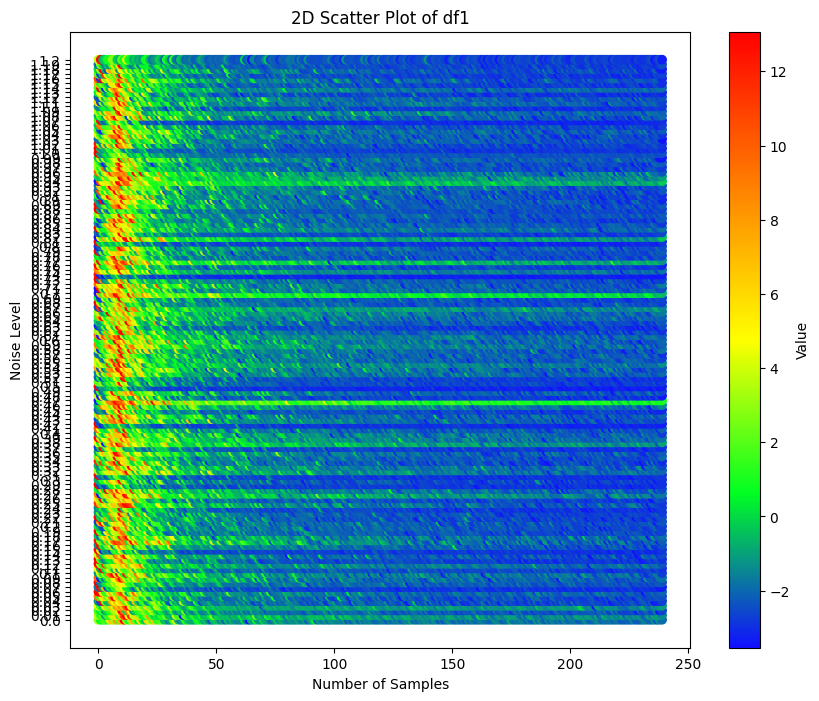

In [26]:
from matplotlib.colors import LinearSegmentedColormap
plt.figure(figsize=(4, 3))  # Adjust figure size as needed

colors = ["#1111FF", "#00FF22", "#FFFF00", "#FF7F00", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("custom_red_green_blue", colors)

# Prepare data for scatter plot
indices = np.arange(len(df01))
columns = df01.columns[:121]
values = df01.values

# Create the scatter plot
plt.figure(figsize=(10, 8))

for i, column in enumerate(columns):
    plt.scatter(indices, [i] * len(indices), c=values[:, i], cmap=cmap, label=column)

# Add color bar
cbar = plt.colorbar()
cbar.set_label('Value')

# Set labels
plt.xlabel('Number of Samples')
plt.ylabel('Noise Level')
plt.yticks(np.arange(len(columns)), columns)
plt.title('2D Scatter Plot of df1')

# Show the plot
plt.show()


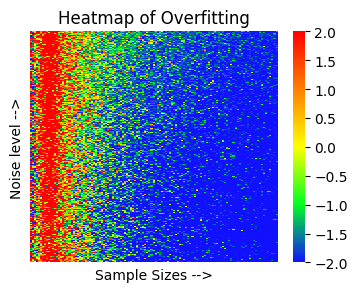

In [27]:
from matplotlib.colors import LinearSegmentedColormap
plt.figure(figsize=(4, 3))  # Adjust figure size as needed

colors = ["#1111FF", "#00FF22", "#FFFF00", "#FF7F00", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("custom_red_green_blue", colors)
ax = sns.heatmap(df01.iloc[:121, ::-1].T, cmap=cmap, vmin=-2, vmax=2)
ax.axes.xaxis.set_ticks_position('none')
ax.axes.yaxis.set_ticks_position('none')

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.xlabel('Sample Sizes -->')
plt.ylabel('Noise level -->')
plt.title('Heatmap of Overfitting')
plt.show()


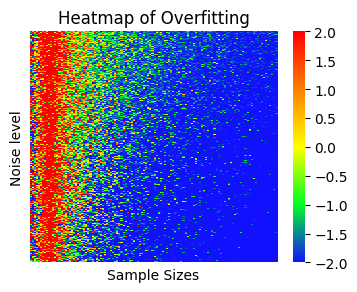

In [28]:
plt.figure(figsize=(4,3))  # Adjust figure size as needed
ax = sns.heatmap(df02.iloc[:120, ::-1].T, cmap=cmap, vmin=-2, vmax=2) # Use 'viridis' or other perceptually uniform colormaps
# you can use other colormaps like 'plasma', 'magma', 'inferno', 'cividis'
ax.axes.xaxis.set_ticks_position('none')
ax.axes.yaxis.set_ticks_position('none')

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.xlabel('Sample Sizes')
plt.ylabel('Noise level')
plt.title('Heatmap of Overfitting')
plt.show()

In [29]:
def fill_nos_vs_tc(target_complexities=cp.array([10]), sample_sizes=cp.array([1]), noise_levels=cp.array([0])):
    nos_vs_tc = [cp.zeros((len(sample_sizes), len(target_complexities))) for i in range(len(noise_levels))]
    print(nos_vs_tc[0].shape)
    for i, noise_level in enumerate(noise_levels):
        for j, sample_size in enumerate(sample_sizes):
            for k, complexity in enumerate(target_complexities):
                print(f"Noise Level: {noise_level}, Sample Size: {sample_size}, Complexity: {complexity}")
                x, y = generate_target(complexity)
                sample_x, sample_y = generate_noisy_samples(x, y, sample_size, noise_level=noise_level)
                h2 = cp.polyfit(sample_x, sample_y, 2)
                y2 = cp.polyval(h2, x)
                h10 = cp.polyfit(sample_x, sample_y, 10)
                y10 = cp.polyval(h10, x)
                eout2 = e_out(y, y2)
                eout10 = e_out(y, y10)
                # print(abs(eout10-eout2))
                nos_vs_tc[i][j, k] = abs(eout10-eout2)
                print((i+1) * (j+1) * (k+1))
    return nos_vs_tc

In [30]:
sample_sizes = cp.arange(1, 401, 1)
target_complexity = cp.arange(1, 121, 1)

In [31]:
nos_vs_tc_outpts = fill_nos_vs_tc(target_complexities=target_complexity, sample_sizes=sample_sizes, noise_levels=cp.array([0, 1, 5]))

(400, 120)
Noise Level: 0, Sample Size: 1, Complexity: 1
1
Noise Level: 0, Sample Size: 1, Complexity: 2
2
Noise Level: 0, Sample Size: 1, Complexity: 3
3
Noise Level: 0, Sample Size: 1, Complexity: 4
4
Noise Level: 0, Sample Size: 1, Complexity: 5
5
Noise Level: 0, Sample Size: 1, Complexity: 6
6
Noise Level: 0, Sample Size: 1, Complexity: 7
7
Noise Level: 0, Sample Size: 1, Complexity: 8
8
Noise Level: 0, Sample Size: 1, Complexity: 9
9
Noise Level: 0, Sample Size: 1, Complexity: 10
10
Noise Level: 0, Sample Size: 1, Complexity: 11
11
Noise Level: 0, Sample Size: 1, Complexity: 12
12
Noise Level: 0, Sample Size: 1, Complexity: 13
13
Noise Level: 0, Sample Size: 1, Complexity: 14
14
Noise Level: 0, Sample Size: 1, Complexity: 15
15
Noise Level: 0, Sample Size: 1, Complexity: 16
16
Noise Level: 0, Sample Size: 1, Complexity: 17
17
Noise Level: 0, Sample Size: 1, Complexity: 18
18
Noise Level: 0, Sample Size: 1, Complexity: 19
19
Noise Level: 0, Sample Size: 1, Complexity: 20
20
Noise L

<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


91
Noise Level: 0, Sample Size: 1, Complexity: 92
92
Noise Level: 0, Sample Size: 1, Complexity: 93
93
Noise Level: 0, Sample Size: 1, Complexity: 94
94
Noise Level: 0, Sample Size: 1, Complexity: 95
95
Noise Level: 0, Sample Size: 1, Complexity: 96
96
Noise Level: 0, Sample Size: 1, Complexity: 97
97
Noise Level: 0, Sample Size: 1, Complexity: 98
98
Noise Level: 0, Sample Size: 1, Complexity: 99
99
Noise Level: 0, Sample Size: 1, Complexity: 100
100
Noise Level: 0, Sample Size: 1, Complexity: 101
101
Noise Level: 0, Sample Size: 1, Complexity: 102
102
Noise Level: 0, Sample Size: 1, Complexity: 103
103
Noise Level: 0, Sample Size: 1, Complexity: 104
104
Noise Level: 0, Sample Size: 1, Complexity: 105
105
Noise Level: 0, Sample Size: 1, Complexity: 106
106
Noise Level: 0, Sample Size: 1, Complexity: 107
107
Noise Level: 0, Sample Size: 1, Complexity: 108
108
Noise Level: 0, Sample Size: 1, Complexity: 109
109
Noise Level: 0, Sample Size: 1, Complexity: 110
110
Noise Level: 0, Sample Si

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)


118
Noise Level: 0, Sample Size: 2, Complexity: 60
120
Noise Level: 0, Sample Size: 2, Complexity: 61
122
Noise Level: 0, Sample Size: 2, Complexity: 62
124
Noise Level: 0, Sample Size: 2, Complexity: 63
126
Noise Level: 0, Sample Size: 2, Complexity: 64
128
Noise Level: 0, Sample Size: 2, Complexity: 65
130
Noise Level: 0, Sample Size: 2, Complexity: 66
132
Noise Level: 0, Sample Size: 2, Complexity: 67
134
Noise Level: 0, Sample Size: 2, Complexity: 68
136
Noise Level: 0, Sample Size: 2, Complexity: 69
138
Noise Level: 0, Sample Size: 2, Complexity: 70
140
Noise Level: 0, Sample Size: 2, Complexity: 71
142
Noise Level: 0, Sample Size: 2, Complexity: 72
144
Noise Level: 0, Sample Size: 2, Complexity: 73
146
Noise Level: 0, Sample Size: 2, Complexity: 74
148
Noise Level: 0, Sample Size: 2, Complexity: 75
150
Noise Level: 0, Sample Size: 2, Complexity: 76
152
Noise Level: 0, Sample Size: 2, Complexity: 77
154
Noise Level: 0, Sample Size: 2, Complexity: 78
156
Noise Level: 0, Sample Size

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

81
Noise Level: 0, Sample Size: 3, Complexity: 28
84
Noise Level: 0, Sample Size: 3, Complexity: 29
87
Noise Level: 0, Sample Size: 3, Complexity: 30
90
Noise Level: 0, Sample Size: 3, Complexity: 31
93
Noise Level: 0, Sample Size: 3, Complexity: 32
96
Noise Level: 0, Sample Size: 3, Complexity: 33
99
Noise Level: 0, Sample Size: 3, Complexity: 34
102
Noise Level: 0, Sample Size: 3, Complexity: 35
105
Noise Level: 0, Sample Size: 3, Complexity: 36
108
Noise Level: 0, Sample Size: 3, Complexity: 37
111
Noise Level: 0, Sample Size: 3, Complexity: 38
114
Noise Level: 0, Sample Size: 3, Complexity: 39
117
Noise Level: 0, Sample Size: 3, Complexity: 40
120
Noise Level: 0, Sample Size: 3, Complexity: 41
123
Noise Level: 0, Sample Size: 3, Complexity: 42
126
Noise Level: 0, Sample Size: 3, Complexity: 43
129
Noise Level: 0, Sample Size: 3, Complexity: 44
132
Noise Level: 0, Sample Size: 3, Complexity: 45
135
Noise Level: 0, Sample Size: 3, Complexity: 46
138
Noise Level: 0, Sample Size: 3, Co

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

48
Noise Level: 0, Sample Size: 4, Complexity: 13
52
Noise Level: 0, Sample Size: 4, Complexity: 14
56
Noise Level: 0, Sample Size: 4, Complexity: 15
60
Noise Level: 0, Sample Size: 4, Complexity: 16
64
Noise Level: 0, Sample Size: 4, Complexity: 17
68
Noise Level: 0, Sample Size: 4, Complexity: 18
72
Noise Level: 0, Sample Size: 4, Complexity: 19
76
Noise Level: 0, Sample Size: 4, Complexity: 20
80
Noise Level: 0, Sample Size: 4, Complexity: 21
84
Noise Level: 0, Sample Size: 4, Complexity: 22
88
Noise Level: 0, Sample Size: 4, Complexity: 23
92
Noise Level: 0, Sample Size: 4, Complexity: 24
96
Noise Level: 0, Sample Size: 4, Complexity: 25
100
Noise Level: 0, Sample Size: 4, Complexity: 26
104
Noise Level: 0, Sample Size: 4, Complexity: 27
108
Noise Level: 0, Sample Size: 4, Complexity: 28
112
Noise Level: 0, Sample Size: 4, Complexity: 29
116
Noise Level: 0, Sample Size: 4, Complexity: 30
120
Noise Level: 0, Sample Size: 4, Complexity: 31
124
Noise Level: 0, Sample Size: 4, Complexi

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

412
Noise Level: 0, Sample Size: 4, Complexity: 104
416
Noise Level: 0, Sample Size: 4, Complexity: 105
420
Noise Level: 0, Sample Size: 4, Complexity: 106
424
Noise Level: 0, Sample Size: 4, Complexity: 107
428
Noise Level: 0, Sample Size: 4, Complexity: 108
432
Noise Level: 0, Sample Size: 4, Complexity: 109
436
Noise Level: 0, Sample Size: 4, Complexity: 110
440
Noise Level: 0, Sample Size: 4, Complexity: 111
444
Noise Level: 0, Sample Size: 4, Complexity: 112
448
Noise Level: 0, Sample Size: 4, Complexity: 113
452
Noise Level: 0, Sample Size: 4, Complexity: 114
456
Noise Level: 0, Sample Size: 4, Complexity: 115
460
Noise Level: 0, Sample Size: 4, Complexity: 116
464
Noise Level: 0, Sample Size: 4, Complexity: 117
468
Noise Level: 0, Sample Size: 4, Complexity: 118
472
Noise Level: 0, Sample Size: 4, Complexity: 119
476
Noise Level: 0, Sample Size: 4, Complexity: 120
480
Noise Level: 0, Sample Size: 5, Complexity: 1
5
Noise Level: 0, Sample Size: 5, Complexity: 2
10
Noise Level: 0,

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

375
Noise Level: 0, Sample Size: 5, Complexity: 76
380
Noise Level: 0, Sample Size: 5, Complexity: 77
385
Noise Level: 0, Sample Size: 5, Complexity: 78
390
Noise Level: 0, Sample Size: 5, Complexity: 79
395
Noise Level: 0, Sample Size: 5, Complexity: 80
400
Noise Level: 0, Sample Size: 5, Complexity: 81
405
Noise Level: 0, Sample Size: 5, Complexity: 82
410
Noise Level: 0, Sample Size: 5, Complexity: 83
415
Noise Level: 0, Sample Size: 5, Complexity: 84
420
Noise Level: 0, Sample Size: 5, Complexity: 85
425
Noise Level: 0, Sample Size: 5, Complexity: 86
430
Noise Level: 0, Sample Size: 5, Complexity: 87
435
Noise Level: 0, Sample Size: 5, Complexity: 88
440
Noise Level: 0, Sample Size: 5, Complexity: 89
445
Noise Level: 0, Sample Size: 5, Complexity: 90
450
Noise Level: 0, Sample Size: 5, Complexity: 91
455
Noise Level: 0, Sample Size: 5, Complexity: 92
460
Noise Level: 0, Sample Size: 5, Complexity: 93
465
Noise Level: 0, Sample Size: 5, Complexity: 94
470
Noise Level: 0, Sample Size

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

246
Noise Level: 0, Sample Size: 6, Complexity: 42
252
Noise Level: 0, Sample Size: 6, Complexity: 43
258
Noise Level: 0, Sample Size: 6, Complexity: 44
264
Noise Level: 0, Sample Size: 6, Complexity: 45
270
Noise Level: 0, Sample Size: 6, Complexity: 46
276
Noise Level: 0, Sample Size: 6, Complexity: 47
282
Noise Level: 0, Sample Size: 6, Complexity: 48
288
Noise Level: 0, Sample Size: 6, Complexity: 49
294
Noise Level: 0, Sample Size: 6, Complexity: 50
300
Noise Level: 0, Sample Size: 6, Complexity: 51
306
Noise Level: 0, Sample Size: 6, Complexity: 52
312
Noise Level: 0, Sample Size: 6, Complexity: 53
318
Noise Level: 0, Sample Size: 6, Complexity: 54
324
Noise Level: 0, Sample Size: 6, Complexity: 55
330
Noise Level: 0, Sample Size: 6, Complexity: 56
336
Noise Level: 0, Sample Size: 6, Complexity: 57
342
Noise Level: 0, Sample Size: 6, Complexity: 58
348
Noise Level: 0, Sample Size: 6, Complexity: 59
354
Noise Level: 0, Sample Size: 6, Complexity: 60
360
Noise Level: 0, Sample Size

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

147
Noise Level: 0, Sample Size: 7, Complexity: 22
154
Noise Level: 0, Sample Size: 7, Complexity: 23
161
Noise Level: 0, Sample Size: 7, Complexity: 24
168
Noise Level: 0, Sample Size: 7, Complexity: 25
175
Noise Level: 0, Sample Size: 7, Complexity: 26
182
Noise Level: 0, Sample Size: 7, Complexity: 27
189
Noise Level: 0, Sample Size: 7, Complexity: 28
196
Noise Level: 0, Sample Size: 7, Complexity: 29
203
Noise Level: 0, Sample Size: 7, Complexity: 30
210
Noise Level: 0, Sample Size: 7, Complexity: 31
217
Noise Level: 0, Sample Size: 7, Complexity: 32
224
Noise Level: 0, Sample Size: 7, Complexity: 33
231
Noise Level: 0, Sample Size: 7, Complexity: 34
238
Noise Level: 0, Sample Size: 7, Complexity: 35
245
Noise Level: 0, Sample Size: 7, Complexity: 36
252
Noise Level: 0, Sample Size: 7, Complexity: 37
259
Noise Level: 0, Sample Size: 7, Complexity: 38
266
Noise Level: 0, Sample Size: 7, Complexity: 39
273
Noise Level: 0, Sample Size: 7, Complexity: 40
280
Noise Level: 0, Sample Size

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

721
Noise Level: 0, Sample Size: 7, Complexity: 104
728
Noise Level: 0, Sample Size: 7, Complexity: 105
735
Noise Level: 0, Sample Size: 7, Complexity: 106
742
Noise Level: 0, Sample Size: 7, Complexity: 107
749
Noise Level: 0, Sample Size: 7, Complexity: 108
756
Noise Level: 0, Sample Size: 7, Complexity: 109
763
Noise Level: 0, Sample Size: 7, Complexity: 110
770
Noise Level: 0, Sample Size: 7, Complexity: 111
777
Noise Level: 0, Sample Size: 7, Complexity: 112
784
Noise Level: 0, Sample Size: 7, Complexity: 113
791
Noise Level: 0, Sample Size: 7, Complexity: 114
798
Noise Level: 0, Sample Size: 7, Complexity: 115
805
Noise Level: 0, Sample Size: 7, Complexity: 116
812
Noise Level: 0, Sample Size: 7, Complexity: 117
819
Noise Level: 0, Sample Size: 7, Complexity: 118
826
Noise Level: 0, Sample Size: 7, Complexity: 119
833
Noise Level: 0, Sample Size: 7, Complexity: 120
840
Noise Level: 0, Sample Size: 8, Complexity: 1
8
Noise Level: 0, Sample Size: 8, Complexity: 2
16
Noise Level: 0,

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

376
Noise Level: 0, Sample Size: 8, Complexity: 48
384
Noise Level: 0, Sample Size: 8, Complexity: 49
392
Noise Level: 0, Sample Size: 8, Complexity: 50
400
Noise Level: 0, Sample Size: 8, Complexity: 51
408
Noise Level: 0, Sample Size: 8, Complexity: 52
416
Noise Level: 0, Sample Size: 8, Complexity: 53
424
Noise Level: 0, Sample Size: 8, Complexity: 54
432
Noise Level: 0, Sample Size: 8, Complexity: 55
440
Noise Level: 0, Sample Size: 8, Complexity: 56
448
Noise Level: 0, Sample Size: 8, Complexity: 57
456
Noise Level: 0, Sample Size: 8, Complexity: 58
464
Noise Level: 0, Sample Size: 8, Complexity: 59
472
Noise Level: 0, Sample Size: 8, Complexity: 60
480
Noise Level: 0, Sample Size: 8, Complexity: 61
488
Noise Level: 0, Sample Size: 8, Complexity: 62
496
Noise Level: 0, Sample Size: 8, Complexity: 63
504
Noise Level: 0, Sample Size: 8, Complexity: 64
512
Noise Level: 0, Sample Size: 8, Complexity: 65
520
Noise Level: 0, Sample Size: 8, Complexity: 66
528
Noise Level: 0, Sample Size

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

567
Noise Level: 0, Sample Size: 9, Complexity: 64
576
Noise Level: 0, Sample Size: 9, Complexity: 65
585
Noise Level: 0, Sample Size: 9, Complexity: 66
594
Noise Level: 0, Sample Size: 9, Complexity: 67
603
Noise Level: 0, Sample Size: 9, Complexity: 68
612
Noise Level: 0, Sample Size: 9, Complexity: 69
621
Noise Level: 0, Sample Size: 9, Complexity: 70
630
Noise Level: 0, Sample Size: 9, Complexity: 71
639
Noise Level: 0, Sample Size: 9, Complexity: 72
648
Noise Level: 0, Sample Size: 9, Complexity: 73
657
Noise Level: 0, Sample Size: 9, Complexity: 74
666
Noise Level: 0, Sample Size: 9, Complexity: 75
675
Noise Level: 0, Sample Size: 9, Complexity: 76
684
Noise Level: 0, Sample Size: 9, Complexity: 77
693
Noise Level: 0, Sample Size: 9, Complexity: 78
702
Noise Level: 0, Sample Size: 9, Complexity: 79
711
Noise Level: 0, Sample Size: 9, Complexity: 80
720
Noise Level: 0, Sample Size: 9, Complexity: 81
729
Noise Level: 0, Sample Size: 9, Complexity: 82
738
Noise Level: 0, Sample Size

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

870
Noise Level: 0, Sample Size: 10, Complexity: 88
880
Noise Level: 0, Sample Size: 10, Complexity: 89
890
Noise Level: 0, Sample Size: 10, Complexity: 90
900
Noise Level: 0, Sample Size: 10, Complexity: 91
910
Noise Level: 0, Sample Size: 10, Complexity: 92
920
Noise Level: 0, Sample Size: 10, Complexity: 93
930
Noise Level: 0, Sample Size: 10, Complexity: 94
940
Noise Level: 0, Sample Size: 10, Complexity: 95
950
Noise Level: 0, Sample Size: 10, Complexity: 96
960
Noise Level: 0, Sample Size: 10, Complexity: 97
970
Noise Level: 0, Sample Size: 10, Complexity: 98
980
Noise Level: 0, Sample Size: 10, Complexity: 99
990
Noise Level: 0, Sample Size: 10, Complexity: 100
1000
Noise Level: 0, Sample Size: 10, Complexity: 101
1010
Noise Level: 0, Sample Size: 10, Complexity: 102
1020
Noise Level: 0, Sample Size: 10, Complexity: 103
1030
Noise Level: 0, Sample Size: 10, Complexity: 104
1040
Noise Level: 0, Sample Size: 10, Complexity: 105
1050
Noise Level: 0, Sample Size: 10, Complexity: 106

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

Streaming output truncated to the last 5000 lines.
26220
Noise Level: 0, Sample Size: 380, Complexity: 70
26600
Noise Level: 0, Sample Size: 380, Complexity: 71
26980
Noise Level: 0, Sample Size: 380, Complexity: 72
27360
Noise Level: 0, Sample Size: 380, Complexity: 73
27740
Noise Level: 0, Sample Size: 380, Complexity: 74
28120
Noise Level: 0, Sample Size: 380, Complexity: 75
28500
Noise Level: 0, Sample Size: 380, Complexity: 76
28880
Noise Level: 0, Sample Size: 380, Complexity: 77
29260
Noise Level: 0, Sample Size: 380, Complexity: 78
29640
Noise Level: 0, Sample Size: 380, Complexity: 79
30020
Noise Level: 0, Sample Size: 380, Complexity: 80
30400
Noise Level: 0, Sample Size: 380, Complexity: 81
30780
Noise Level: 0, Sample Size: 380, Complexity: 82
31160
Noise Level: 0, Sample Size: 380, Complexity: 83
31540
Noise Level: 0, Sample Size: 380, Complexity: 84
31920
Noise Level: 0, Sample Size: 380, Complexity: 85
32300
Noise Level: 0, Sample Size: 380, Complexity: 86
32680
Noise Le

<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


98
Noise Level: 1, Sample Size: 1, Complexity: 50
100
Noise Level: 1, Sample Size: 1, Complexity: 51
102
Noise Level: 1, Sample Size: 1, Complexity: 52
104
Noise Level: 1, Sample Size: 1, Complexity: 53
106
Noise Level: 1, Sample Size: 1, Complexity: 54
108
Noise Level: 1, Sample Size: 1, Complexity: 55
110
Noise Level: 1, Sample Size: 1, Complexity: 56
112
Noise Level: 1, Sample Size: 1, Complexity: 57
114
Noise Level: 1, Sample Size: 1, Complexity: 58
116
Noise Level: 1, Sample Size: 1, Complexity: 59
118
Noise Level: 1, Sample Size: 1, Complexity: 60
120
Noise Level: 1, Sample Size: 1, Complexity: 61
122
Noise Level: 1, Sample Size: 1, Complexity: 62
124
Noise Level: 1, Sample Size: 1, Complexity: 63
126
Noise Level: 1, Sample Size: 1, Complexity: 64
128
Noise Level: 1, Sample Size: 1, Complexity: 65
130
Noise Level: 1, Sample Size: 1, Complexity: 66
132
Noise Level: 1, Sample Size: 1, Complexity: 67
134
Noise Level: 1, Sample Size: 1, Complexity: 68
136
Noise Level: 1, Sample Size:

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)


108
Noise Level: 1, Sample Size: 2, Complexity: 28
112
Noise Level: 1, Sample Size: 2, Complexity: 29
116
Noise Level: 1, Sample Size: 2, Complexity: 30
120
Noise Level: 1, Sample Size: 2, Complexity: 31
124
Noise Level: 1, Sample Size: 2, Complexity: 32
128
Noise Level: 1, Sample Size: 2, Complexity: 33
132
Noise Level: 1, Sample Size: 2, Complexity: 34
136
Noise Level: 1, Sample Size: 2, Complexity: 35
140
Noise Level: 1, Sample Size: 2, Complexity: 36
144
Noise Level: 1, Sample Size: 2, Complexity: 37
148
Noise Level: 1, Sample Size: 2, Complexity: 38
152
Noise Level: 1, Sample Size: 2, Complexity: 39
156
Noise Level: 1, Sample Size: 2, Complexity: 40
160
Noise Level: 1, Sample Size: 2, Complexity: 41
164
Noise Level: 1, Sample Size: 2, Complexity: 42
168
Noise Level: 1, Sample Size: 2, Complexity: 43
172
Noise Level: 1, Sample Size: 2, Complexity: 44
176
Noise Level: 1, Sample Size: 2, Complexity: 45
180
Noise Level: 1, Sample Size: 2, Complexity: 46
184
Noise Level: 1, Sample Size

<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


12
Noise Level: 1, Sample Size: 3, Complexity: 3
18
Noise Level: 1, Sample Size: 3, Complexity: 4
24
Noise Level: 1, Sample Size: 3, Complexity: 5
30
Noise Level: 1, Sample Size: 3, Complexity: 6
36
Noise Level: 1, Sample Size: 3, Complexity: 7
42
Noise Level: 1, Sample Size: 3, Complexity: 8
48
Noise Level: 1, Sample Size: 3, Complexity: 9
54
Noise Level: 1, Sample Size: 3, Complexity: 10
60
Noise Level: 1, Sample Size: 3, Complexity: 11
66
Noise Level: 1, Sample Size: 3, Complexity: 12
72
Noise Level: 1, Sample Size: 3, Complexity: 13
78
Noise Level: 1, Sample Size: 3, Complexity: 14
84
Noise Level: 1, Sample Size: 3, Complexity: 15
90
Noise Level: 1, Sample Size: 3, Complexity: 16
96
Noise Level: 1, Sample Size: 3, Complexity: 17
102
Noise Level: 1, Sample Size: 3, Complexity: 18
108
Noise Level: 1, Sample Size: 3, Complexity: 19
114
Noise Level: 1, Sample Size: 3, Complexity: 20
120
Noise Level: 1, Sample Size: 3, Complexity: 21
126
Noise Level: 1, Sample Size: 3, Complexity: 22
13

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

606
Noise Level: 1, Sample Size: 3, Complexity: 102
612
Noise Level: 1, Sample Size: 3, Complexity: 103
618
Noise Level: 1, Sample Size: 3, Complexity: 104
624
Noise Level: 1, Sample Size: 3, Complexity: 105
630
Noise Level: 1, Sample Size: 3, Complexity: 106
636
Noise Level: 1, Sample Size: 3, Complexity: 107
642
Noise Level: 1, Sample Size: 3, Complexity: 108
648
Noise Level: 1, Sample Size: 3, Complexity: 109
654
Noise Level: 1, Sample Size: 3, Complexity: 110
660
Noise Level: 1, Sample Size: 3, Complexity: 111
666
Noise Level: 1, Sample Size: 3, Complexity: 112
672
Noise Level: 1, Sample Size: 3, Complexity: 113
678
Noise Level: 1, Sample Size: 3, Complexity: 114
684
Noise Level: 1, Sample Size: 3, Complexity: 115
690
Noise Level: 1, Sample Size: 3, Complexity: 116
696
Noise Level: 1, Sample Size: 3, Complexity: 117
702
Noise Level: 1, Sample Size: 3, Complexity: 118
708
Noise Level: 1, Sample Size: 3, Complexity: 119
714
Noise Level: 1, Sample Size: 3, Complexity: 120
720
Noise Le

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

576
Noise Level: 1, Sample Size: 4, Complexity: 73
584
Noise Level: 1, Sample Size: 4, Complexity: 74
592
Noise Level: 1, Sample Size: 4, Complexity: 75
600
Noise Level: 1, Sample Size: 4, Complexity: 76
608
Noise Level: 1, Sample Size: 4, Complexity: 77
616
Noise Level: 1, Sample Size: 4, Complexity: 78
624
Noise Level: 1, Sample Size: 4, Complexity: 79
632
Noise Level: 1, Sample Size: 4, Complexity: 80
640
Noise Level: 1, Sample Size: 4, Complexity: 81
648
Noise Level: 1, Sample Size: 4, Complexity: 82
656
Noise Level: 1, Sample Size: 4, Complexity: 83
664
Noise Level: 1, Sample Size: 4, Complexity: 84
672
Noise Level: 1, Sample Size: 4, Complexity: 85
680
Noise Level: 1, Sample Size: 4, Complexity: 86
688
Noise Level: 1, Sample Size: 4, Complexity: 87
696
Noise Level: 1, Sample Size: 4, Complexity: 88
704
Noise Level: 1, Sample Size: 4, Complexity: 89
712
Noise Level: 1, Sample Size: 4, Complexity: 90
720
Noise Level: 1, Sample Size: 4, Complexity: 91
728
Noise Level: 1, Sample Size

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

480
Noise Level: 1, Sample Size: 5, Complexity: 49
490
Noise Level: 1, Sample Size: 5, Complexity: 50
500
Noise Level: 1, Sample Size: 5, Complexity: 51
510
Noise Level: 1, Sample Size: 5, Complexity: 52
520
Noise Level: 1, Sample Size: 5, Complexity: 53
530
Noise Level: 1, Sample Size: 5, Complexity: 54
540
Noise Level: 1, Sample Size: 5, Complexity: 55
550
Noise Level: 1, Sample Size: 5, Complexity: 56
560
Noise Level: 1, Sample Size: 5, Complexity: 57
570
Noise Level: 1, Sample Size: 5, Complexity: 58
580
Noise Level: 1, Sample Size: 5, Complexity: 59
590
Noise Level: 1, Sample Size: 5, Complexity: 60
600
Noise Level: 1, Sample Size: 5, Complexity: 61
610
Noise Level: 1, Sample Size: 5, Complexity: 62
620
Noise Level: 1, Sample Size: 5, Complexity: 63
630
Noise Level: 1, Sample Size: 5, Complexity: 64
640
Noise Level: 1, Sample Size: 5, Complexity: 65
650
Noise Level: 1, Sample Size: 5, Complexity: 66
660
Noise Level: 1, Sample Size: 5, Complexity: 67
670
Noise Level: 1, Sample Size

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

288
Noise Level: 1, Sample Size: 6, Complexity: 25
300
Noise Level: 1, Sample Size: 6, Complexity: 26
312
Noise Level: 1, Sample Size: 6, Complexity: 27
324
Noise Level: 1, Sample Size: 6, Complexity: 28
336
Noise Level: 1, Sample Size: 6, Complexity: 29
348
Noise Level: 1, Sample Size: 6, Complexity: 30
360
Noise Level: 1, Sample Size: 6, Complexity: 31
372
Noise Level: 1, Sample Size: 6, Complexity: 32
384
Noise Level: 1, Sample Size: 6, Complexity: 33
396
Noise Level: 1, Sample Size: 6, Complexity: 34
408
Noise Level: 1, Sample Size: 6, Complexity: 35
420
Noise Level: 1, Sample Size: 6, Complexity: 36
432
Noise Level: 1, Sample Size: 6, Complexity: 37
444
Noise Level: 1, Sample Size: 6, Complexity: 38
456
Noise Level: 1, Sample Size: 6, Complexity: 39
468
Noise Level: 1, Sample Size: 6, Complexity: 40
480
Noise Level: 1, Sample Size: 6, Complexity: 41
492
Noise Level: 1, Sample Size: 6, Complexity: 42
504
Noise Level: 1, Sample Size: 6, Complexity: 43
516
Noise Level: 1, Sample Size

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

56
Noise Level: 1, Sample Size: 7, Complexity: 5
70
Noise Level: 1, Sample Size: 7, Complexity: 6
84
Noise Level: 1, Sample Size: 7, Complexity: 7
98
Noise Level: 1, Sample Size: 7, Complexity: 8
112
Noise Level: 1, Sample Size: 7, Complexity: 9
126
Noise Level: 1, Sample Size: 7, Complexity: 10
140
Noise Level: 1, Sample Size: 7, Complexity: 11
154
Noise Level: 1, Sample Size: 7, Complexity: 12
168
Noise Level: 1, Sample Size: 7, Complexity: 13
182
Noise Level: 1, Sample Size: 7, Complexity: 14
196
Noise Level: 1, Sample Size: 7, Complexity: 15
210
Noise Level: 1, Sample Size: 7, Complexity: 16
224
Noise Level: 1, Sample Size: 7, Complexity: 17
238
Noise Level: 1, Sample Size: 7, Complexity: 18
252
Noise Level: 1, Sample Size: 7, Complexity: 19
266
Noise Level: 1, Sample Size: 7, Complexity: 20
280
Noise Level: 1, Sample Size: 7, Complexity: 21
294
Noise Level: 1, Sample Size: 7, Complexity: 22
308
Noise Level: 1, Sample Size: 7, Complexity: 23
322
Noise Level: 1, Sample Size: 7, Comp

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

1428
Noise Level: 1, Sample Size: 7, Complexity: 103
1442
Noise Level: 1, Sample Size: 7, Complexity: 104
1456
Noise Level: 1, Sample Size: 7, Complexity: 105
1470
Noise Level: 1, Sample Size: 7, Complexity: 106
1484
Noise Level: 1, Sample Size: 7, Complexity: 107
1498
Noise Level: 1, Sample Size: 7, Complexity: 108
1512
Noise Level: 1, Sample Size: 7, Complexity: 109
1526
Noise Level: 1, Sample Size: 7, Complexity: 110
1540
Noise Level: 1, Sample Size: 7, Complexity: 111
1554
Noise Level: 1, Sample Size: 7, Complexity: 112
1568
Noise Level: 1, Sample Size: 7, Complexity: 113
1582
Noise Level: 1, Sample Size: 7, Complexity: 114
1596
Noise Level: 1, Sample Size: 7, Complexity: 115
1610
Noise Level: 1, Sample Size: 7, Complexity: 116
1624
Noise Level: 1, Sample Size: 7, Complexity: 117
1638
Noise Level: 1, Sample Size: 7, Complexity: 118
1652
Noise Level: 1, Sample Size: 7, Complexity: 119
1666
Noise Level: 1, Sample Size: 7, Complexity: 120
1680
Noise Level: 1, Sample Size: 8, Complexit

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

1120
Noise Level: 1, Sample Size: 8, Complexity: 71
1136
Noise Level: 1, Sample Size: 8, Complexity: 72
1152
Noise Level: 1, Sample Size: 8, Complexity: 73
1168
Noise Level: 1, Sample Size: 8, Complexity: 74
1184
Noise Level: 1, Sample Size: 8, Complexity: 75
1200
Noise Level: 1, Sample Size: 8, Complexity: 76
1216
Noise Level: 1, Sample Size: 8, Complexity: 77
1232
Noise Level: 1, Sample Size: 8, Complexity: 78
1248
Noise Level: 1, Sample Size: 8, Complexity: 79
1264
Noise Level: 1, Sample Size: 8, Complexity: 80
1280
Noise Level: 1, Sample Size: 8, Complexity: 81
1296
Noise Level: 1, Sample Size: 8, Complexity: 82
1312
Noise Level: 1, Sample Size: 8, Complexity: 83
1328
Noise Level: 1, Sample Size: 8, Complexity: 84
1344
Noise Level: 1, Sample Size: 8, Complexity: 85
1360
Noise Level: 1, Sample Size: 8, Complexity: 86
1376
Noise Level: 1, Sample Size: 8, Complexity: 87
1392
Noise Level: 1, Sample Size: 8, Complexity: 88
1408
Noise Level: 1, Sample Size: 8, Complexity: 89
1424
Noise L

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

846
Noise Level: 1, Sample Size: 9, Complexity: 48
864
Noise Level: 1, Sample Size: 9, Complexity: 49
882
Noise Level: 1, Sample Size: 9, Complexity: 50
900
Noise Level: 1, Sample Size: 9, Complexity: 51
918
Noise Level: 1, Sample Size: 9, Complexity: 52
936
Noise Level: 1, Sample Size: 9, Complexity: 53
954
Noise Level: 1, Sample Size: 9, Complexity: 54
972
Noise Level: 1, Sample Size: 9, Complexity: 55
990
Noise Level: 1, Sample Size: 9, Complexity: 56
1008
Noise Level: 1, Sample Size: 9, Complexity: 57
1026
Noise Level: 1, Sample Size: 9, Complexity: 58
1044
Noise Level: 1, Sample Size: 9, Complexity: 59
1062
Noise Level: 1, Sample Size: 9, Complexity: 60
1080
Noise Level: 1, Sample Size: 9, Complexity: 61
1098
Noise Level: 1, Sample Size: 9, Complexity: 62
1116
Noise Level: 1, Sample Size: 9, Complexity: 63
1134
Noise Level: 1, Sample Size: 9, Complexity: 64
1152
Noise Level: 1, Sample Size: 9, Complexity: 65
1170
Noise Level: 1, Sample Size: 9, Complexity: 66
1188
Noise Level: 1, 

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

440
Noise Level: 1, Sample Size: 10, Complexity: 23
460
Noise Level: 1, Sample Size: 10, Complexity: 24
480
Noise Level: 1, Sample Size: 10, Complexity: 25
500
Noise Level: 1, Sample Size: 10, Complexity: 26
520
Noise Level: 1, Sample Size: 10, Complexity: 27
540
Noise Level: 1, Sample Size: 10, Complexity: 28
560
Noise Level: 1, Sample Size: 10, Complexity: 29
580
Noise Level: 1, Sample Size: 10, Complexity: 30
600
Noise Level: 1, Sample Size: 10, Complexity: 31
620
Noise Level: 1, Sample Size: 10, Complexity: 32
640
Noise Level: 1, Sample Size: 10, Complexity: 33
660
Noise Level: 1, Sample Size: 10, Complexity: 34
680
Noise Level: 1, Sample Size: 10, Complexity: 35
700
Noise Level: 1, Sample Size: 10, Complexity: 36
720
Noise Level: 1, Sample Size: 10, Complexity: 37
740
Noise Level: 1, Sample Size: 10, Complexity: 38
760
Noise Level: 1, Sample Size: 10, Complexity: 39
780
Noise Level: 1, Sample Size: 10, Complexity: 40
800
Noise Level: 1, Sample Size: 10, Complexity: 41
820
Noise Le

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

Streaming output truncated to the last 5000 lines.
27360
Noise Level: 1, Sample Size: 380, Complexity: 37
28120
Noise Level: 1, Sample Size: 380, Complexity: 38
28880
Noise Level: 1, Sample Size: 380, Complexity: 39
29640
Noise Level: 1, Sample Size: 380, Complexity: 40
30400
Noise Level: 1, Sample Size: 380, Complexity: 41
31160
Noise Level: 1, Sample Size: 380, Complexity: 42
31920
Noise Level: 1, Sample Size: 380, Complexity: 43
32680
Noise Level: 1, Sample Size: 380, Complexity: 44
33440
Noise Level: 1, Sample Size: 380, Complexity: 45
34200
Noise Level: 1, Sample Size: 380, Complexity: 46
34960
Noise Level: 1, Sample Size: 380, Complexity: 47
35720
Noise Level: 1, Sample Size: 380, Complexity: 48
36480
Noise Level: 1, Sample Size: 380, Complexity: 49
37240
Noise Level: 1, Sample Size: 380, Complexity: 50
38000
Noise Level: 1, Sample Size: 380, Complexity: 51
38760
Noise Level: 1, Sample Size: 380, Complexity: 52
39520
Noise Level: 1, Sample Size: 380, Complexity: 53
40280
Noise Le

<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


48
Noise Level: 5, Sample Size: 1, Complexity: 17
51
Noise Level: 5, Sample Size: 1, Complexity: 18
54
Noise Level: 5, Sample Size: 1, Complexity: 19
57
Noise Level: 5, Sample Size: 1, Complexity: 20
60
Noise Level: 5, Sample Size: 1, Complexity: 21
63
Noise Level: 5, Sample Size: 1, Complexity: 22
66
Noise Level: 5, Sample Size: 1, Complexity: 23
69
Noise Level: 5, Sample Size: 1, Complexity: 24
72
Noise Level: 5, Sample Size: 1, Complexity: 25
75
Noise Level: 5, Sample Size: 1, Complexity: 26
78
Noise Level: 5, Sample Size: 1, Complexity: 27
81
Noise Level: 5, Sample Size: 1, Complexity: 28
84
Noise Level: 5, Sample Size: 1, Complexity: 29
87
Noise Level: 5, Sample Size: 1, Complexity: 30
90
Noise Level: 5, Sample Size: 1, Complexity: 31
93
Noise Level: 5, Sample Size: 1, Complexity: 32
96
Noise Level: 5, Sample Size: 1, Complexity: 33
99
Noise Level: 5, Sample Size: 1, Complexity: 34
102
Noise Level: 5, Sample Size: 1, Complexity: 35
105
Noise Level: 5, Sample Size: 1, Complexity: 3

<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


318
Noise Level: 5, Sample Size: 1, Complexity: 107
321
Noise Level: 5, Sample Size: 1, Complexity: 108
324
Noise Level: 5, Sample Size: 1, Complexity: 109
327
Noise Level: 5, Sample Size: 1, Complexity: 110
330
Noise Level: 5, Sample Size: 1, Complexity: 111
333
Noise Level: 5, Sample Size: 1, Complexity: 112
336
Noise Level: 5, Sample Size: 1, Complexity: 113
339
Noise Level: 5, Sample Size: 1, Complexity: 114
342
Noise Level: 5, Sample Size: 1, Complexity: 115
345
Noise Level: 5, Sample Size: 1, Complexity: 116
348
Noise Level: 5, Sample Size: 1, Complexity: 117
351
Noise Level: 5, Sample Size: 1, Complexity: 118
354
Noise Level: 5, Sample Size: 1, Complexity: 119
357
Noise Level: 5, Sample Size: 1, Complexity: 120
360
Noise Level: 5, Sample Size: 2, Complexity: 1
6
Noise Level: 5, Sample Size: 2, Complexity: 2
12
Noise Level: 5, Sample Size: 2, Complexity: 3
18
Noise Level: 5, Sample Size: 2, Complexity: 4
24
Noise Level: 5, Sample Size: 2, Complexity: 5
30
Noise Level: 5, Sample S

<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


498
Noise Level: 5, Sample Size: 2, Complexity: 84
504
Noise Level: 5, Sample Size: 2, Complexity: 85
510
Noise Level: 5, Sample Size: 2, Complexity: 86
516
Noise Level: 5, Sample Size: 2, Complexity: 87
522
Noise Level: 5, Sample Size: 2, Complexity: 88
528
Noise Level: 5, Sample Size: 2, Complexity: 89
534
Noise Level: 5, Sample Size: 2, Complexity: 90
540
Noise Level: 5, Sample Size: 2, Complexity: 91
546
Noise Level: 5, Sample Size: 2, Complexity: 92
552
Noise Level: 5, Sample Size: 2, Complexity: 93
558
Noise Level: 5, Sample Size: 2, Complexity: 94
564
Noise Level: 5, Sample Size: 2, Complexity: 95
570
Noise Level: 5, Sample Size: 2, Complexity: 96
576
Noise Level: 5, Sample Size: 2, Complexity: 97
582
Noise Level: 5, Sample Size: 2, Complexity: 98
588
Noise Level: 5, Sample Size: 2, Complexity: 99
594
Noise Level: 5, Sample Size: 2, Complexity: 100
600
Noise Level: 5, Sample Size: 2, Complexity: 101
606
Noise Level: 5, Sample Size: 2, Complexity: 102
612
Noise Level: 5, Sample S

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

567
Noise Level: 5, Sample Size: 3, Complexity: 64
576
Noise Level: 5, Sample Size: 3, Complexity: 65
585
Noise Level: 5, Sample Size: 3, Complexity: 66
594
Noise Level: 5, Sample Size: 3, Complexity: 67
603
Noise Level: 5, Sample Size: 3, Complexity: 68
612
Noise Level: 5, Sample Size: 3, Complexity: 69
621
Noise Level: 5, Sample Size: 3, Complexity: 70
630
Noise Level: 5, Sample Size: 3, Complexity: 71
639
Noise Level: 5, Sample Size: 3, Complexity: 72
648
Noise Level: 5, Sample Size: 3, Complexity: 73
657
Noise Level: 5, Sample Size: 3, Complexity: 74
666
Noise Level: 5, Sample Size: 3, Complexity: 75
675
Noise Level: 5, Sample Size: 3, Complexity: 76
684
Noise Level: 5, Sample Size: 3, Complexity: 77
693
Noise Level: 5, Sample Size: 3, Complexity: 78
702
Noise Level: 5, Sample Size: 3, Complexity: 79
711
Noise Level: 5, Sample Size: 3, Complexity: 80
720
Noise Level: 5, Sample Size: 3, Complexity: 81
729
Noise Level: 5, Sample Size: 3, Complexity: 82
738
Noise Level: 5, Sample Size

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

444
Noise Level: 5, Sample Size: 4, Complexity: 38
456
Noise Level: 5, Sample Size: 4, Complexity: 39
468
Noise Level: 5, Sample Size: 4, Complexity: 40
480
Noise Level: 5, Sample Size: 4, Complexity: 41
492
Noise Level: 5, Sample Size: 4, Complexity: 42
504
Noise Level: 5, Sample Size: 4, Complexity: 43
516
Noise Level: 5, Sample Size: 4, Complexity: 44
528
Noise Level: 5, Sample Size: 4, Complexity: 45
540
Noise Level: 5, Sample Size: 4, Complexity: 46
552
Noise Level: 5, Sample Size: 4, Complexity: 47
564
Noise Level: 5, Sample Size: 4, Complexity: 48
576
Noise Level: 5, Sample Size: 4, Complexity: 49
588
Noise Level: 5, Sample Size: 4, Complexity: 50
600
Noise Level: 5, Sample Size: 4, Complexity: 51
612
Noise Level: 5, Sample Size: 4, Complexity: 52
624
Noise Level: 5, Sample Size: 4, Complexity: 53
636
Noise Level: 5, Sample Size: 4, Complexity: 54
648
Noise Level: 5, Sample Size: 4, Complexity: 55
660
Noise Level: 5, Sample Size: 4, Complexity: 56
672
Noise Level: 5, Sample Size

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

240
Noise Level: 5, Sample Size: 5, Complexity: 17
255
Noise Level: 5, Sample Size: 5, Complexity: 18
270
Noise Level: 5, Sample Size: 5, Complexity: 19
285
Noise Level: 5, Sample Size: 5, Complexity: 20
300
Noise Level: 5, Sample Size: 5, Complexity: 21
315
Noise Level: 5, Sample Size: 5, Complexity: 22
330
Noise Level: 5, Sample Size: 5, Complexity: 23
345
Noise Level: 5, Sample Size: 5, Complexity: 24
360
Noise Level: 5, Sample Size: 5, Complexity: 25
375
Noise Level: 5, Sample Size: 5, Complexity: 26
390
Noise Level: 5, Sample Size: 5, Complexity: 27
405
Noise Level: 5, Sample Size: 5, Complexity: 28
420
Noise Level: 5, Sample Size: 5, Complexity: 29
435
Noise Level: 5, Sample Size: 5, Complexity: 30
450
Noise Level: 5, Sample Size: 5, Complexity: 31
465
Noise Level: 5, Sample Size: 5, Complexity: 32
480
Noise Level: 5, Sample Size: 5, Complexity: 33
495
Noise Level: 5, Sample Size: 5, Complexity: 34
510
Noise Level: 5, Sample Size: 5, Complexity: 35
525
Noise Level: 5, Sample Size

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

1590
Noise Level: 5, Sample Size: 5, Complexity: 107
1605
Noise Level: 5, Sample Size: 5, Complexity: 108
1620
Noise Level: 5, Sample Size: 5, Complexity: 109
1635
Noise Level: 5, Sample Size: 5, Complexity: 110
1650
Noise Level: 5, Sample Size: 5, Complexity: 111
1665
Noise Level: 5, Sample Size: 5, Complexity: 112
1680
Noise Level: 5, Sample Size: 5, Complexity: 113
1695
Noise Level: 5, Sample Size: 5, Complexity: 114
1710
Noise Level: 5, Sample Size: 5, Complexity: 115
1725
Noise Level: 5, Sample Size: 5, Complexity: 116
1740
Noise Level: 5, Sample Size: 5, Complexity: 117
1755
Noise Level: 5, Sample Size: 5, Complexity: 118
1770
Noise Level: 5, Sample Size: 5, Complexity: 119
1785
Noise Level: 5, Sample Size: 5, Complexity: 120
1800
Noise Level: 5, Sample Size: 6, Complexity: 1
18
Noise Level: 5, Sample Size: 6, Complexity: 2
36
Noise Level: 5, Sample Size: 6, Complexity: 3
54
Noise Level: 5, Sample Size: 6, Complexity: 4
72
Noise Level: 5, Sample Size: 6, Complexity: 5
90
Noise Le

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

1350
Noise Level: 5, Sample Size: 6, Complexity: 76
1368
Noise Level: 5, Sample Size: 6, Complexity: 77
1386
Noise Level: 5, Sample Size: 6, Complexity: 78
1404
Noise Level: 5, Sample Size: 6, Complexity: 79
1422
Noise Level: 5, Sample Size: 6, Complexity: 80
1440
Noise Level: 5, Sample Size: 6, Complexity: 81
1458
Noise Level: 5, Sample Size: 6, Complexity: 82
1476
Noise Level: 5, Sample Size: 6, Complexity: 83
1494
Noise Level: 5, Sample Size: 6, Complexity: 84
1512
Noise Level: 5, Sample Size: 6, Complexity: 85
1530
Noise Level: 5, Sample Size: 6, Complexity: 86
1548
Noise Level: 5, Sample Size: 6, Complexity: 87
1566
Noise Level: 5, Sample Size: 6, Complexity: 88
1584
Noise Level: 5, Sample Size: 6, Complexity: 89
1602
Noise Level: 5, Sample Size: 6, Complexity: 90
1620
Noise Level: 5, Sample Size: 6, Complexity: 91
1638
Noise Level: 5, Sample Size: 6, Complexity: 92
1656
Noise Level: 5, Sample Size: 6, Complexity: 93
1674
Noise Level: 5, Sample Size: 6, Complexity: 94
1692
Noise L

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

1113
Noise Level: 5, Sample Size: 7, Complexity: 54
1134
Noise Level: 5, Sample Size: 7, Complexity: 55
1155
Noise Level: 5, Sample Size: 7, Complexity: 56
1176
Noise Level: 5, Sample Size: 7, Complexity: 57
1197
Noise Level: 5, Sample Size: 7, Complexity: 58
1218
Noise Level: 5, Sample Size: 7, Complexity: 59
1239
Noise Level: 5, Sample Size: 7, Complexity: 60
1260
Noise Level: 5, Sample Size: 7, Complexity: 61
1281
Noise Level: 5, Sample Size: 7, Complexity: 62
1302
Noise Level: 5, Sample Size: 7, Complexity: 63
1323
Noise Level: 5, Sample Size: 7, Complexity: 64
1344
Noise Level: 5, Sample Size: 7, Complexity: 65
1365
Noise Level: 5, Sample Size: 7, Complexity: 66
1386
Noise Level: 5, Sample Size: 7, Complexity: 67
1407
Noise Level: 5, Sample Size: 7, Complexity: 68
1428
Noise Level: 5, Sample Size: 7, Complexity: 69
1449
Noise Level: 5, Sample Size: 7, Complexity: 70
1470
Noise Level: 5, Sample Size: 7, Complexity: 71
1491
Noise Level: 5, Sample Size: 7, Complexity: 72
1512
Noise L

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

624
Noise Level: 5, Sample Size: 8, Complexity: 27
648
Noise Level: 5, Sample Size: 8, Complexity: 28
672
Noise Level: 5, Sample Size: 8, Complexity: 29
696
Noise Level: 5, Sample Size: 8, Complexity: 30
720
Noise Level: 5, Sample Size: 8, Complexity: 31
744
Noise Level: 5, Sample Size: 8, Complexity: 32
768
Noise Level: 5, Sample Size: 8, Complexity: 33
792
Noise Level: 5, Sample Size: 8, Complexity: 34
816
Noise Level: 5, Sample Size: 8, Complexity: 35
840
Noise Level: 5, Sample Size: 8, Complexity: 36
864
Noise Level: 5, Sample Size: 8, Complexity: 37
888
Noise Level: 5, Sample Size: 8, Complexity: 38
912
Noise Level: 5, Sample Size: 8, Complexity: 39
936
Noise Level: 5, Sample Size: 8, Complexity: 40
960
Noise Level: 5, Sample Size: 8, Complexity: 41
984
Noise Level: 5, Sample Size: 8, Complexity: 42
1008
Noise Level: 5, Sample Size: 8, Complexity: 43
1032
Noise Level: 5, Sample Size: 8, Complexity: 44
1056
Noise Level: 5, Sample Size: 8, Complexity: 45
1080
Noise Level: 5, Sample 

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

54
Noise Level: 5, Sample Size: 9, Complexity: 3
81
Noise Level: 5, Sample Size: 9, Complexity: 4
108
Noise Level: 5, Sample Size: 9, Complexity: 5
135
Noise Level: 5, Sample Size: 9, Complexity: 6
162
Noise Level: 5, Sample Size: 9, Complexity: 7
189
Noise Level: 5, Sample Size: 9, Complexity: 8
216
Noise Level: 5, Sample Size: 9, Complexity: 9
243
Noise Level: 5, Sample Size: 9, Complexity: 10
270
Noise Level: 5, Sample Size: 9, Complexity: 11
297
Noise Level: 5, Sample Size: 9, Complexity: 12
324
Noise Level: 5, Sample Size: 9, Complexity: 13
351
Noise Level: 5, Sample Size: 9, Complexity: 14
378
Noise Level: 5, Sample Size: 9, Complexity: 15
405
Noise Level: 5, Sample Size: 9, Complexity: 16
432
Noise Level: 5, Sample Size: 9, Complexity: 17
459
Noise Level: 5, Sample Size: 9, Complexity: 18
486
Noise Level: 5, Sample Size: 9, Complexity: 19
513
Noise Level: 5, Sample Size: 9, Complexity: 20
540
Noise Level: 5, Sample Size: 9, Complexity: 21
567
Noise Level: 5, Sample Size: 9, Comp

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

2592
Noise Level: 5, Sample Size: 9, Complexity: 97
2619
Noise Level: 5, Sample Size: 9, Complexity: 98
2646
Noise Level: 5, Sample Size: 9, Complexity: 99
2673
Noise Level: 5, Sample Size: 9, Complexity: 100
2700
Noise Level: 5, Sample Size: 9, Complexity: 101
2727
Noise Level: 5, Sample Size: 9, Complexity: 102
2754
Noise Level: 5, Sample Size: 9, Complexity: 103
2781
Noise Level: 5, Sample Size: 9, Complexity: 104
2808
Noise Level: 5, Sample Size: 9, Complexity: 105
2835
Noise Level: 5, Sample Size: 9, Complexity: 106
2862
Noise Level: 5, Sample Size: 9, Complexity: 107
2889
Noise Level: 5, Sample Size: 9, Complexity: 108
2916
Noise Level: 5, Sample Size: 9, Complexity: 109
2943
Noise Level: 5, Sample Size: 9, Complexity: 110
2970
Noise Level: 5, Sample Size: 9, Complexity: 111
2997
Noise Level: 5, Sample Size: 9, Complexity: 112
3024
Noise Level: 5, Sample Size: 9, Complexity: 113
3051
Noise Level: 5, Sample Size: 9, Complexity: 114
3078
Noise Level: 5, Sample Size: 9, Complexity: 

<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-29-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

Streaming output truncated to the last 5000 lines.
Noise Level: 5, Sample Size: 380, Complexity: 21
23940
Noise Level: 5, Sample Size: 380, Complexity: 22
25080
Noise Level: 5, Sample Size: 380, Complexity: 23
26220
Noise Level: 5, Sample Size: 380, Complexity: 24
27360
Noise Level: 5, Sample Size: 380, Complexity: 25
28500
Noise Level: 5, Sample Size: 380, Complexity: 26
29640
Noise Level: 5, Sample Size: 380, Complexity: 27
30780
Noise Level: 5, Sample Size: 380, Complexity: 28
31920
Noise Level: 5, Sample Size: 380, Complexity: 29
33060
Noise Level: 5, Sample Size: 380, Complexity: 30
34200
Noise Level: 5, Sample Size: 380, Complexity: 31
35340
Noise Level: 5, Sample Size: 380, Complexity: 32
36480
Noise Level: 5, Sample Size: 380, Complexity: 33
37620
Noise Level: 5, Sample Size: 380, Complexity: 34
38760
Noise Level: 5, Sample Size: 380, Complexity: 35
39900
Noise Level: 5, Sample Size: 380, Complexity: 36
41040
Noise Level: 5, Sample Size: 380, Complexity: 37
42180
Noise Level: 5

In [32]:
nos_vs_tc1, nos_vs_tc2, nos_vs_tc3 = nos_vs_tc_outpts

In [33]:
nos_vs_tc1.shape, nos_vs_tc2.shape, nos_vs_tc3.shape

((400, 120), (400, 120), (400, 120))

In [34]:
import pandas as pd
df1 = pd.DataFrame(np.log10(np.abs(nos_vs_tc1)), columns=target_complexity, index=sample_sizes)
df2 = pd.DataFrame(np.log10(np.abs(nos_vs_tc2)), columns=target_complexity, index=sample_sizes)
df3 = pd.DataFrame(np.log10(np.abs(nos_vs_tc3)), columns=target_complexity, index=sample_sizes)


df1.iloc[:, ::-1]

120       119       118       117       116       115       114  \
1    12.220396 -1.834537 -0.498848  1.224665 -2.760328  8.916075  7.436427   
2    -3.610841 -2.181892 -3.533000  1.797847 -1.771588  0.627172 -2.358546   
3    -2.779854 -2.819510 -2.962666 -4.234566 -1.402459 -2.733971  4.265486   
4    -1.743743 -0.511967 -1.450701  7.567939 -3.497869  6.960294  1.027663   
5     0.245559 -0.814597  0.480332 -1.067781  1.401343 -1.444415 -0.281917   
..         ...       ...       ...       ...       ...       ...       ...   
396  -3.558957 -3.471703 -4.270066 -3.771051 -3.955815 -3.706380 -3.716993   
397  -4.108946 -3.838396 -3.640797 -4.376200 -4.008352 -3.714805 -4.163157   
398  -3.809165 -4.078694 -4.185109 -3.643111 -3.668460 -4.247054 -3.793904   
399  -4.232922 -3.898001 -4.352227 -4.049894 -4.032322 -4.343121 -4.086661   
400  -4.315736 -3.816381 -3.625238 -4.953461 -3.973786 -3.426573 -4.661643   

          113       112       111  ...       10        9         8    \
1    2.625551  3.095147  2.767020  ...  1.379192 -2.022386  5.388771   
2   -3.719974 -3.684560 -0.481652  ...  3.973792 -0.824970  5.227128   
3   -0.666729  2.639411  5.107843  ... -1.650595 -0.781559 -0.179081   
4    1.829062 -3.154340 -1.063613  ...  1.189898  1.117500  0.973778   
5    1.005193 -2.236893  2.598582  ...  2.110238  0.568906  1.259923   
..        ...       ...       ...  ...       ...       ...       ...   
396 -3.611247 -3.794909 -4.204305  ... -1.319379 -1.274766 -1.223168   
397 -3.403428 -3.754687 -3.882172  ... -1.319089 -1.277995 -1.226352   
398 -3.539238 -3.437356 -3.885373  ... -1.320875 -1.277798 -1.228709   
399 -3.532677 -3.780285 -3.791443  ... -1.317479 -1.278418 -1.225799   
400 -3.953442 -3.452428 -3.293422  ... -1.317945 -1.278285 -1.225836   

          7         6         5         4         3          2          1    
1   -1.708223 -3.827072 -0.005678 -1.003542  3.941201   7.677861   0.284022  
2    1.244739 -1.336208  0.277299  1.788973 -0.643475   3.110194  -1.264112  
3   -1.867047  1.622835 -0.567796 -1.292915 -0.936120  -1.235096  -1.952450  
4   -0.784218 -0.344643  7.072836  2.088653 -0.749713   1.963453   0.405910  
5    0.844075  0.695967  1.128338  1.481498 -0.587144  -2.226068  -3.331427  
..        ...       ...       ...       ...       ...        ...        ...  
396 -1.174429 -1.109894 -1.041140 -0.953414 -0.842619 -32.822553 -31.060763  
397 -1.171588 -1.112629 -1.031940 -0.950155 -0.834338 -30.424640 -31.028602  
398 -1.162468 -1.111210 -1.041216 -0.952331 -0.841938 -31.124099 -30.754626  
399 -1.170875 -1.112908 -1.040249 -0.953852 -0.843770 -30.860584 -30.013150  
400 -1.172427 -1.108270 -1.039393 -0.948515 -0.842061 -30.390389 -30.562603  

[400 rows x 120 columns]

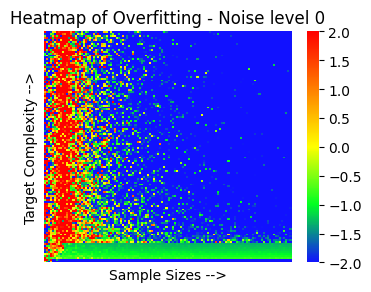

In [35]:
from matplotlib.colors import LinearSegmentedColormap
plt.figure(figsize=(4, 3))  # Adjust figure size as needed

colors = ["#1111FF", "#00FF22", "#FFFF00", "#FF7F00", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("custom_red_green_blue", colors)
ax = sns.heatmap(df1.iloc[:120, ::-1].T, cmap=cmap, vmin=-2, vmax=2)
ax.axes.xaxis.set_ticks_position('none')
ax.axes.yaxis.set_ticks_position('none')

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.xlabel('Sample Sizes -->')
plt.ylabel('Target Complexity -->')
plt.title('Heatmap of Overfitting - Noise level 0')
plt.show()


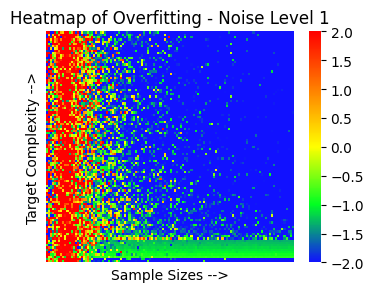

In [36]:
plt.figure(figsize=(4, 3))  # Adjust figure size as needed

colors = ["#1111FF", "#00FF22", "#FFFF00", "#FF7F00", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("custom_red_green_blue", colors)
ax = sns.heatmap(df2.iloc[:120, 100::-1].T, cmap=cmap, vmin=-2, vmax=2)
ax.axes.xaxis.set_ticks_position('none')
ax.axes.yaxis.set_ticks_position('none')

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.xlabel('Sample Sizes -->')
plt.ylabel('Target Complexity -->')
plt.title('Heatmap of Overfitting - Noise Level 1')
plt.show()

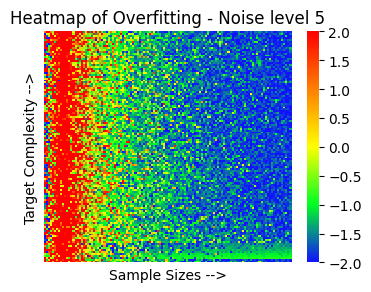

In [39]:
plt.figure(figsize=(4, 3))  # Adjust figure size as needed

colors = ["#1111FF", "#00FF22", "#FFFF00", "#FF7F00", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("custom_red_green_blue", colors)
ax = sns.heatmap(df3.iloc[:120, ::-1].T, cmap=cmap, vmin=-2, vmax=2)
ax.axes.xaxis.set_ticks_position('none')
ax.axes.yaxis.set_ticks_position('none')

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.xlabel('Sample Sizes -->')
plt.ylabel('Target Complexity -->')
plt.title('Heatmap of Overfitting - Noise level 5')
plt.show()

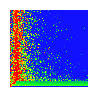

In [ ]:
 plt.figure(figsize=(1, 1))  # Adjust figure size as needed

colors = ["#1111FF", "#00FF22", "#FFFF00", "#FF7F00", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("custom_red_green_blue", colors)
ax = sns.heatmap(df1.iloc[:120, ::-1].T, cmap=cmap, vmin=-2, vmax=2, cbar=False)
ax.axes.xaxis.set_ticks_position('none')
ax.axes.yaxis.set_ticks_position('none')

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
# plt.xlabel('Sample Sizes -->')
# plt.ylabel('Target Complexity -->')
# plt.title('Heatmap of Overfitting - Noise level 0')
plt.show()
ax.figure.savefig('heatmap2.png', dpi=300, bbox_inches='tight')

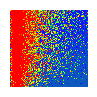

In [ ]:
plt.figure(figsize=(1, 1))  # Adjust figure size as needed

colors = ["#1111FF", "#00FF22", "#FFFF00", "#FF7F00", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("custom_red_green_blue", colors)
ax = sns.heatmap(df01.iloc[:, ::-1].T, cmap=cmap, vmin=-2, vmax=2, cbar=False)
ax.axes.xaxis.set_ticks_position('none')
ax.axes.yaxis.set_ticks_position('none')

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.show()
ax.figure.savefig('heatmap1.png', dpi=300, bbox_inches='tight')